In [1]:
import pandas as pd
import numpy as np

# from google.colab import drive
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

In [2]:
# Se buscan y abren todos los ficheros csv de la carpeta path
path = r'C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1'
# path = r'C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test2'

all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    print("Se ha leido:  " + filename)
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

# Se dan nombres a las columnas
df.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
# dfEvents.columns = ['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits']
# dfHits.columns = ['Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]']

Se ha leido:  C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1\simple_electrons_at_100MeV.csv
Se ha leido:  C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1\simple_electrons_at_10MeV.csv
Se ha leido:  C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1\simple_electrons_at_133MeV.csv
Se ha leido:  C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1\simple_electrons_at_178MeV.csv
Se ha leido:  C:\Users\MIA\OneDrive - UNIR\MasterIA\Asignaturas\2ºCuatrimestre\008 PRÁCTICAS EN EMPRESA (ONLINE)\99 Notebooks\datasets\test1\simple_electrons_at_56MeV.csv


In [3]:
print(df.columns)

Index(['Event_Number', 'Ini_E[MeV]', 'Ini_X[cm]', 'Ini_Y[cm]', 'Ini_Z[cm]',
       'Ini_Theta', 'Ini_Phi', 'Number_of_hits'],
      dtype='object')


#### OBJETIVO: Tener un dataframe con esta forma: 'Event_Number','Ini_E[MeV]','Ini_Theta','Ini_Phi','Number_of_hits','Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'

In [4]:
dfFirma =df.copy()

# TRATAMIENTO DE DATOS NULOS
# Rellenamos el NaN del number of hits de cada hit con -1, puesto que no tiene sentido que tenga valor alguno. Se hace para poder filtrar facilmente en los bucles for.
dfFirma['Number_of_hits'] = dfFirma['Number_of_hits'].fillna(-1)
dfFirma['Ini_Theta'] = dfFirma['Ini_Theta'].fillna(-1)
dfFirma['Ini_Phi'] = dfFirma['Ini_Phi'].fillna(-1)

# creamos un dataframe vacío con todas las columnas que vamos a incluir (eventos + hits)
dfJoin = pd.DataFrame(columns=['Event_Number','Ini_E[MeV]','Ini_X[cm]','Ini_Y[cm]','Ini_Z[cm]','Ini_Theta','Ini_Phi','Number_of_hits','Plane_h','X_h[cm]','Y_h[cm]','Z_h[cm]','Time_h[ns]'])

for i in range(len(dfFirma)): 
    #print(i)
    if dfFirma["Number_of_hits"][i] > 0: # Fila de Evento
        # Se recogen los valores del evento: Event_Number, Ini_E[MeV], Ini_Theta, Ini_Phi, Number_of_hits
        event_number =    dfFirma.iloc[i,0]
        initial_energy =  dfFirma.iloc[i,1]
        initial_x =       dfFirma.iloc[i,2]
        initial_y =       dfFirma.iloc[i,3]
        initial_z =       dfFirma.iloc[i,4]
        initial_tetha =   dfFirma.iloc[i,5]
        initial_phi =     dfFirma.iloc[i,6]
        number_of_hits =  dfFirma.iloc[i,7]
        
        # Se corrigen los IDs para no se solapen los ids de eventos de diferentes ficheros (SOLO PARA EL DATASET1)
        if initial_energy == 10.0:
            event_number = event_number + 1000
        if initial_energy == 56.0:
            event_number = event_number + 2000
        if initial_energy == 100.0:
            event_number = event_number + 3000
        if initial_energy == 133.0:
            event_number = event_number + 4000
        if initial_energy == 178.0:
            event_number = event_number + 5000
        
    else: # Fila de Hit
        hit_plane = dfFirma.iloc[i,0]
        hit_x =     dfFirma.iloc[i,1]
        hit_y =     dfFirma.iloc[i,2]
        hit_z =     dfFirma.iloc[i,3]
        hit_time =  dfFirma.iloc[i,4]  

        # Se guardan todos los datos en el nuevo dataframe
        dfJoin = dfJoin.append({'Event_Number':event_number,
           'Ini_X[cm]':initial_x,
           'Ini_Y[cm]':initial_y,
           'Ini_Z[cm]':initial_z,
           'Ini_E[MeV]':initial_energy,
           'Ini_Theta':initial_tetha,
           'Ini_Phi':initial_phi,
           'Number_of_hits':number_of_hits,
           'Plane_h':hit_plane,
           'X_h[cm]':hit_x,
           'Y_h[cm]':hit_y,
           'Z_h[cm]':hit_z,
           'Time_h[ns]':hit_time}, 
           ignore_index=True)
#                       index=range(3))

# # Cambiamos el signo a la altura para poder representar los planos del detector en altura. 0cm=suelo=4ºplaca
# dfFull["Z_h[cm]"] = dfFull["Z_h[cm]"].apply(lambda x: x*-1)

# # Cambiamos el nombre a la columna de indice. Así cada fila se corresponde con un hit que posee un único ID.
dfJoin.index.name = 'Hit_Id'

# Guardamos todos los eventos y hits en un csv temporal
# dfJoin.to_csv("output/test1/dataframes/EventosHits_Joined.csv")

In [5]:
# dfJoin.describe()

In [6]:
# dfJoin.head(10)

In [7]:
# TEST DE VARIOS EVENTOS CON MULTIPLES HITS
# dfEventosHits = dfJoin.sort_values(by=['Number_of_hits','Event_Number'],ascending=False).head(97)
dfEventosHits = dfJoin.sort_values(by=['Number_of_hits','Event_Number'],ascending=False)
# dfEventosHits = dfJoin.sort_values(by=['Event_Number'],ascending=True)
# dfEventosHits=dfJoin.copy()

#Convertimos a enteros los id de evento, energía inicial, plano, y numero de hits.
dfEventosHits['Event_Number'] = dfEventosHits['Event_Number'].apply(np.int64)
dfEventosHits['Ini_E[MeV]'] = dfEventosHits['Ini_E[MeV]'].apply(np.int64)
dfEventosHits['Plane_h'] = dfEventosHits['Plane_h'].apply(np.int64)
dfEventosHits['Number_of_hits'] = dfEventosHits['Number_of_hits'].apply(np.int64)

# Guardamos todos los eventos y hits en un csv temporal
dfEventosHits.to_csv("output/test1/dataframes/eventosPreparadosParaGenerarRayos.csv")

dfEventosHits.head(100000)

,Event_Number,Ini_E[MeV],Ini_X[cm],Ini_Y[cm],Ini_Z[cm],Ini_Theta,Ini_Phi,Number_of_hits,Plane_h,X_h[cm],Y_h[cm],Z_h[cm],Time_h[ns]
Hit_Id,,,,,,,,,,,,,
1124,5097,178,1.0,1.0,-220.0,0.0,0.0,9,1,6.3,6.05,-187.3,1.10231
1125,5097,178,1.0,1.0,-220.0,0.0,0.0,9,2,6.3,-6.05,-134.8,3.09049
1126,5097,178,1.0,1.0,-220.0,0.0,0.0,9,3,6.3,-6.05,-96.9,4.22786
1127,5097,178,1.0,1.0,-220.0,0.0,0.0,9,4,-31.5,-6.05,-13.2,8.61922
1128,5097,178,1.0,1.0,-220.0,0.0,0.0,9,2,6.3,6.05,-134.8,2.93518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1005,10,1.0,1.0,-220.0,0.0,0.0,1,1,6.3,6.05,-187.3,11.41100
350,1004,10,1.0,1.0,-220.0,0.0,0.0,1,1,6.3,6.05,-187.3,110.82800
349,1003,10,1.0,1.0,-220.0,0.0,0.0,1,1,6.3,6.05,-187.3,105.42600


In [8]:
#Se guardan todos los IDs de eventos del dataframe
idDfEventos=np.unique(dfEventosHits['Event_Number'], axis=0)
print(idDfEventos)
# idDfEventos.shape

[1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084
 1085 1086 1087 1088 1089 1090 1091 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099 2100 3001 3002 3003 3004 3005
 3006 


****** EVENTO 1001 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
347             1001          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
347         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
347        116.614  


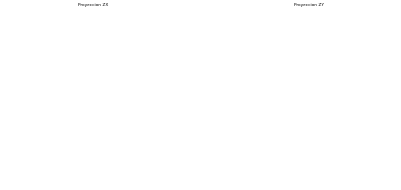


****** EVENTO 1002 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
348             1002          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
348         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
348        100.586  


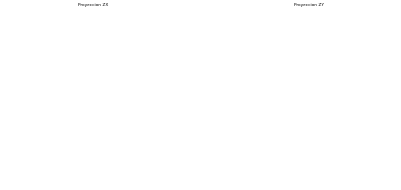


****** EVENTO 1003 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
349             1003          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
349         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
349        105.426  


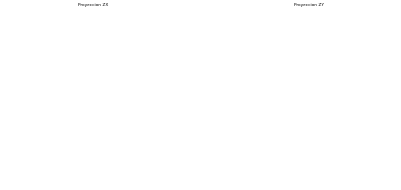


****** EVENTO 1004 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
350             1004          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
350         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
350        110.828  


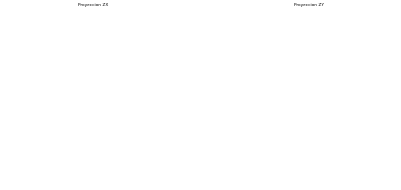


****** EVENTO 1005 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
351             1005          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
351         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
351         11.411  


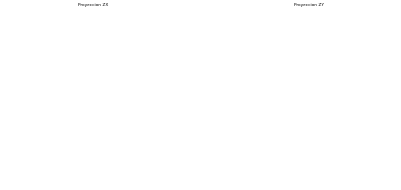


****** EVENTO 1006 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
352             1006          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
352         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
352        108.729  


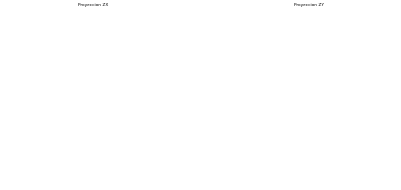


****** EVENTO 1007 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
353             1007          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
353         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
353        116.462  


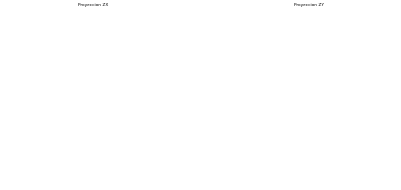


****** EVENTO 1008 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
354             1008          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
354         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
354        115.169  


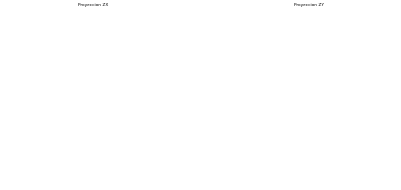


****** EVENTO 1009 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
355             1009          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
355         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
355        113.288  


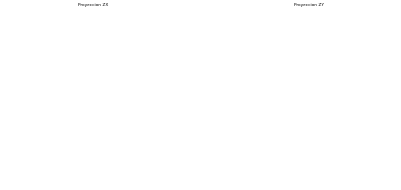


****** EVENTO 1010 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
356             1010          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
356         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
356        116.544  


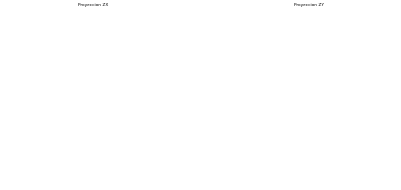


****** EVENTO 1011 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
357             1011          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
357         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
357        115.331  


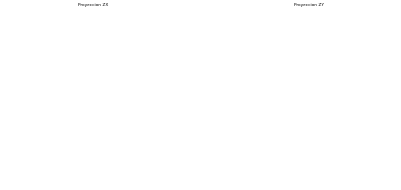


****** EVENTO 1012 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
358             1012          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
358         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
358        114.193  


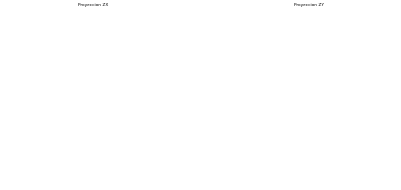


****** EVENTO 1013 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
359             1013          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
359         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
359        106.222  


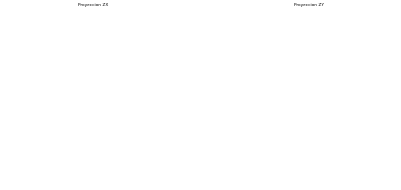


****** EVENTO 1014 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
360             1014          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
360         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
360        122.009  


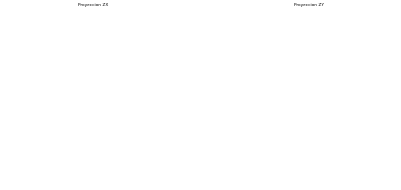


****** EVENTO 1015 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
361             1015          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
361         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
361        113.954  


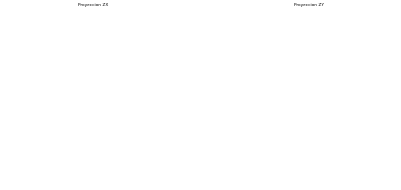


****** EVENTO 1016 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
362             1016          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
362         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
362        110.955  


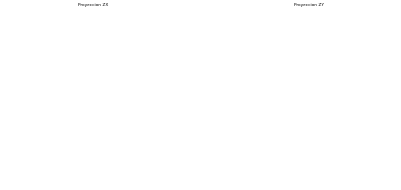


****** EVENTO 1017 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
363             1017          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
363         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
363        111.426  


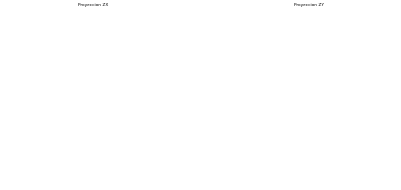


****** EVENTO 1018 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
364             1018          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
364         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
364        102.574  


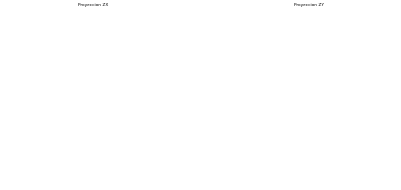


****** EVENTO 1019 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
365             1019          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
365         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
365        114.409  


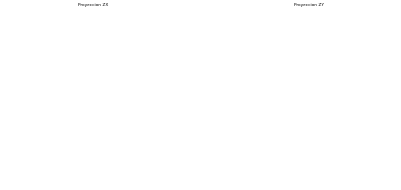


****** EVENTO 1020 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
366             1020          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
366         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
366        102.847  


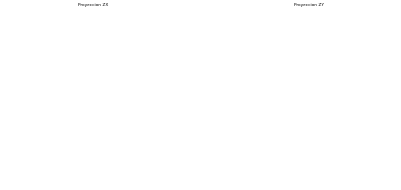


****** EVENTO 1021 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
367             1021          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
367         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
367        108.357  


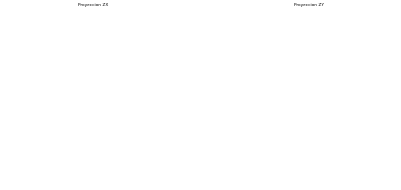


****** EVENTO 1022 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
368             1022          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
368         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
368        109.321  


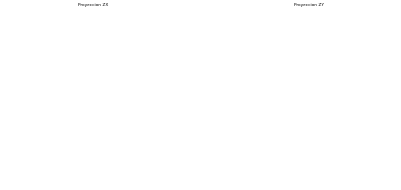


****** EVENTO 1023 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
369             1023          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
369         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
369        103.344  


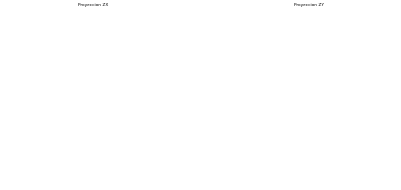


****** EVENTO 1024 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
370             1024          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
370         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
370         11.503  


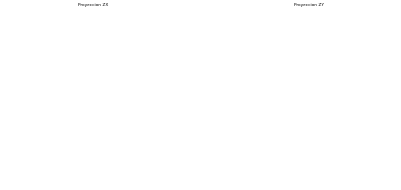


****** EVENTO 1025 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
371             1025          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
371         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
371        121.377  


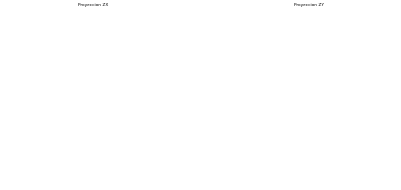


****** EVENTO 1026 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
372             1026          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
372         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
372        115.683  


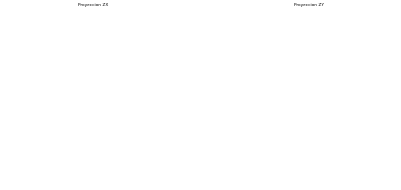


****** EVENTO 1027 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
373             1027          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
373         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
373        113.161  


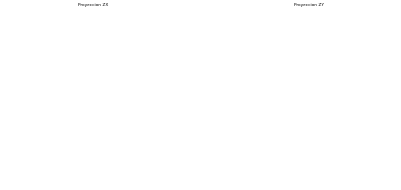


****** EVENTO 1028 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
374             1028          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
374         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
374        114.373  


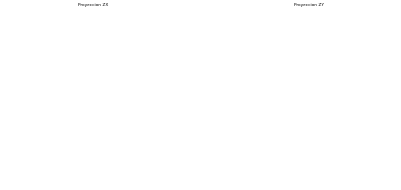


****** EVENTO 1029 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
375             1029          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
375         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
375        122.381  


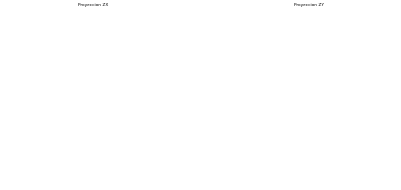


****** EVENTO 1030 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
376             1030          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
376         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
376        117.797  


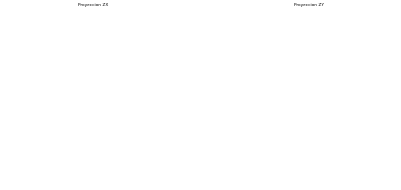


****** EVENTO 1031 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
377             1031          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
377         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
377         11.046  


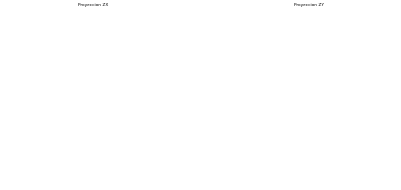


****** EVENTO 1032 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
378             1032          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
378         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
378         10.946  


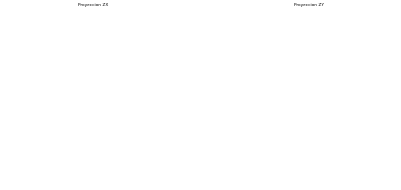


****** EVENTO 1033 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
379             1033          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
379         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
379        116.869  


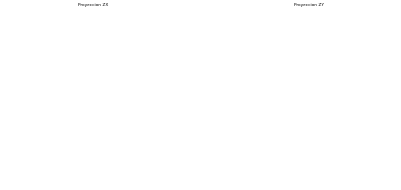


****** EVENTO 1034 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
380             1034          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
380         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
380        108.213  


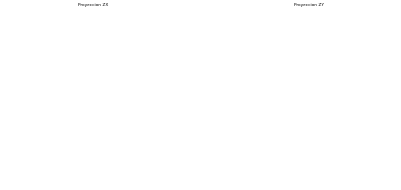


****** EVENTO 1035 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
381             1035          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
381         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
381        113.385  


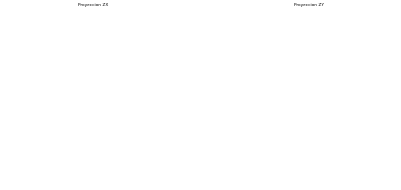


****** EVENTO 1036 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
382             1036          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
382         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
382        116.386  


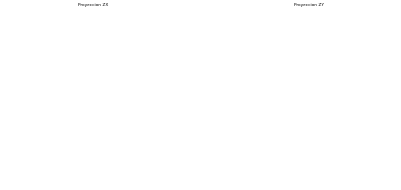


****** EVENTO 1037 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
383             1037          10        1.0        1.0     -220.0        0.0   
384             1037          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
383         0.0               2        1      6.3     6.05   -187.3   
384         0.0               2        2     56.7     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
383         10.623  
384        715.461  


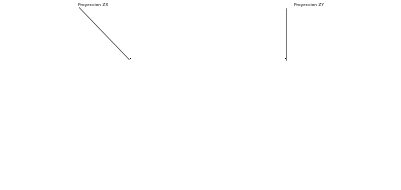


****** EVENTO 1038 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
385             1038          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
385         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
385         11.276  


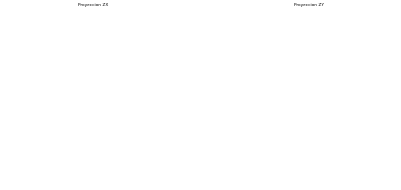


****** EVENTO 1039 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
386             1039          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
386         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
386        109.191  


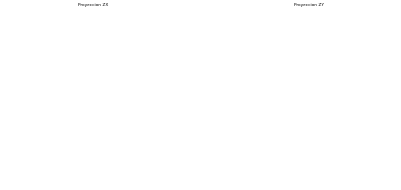


****** EVENTO 1040 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
387             1040          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
387         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
387        112.971  


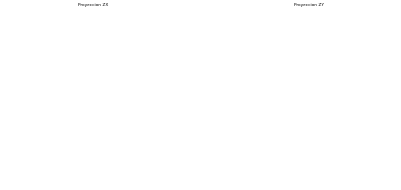


****** EVENTO 1041 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
388             1041          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
388         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
388        104.253  


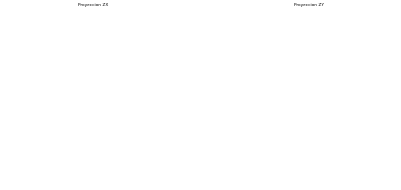


****** EVENTO 1042 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
389             1042          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
389         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
389        104.615  


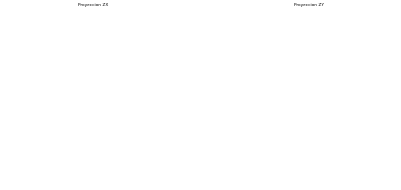


****** EVENTO 1043 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
390             1043          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
390         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
390        114.397  


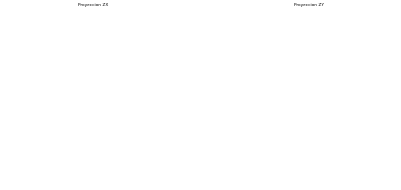


****** EVENTO 1044 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
391             1044          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
391         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
391        111.971  


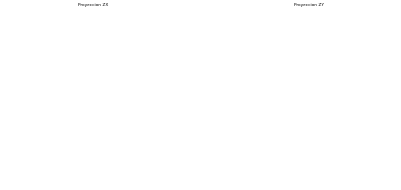


****** EVENTO 1045 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
392             1045          10        1.0        1.0     -220.0        0.0   
393             1045          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
392         0.0               2        1      6.3     6.05   -187.3   
393         0.0               2        2      6.3   -30.25   -134.8   

        Time_h[ns]  
Hit_Id              
392        115.004  
393        457.958  


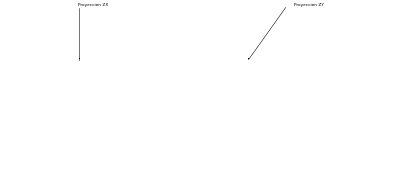


****** EVENTO 1046 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
394             1046          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
394         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
394        108.219  


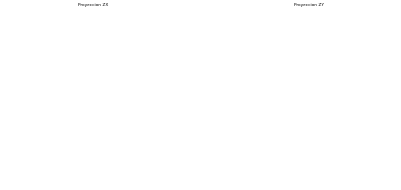


****** EVENTO 1047 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
395             1047          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
395         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
395        109.704  


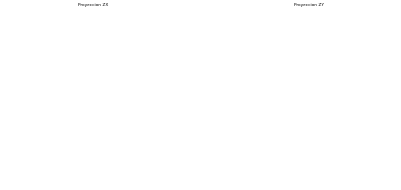


****** EVENTO 1048 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
396             1048          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
396         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
396        124.846  


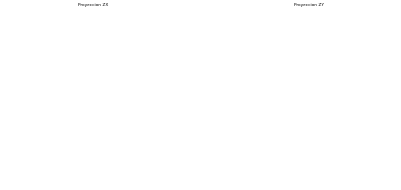


****** EVENTO 1049 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
397             1049          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
397         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
397        114.076  


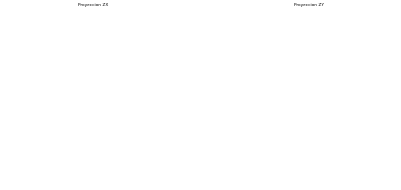


****** EVENTO 1050 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
398             1050          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
398         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
398        114.953  


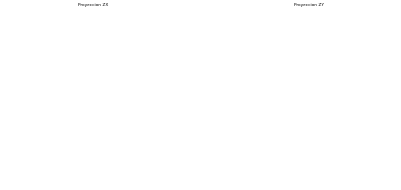


****** EVENTO 1051 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
399             1051          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
399         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
399        106.837  


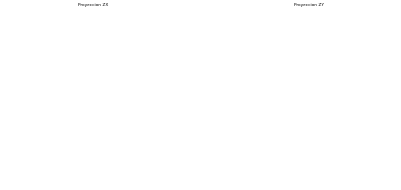


****** EVENTO 1052 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
400             1052          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
400         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
400        107.081  


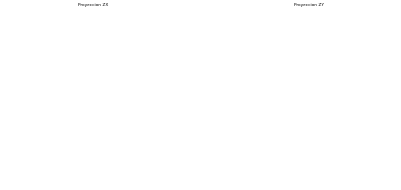


****** EVENTO 1053 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
401             1053          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
401         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
401         11.451  


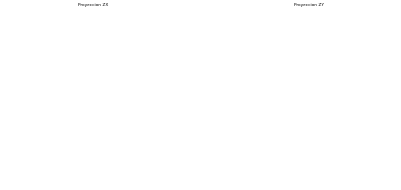


****** EVENTO 1054 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
402             1054          10        1.0        1.0     -220.0        0.0   
403             1054          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
402         0.0               2        1      6.3     6.05   -187.3   
403         0.0               2        2    -18.9   -18.15   -134.8   

        Time_h[ns]  
Hit_Id              
402         11.366  
403        417.796  


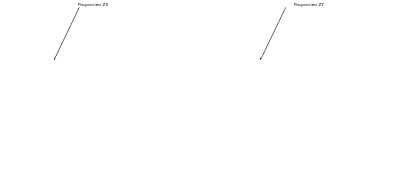


****** EVENTO 1055 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
404             1055          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
404         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
404        116.826  


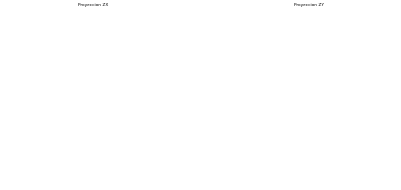


****** EVENTO 1056 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
405             1056          10        1.0        1.0     -220.0        0.0   
406             1056          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
405         0.0               2        1      6.3     6.05   -187.3   
406         0.0               2        2     44.1   -30.25   -134.8   

        Time_h[ns]  
Hit_Id              
405        109.579  
406         66.845  


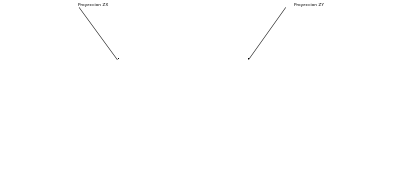


****** EVENTO 1057 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
407             1057          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
407         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
407        115.869  


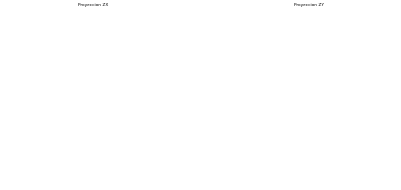


****** EVENTO 1058 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
408             1058          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
408         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
408        119.365  


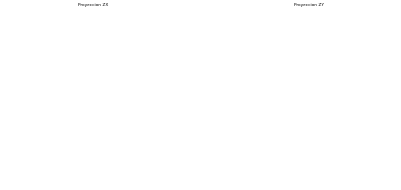


****** EVENTO 1059 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
409             1059          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
409         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
409        117.333  


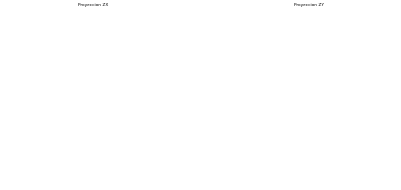


****** EVENTO 1060 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
410             1060          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
410         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
410        117.024  


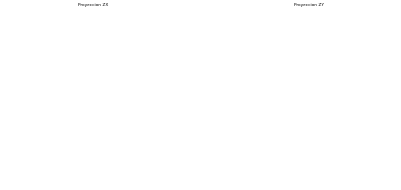


****** EVENTO 1061 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
411             1061          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
411         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
411        120.772  


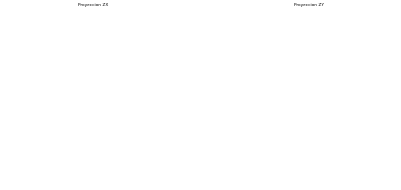


****** EVENTO 1062 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
412             1062          10        1.0        1.0     -220.0        0.0   
413             1062          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
412         0.0               2        1      6.3     6.05   -187.3   
413         0.0               2        2     -6.3   -30.25   -134.8   

        Time_h[ns]  
Hit_Id              
412        119.028  
413        440.428  


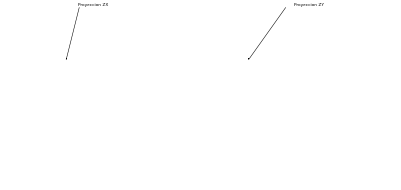


****** EVENTO 1063 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
414             1063          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
414         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
414         11.902  


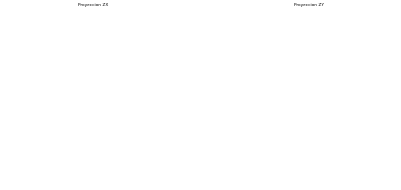


****** EVENTO 1064 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
415             1064          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
415         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
415        121.326  


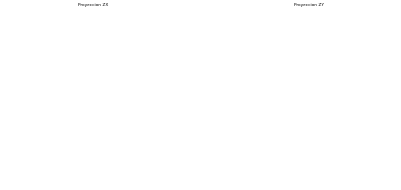


****** EVENTO 1065 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
416             1065          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
416         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
416        117.806  


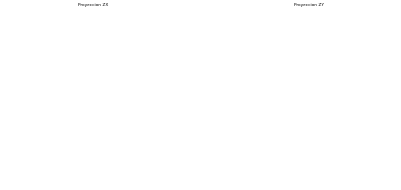


****** EVENTO 1066 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
417             1066          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
417         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
417         12.071  


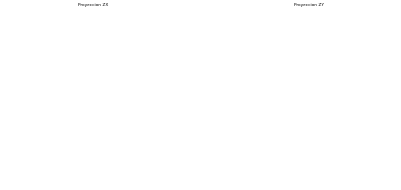


****** EVENTO 1067 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
418             1067          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
418         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
418        116.151  


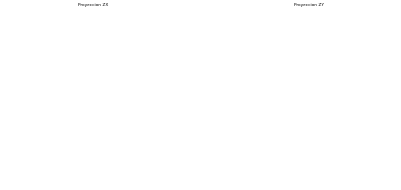


****** EVENTO 1068 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
419             1068          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
419         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
419        113.056  


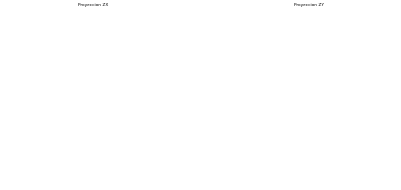


****** EVENTO 1069 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
420             1069          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
420         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
420        109.085  


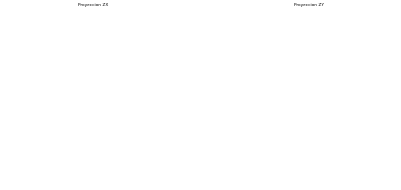


****** EVENTO 1070 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
421             1070          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
421         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
421        117.212  


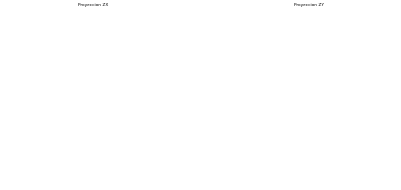


****** EVENTO 1071 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
422             1071          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
422         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
422        110.294  


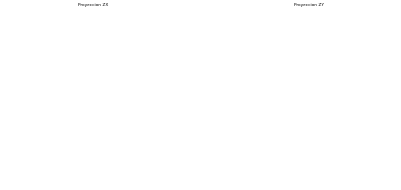


****** EVENTO 1072 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
423             1072          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
423         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
423        110.238  


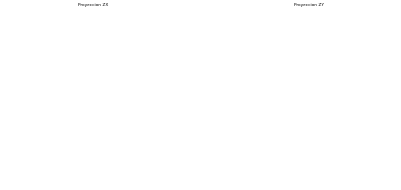


****** EVENTO 1073 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
424             1073          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
424         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
424        119.464  


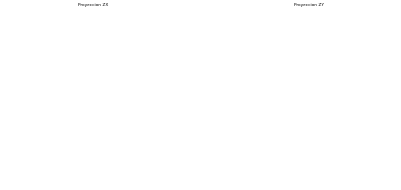


****** EVENTO 1074 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
425             1074          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
425         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
425        109.133  


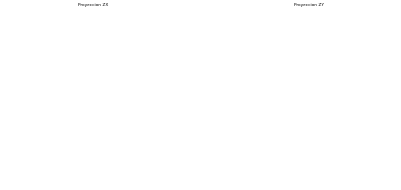


****** EVENTO 1075 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
426             1075          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
426         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
426        112.473  


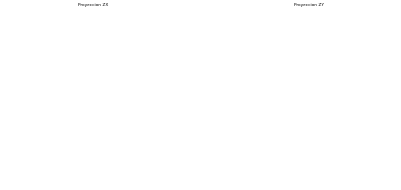


****** EVENTO 1076 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
427             1076          10        1.0        1.0     -220.0        0.0   
428             1076          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
427         0.0               2        1      6.3     6.05   -187.3   
428         0.0               2        2    -18.9    -6.05   -134.8   

        Time_h[ns]  
Hit_Id              
427        112.362  
428        410.042  


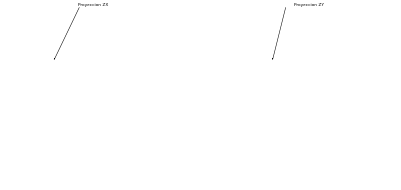


****** EVENTO 1077 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
429             1077          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
429         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
429        108.369  


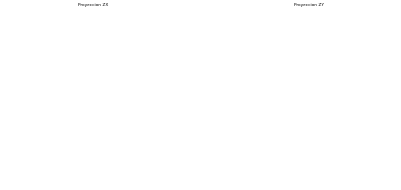


****** EVENTO 1078 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
430             1078          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
430         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
430        114.344  


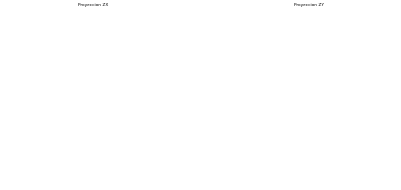


****** EVENTO 1079 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
431             1079          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
431         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
431        119.583  


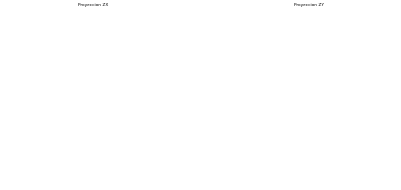


****** EVENTO 1080 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
432             1080          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
432         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
432        112.975  


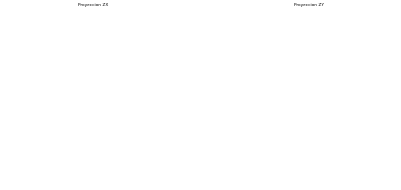


****** EVENTO 1081 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
433             1081          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
433         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
433         11.339  


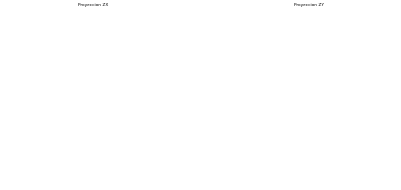


****** EVENTO 1082 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
434             1082          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
434         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
434        116.581  


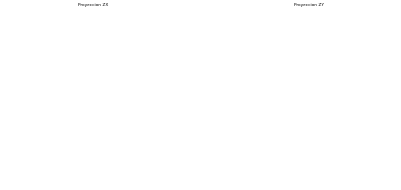


****** EVENTO 1083 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
435             1083          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
435         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
435        110.763  


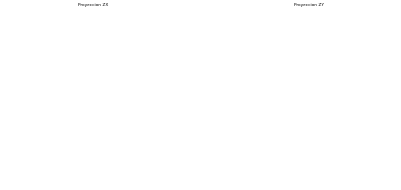


****** EVENTO 1084 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
436             1084          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
436         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
436        113.284  


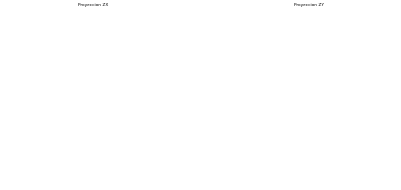


****** EVENTO 1085 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
437             1085          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
437         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
437        113.571  


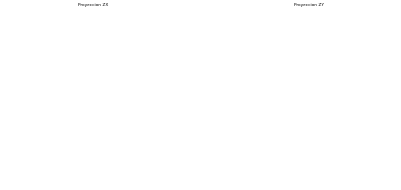


****** EVENTO 1086 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
438             1086          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
438         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
438        109.146  


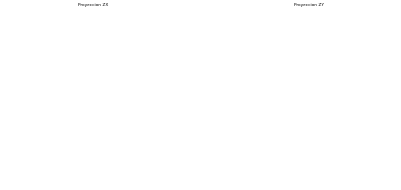


****** EVENTO 1087 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
439             1087          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
439         0.0               1        1     -6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
439        110.097  


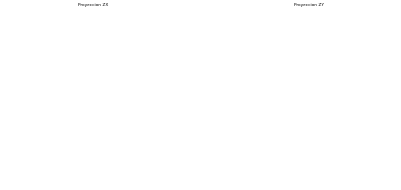


****** EVENTO 1088 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
440             1088          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
440         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
440        107.891  


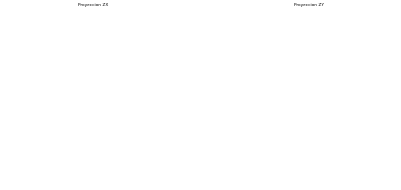


****** EVENTO 1089 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
441             1089          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
441         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
441        116.033  


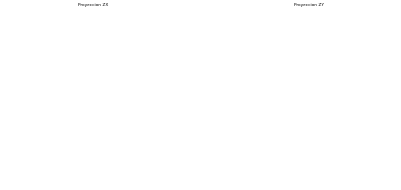


****** EVENTO 1090 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
442             1090          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
442         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
442         11.507  


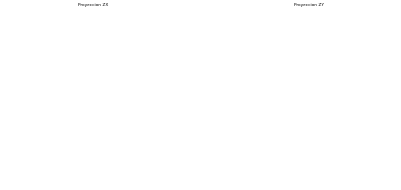


****** EVENTO 1091 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
443             1091          10        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
443         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
443        112.658  


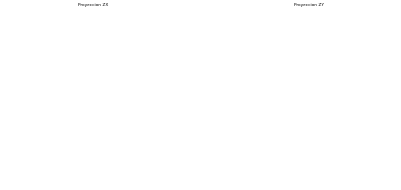


****** EVENTO 2001 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1142            2001          56        1.0        1.0     -220.0        0.0   
1143            2001          56        1.0        1.0     -220.0        0.0   
1144            2001          56        1.0        1.0     -220.0        0.0   
1145            2001          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1142        0.0               4        1      6.3     6.05   -187.3   
1143        0.0               4        2      6.3     6.05   -134.8   
1144        0.0               4        3      6.3     6.05    -96.9   
1145        0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1142        11.563  
11

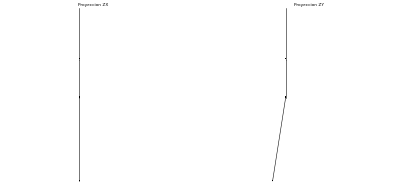


****** EVENTO 2002 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1146            2002          56        1.0        1.0     -220.0        0.0   
1147            2002          56        1.0        1.0     -220.0        0.0   
1148            2002          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1146        0.0               3        1      6.3     6.05   -187.3   
1147        0.0               3        2      6.3    -6.05   -134.8   
1148        0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1146       115.764  
1147       286.132  
1148       435.004  


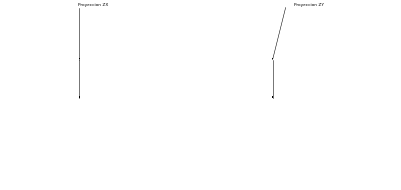


****** EVENTO 2003 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1149            2003          56        1.0        1.0     -220.0        0.0   
1150            2003          56        1.0        1.0     -220.0        0.0   
1151            2003          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1149        0.0               3        1      6.3     6.05   -187.3   
1150        0.0               3        2      6.3     6.05   -134.8   
1151        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1149       114.469  
1150       304.733  
1151       442.275  


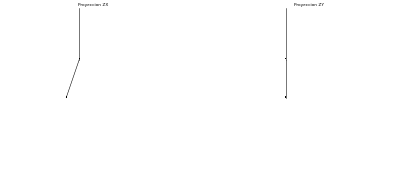


****** EVENTO 2004 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1152            2004          56        1.0        1.0     -220.0        0.0   
1153            2004          56        1.0        1.0     -220.0        0.0   
1154            2004          56        1.0        1.0     -220.0        0.0   
1155            2004          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1152        0.0               4        1      6.3     6.05   -187.3   
1153        0.0               4        2      6.3     6.05   -134.8   
1154        0.0               4        3      6.3     6.05    -96.9   
1155        0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1152       108.762  
11

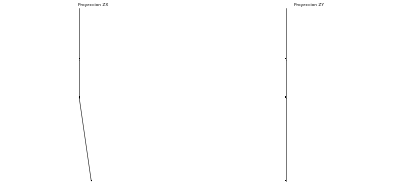


****** EVENTO 2005 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1156            2005          56        1.0        1.0     -220.0        0.0   
1157            2005          56        1.0        1.0     -220.0        0.0   
1158            2005          56        1.0        1.0     -220.0        0.0   
1159            2005          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1156        0.0               4        1      6.3     6.05   -187.3   
1157        0.0               4        2      6.3    -6.05   -134.8   
1158        0.0               4        3     -6.3    -6.05    -96.9   
1159        0.0               4        4    -18.9   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1156       113.447  
11

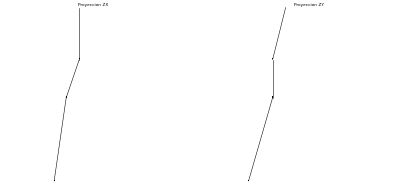


****** EVENTO 2006 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1160            2006          56        1.0        1.0     -220.0        0.0   
1161            2006          56        1.0        1.0     -220.0        0.0   
1162            2006          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1160        0.0               3        1      6.3     6.05   -187.3   
1161        0.0               3        2      6.3    -6.05   -134.8   
1162        0.0               3        3     18.9   -18.15    -96.9   

        Time_h[ns]  
Hit_Id              
1160       116.422  
1161       365.169  
1162       548.959  


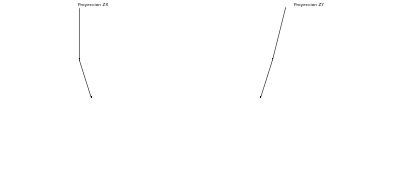


****** EVENTO 2007 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1163            2007          56        1.0        1.0     -220.0        0.0   
1164            2007          56        1.0        1.0     -220.0        0.0   
1165            2007          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1163        0.0               3        1      6.3     6.05   -187.3   
1164        0.0               3        2     -6.3     6.05   -134.8   
1165        0.0               3        4     -6.3    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1163       105.719  
1164        32.947  
1165       974.491  


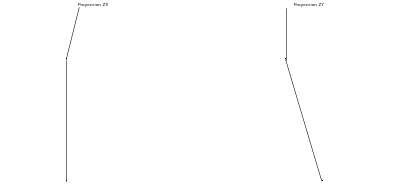


****** EVENTO 2008 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1166            2008          56        1.0        1.0     -220.0        0.0   
1167            2008          56        1.0        1.0     -220.0        0.0   
1168            2008          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1166        0.0               3        1      6.3     6.05   -187.3   
1167        0.0               3        2      6.3    -6.05   -134.8   
1168        0.0               3        3      6.3   -18.15    -96.9   

        Time_h[ns]  
Hit_Id              
1166       117.681  
1167       328.727  
1168       515.002  


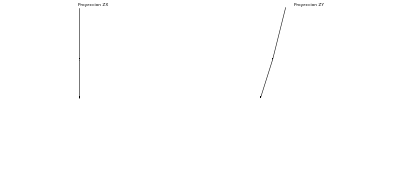


****** EVENTO 2009 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1169            2009          56        1.0        1.0     -220.0        0.0   
1170            2009          56        1.0        1.0     -220.0        0.0   
1171            2009          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1169        0.0               3        1      6.3     6.05   -187.3   
1170        0.0               3        3     -6.3    -6.05    -96.9   
1171        0.0               3        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1169       114.699  
1170       413.099  
1171       779.984  


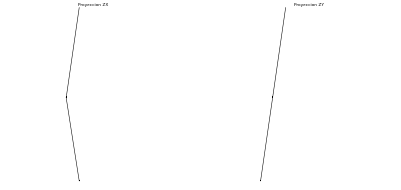


****** EVENTO 2010 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1172            2010          56        1.0        1.0     -220.0        0.0   
1173            2010          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1172        0.0               2        1      6.3     6.05   -187.3   
1173        0.0               2        4    -31.5    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1172       109.583  
1173        86.464  


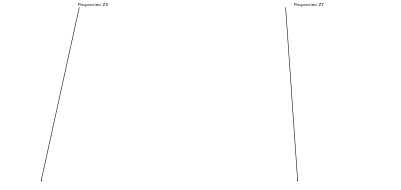


****** EVENTO 2011 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1174            2011          56        1.0        1.0     -220.0        0.0   
1175            2011          56        1.0        1.0     -220.0        0.0   
1176            2011          56        1.0        1.0     -220.0        0.0   
1177            2011          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1174        0.0               4        1      6.3     6.05   -187.3   
1175        0.0               4        2      6.3     6.05   -134.8   
1176        0.0               4        3      6.3     6.05    -96.9   
1177        0.0               4        4      6.3    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1174        11.377  
11

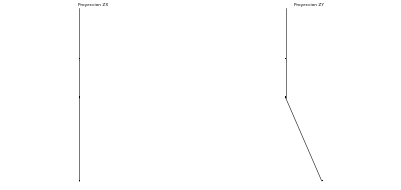


****** EVENTO 2012 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1178            2012          56        1.0        1.0     -220.0        0.0   
1179            2012          56        1.0        1.0     -220.0        0.0   
1180            2012          56        1.0        1.0     -220.0        0.0   
1181            2012          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1178        0.0               4        1      6.3     6.05   -187.3   
1179        0.0               4        2      6.3     6.05   -134.8   
1180        0.0               4        3     18.9    -6.05    -96.9   
1181        0.0               4        4     31.5    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1178       112.971  
11

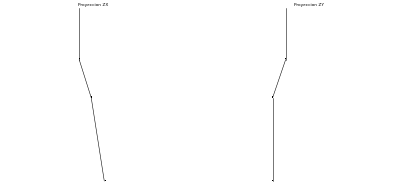


****** EVENTO 2013 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1182            2013          56        1.0        1.0     -220.0        0.0   
1183            2013          56        1.0        1.0     -220.0        0.0   
1184            2013          56        1.0        1.0     -220.0        0.0   
1185            2013          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1182        0.0               4        1      6.3     6.05   -187.3   
1183        0.0               4        2      6.3    -6.05   -134.8   
1184        0.0               4        3      6.3    -6.05    -96.9   
1185        0.0               4        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1182       110.522  
11

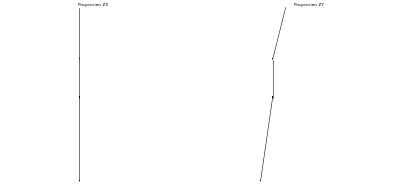


****** EVENTO 2014 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1186            2014          56        1.0        1.0     -220.0        0.0   
1187            2014          56        1.0        1.0     -220.0        0.0   
1188            2014          56        1.0        1.0     -220.0        0.0   
1189            2014          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1186        0.0               4        1      6.3     6.05   -187.3   
1187        0.0               4        2      6.3    -6.05   -134.8   
1188        0.0               4        3      6.3    -6.05    -96.9   
1189        0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1186       107.953  
11

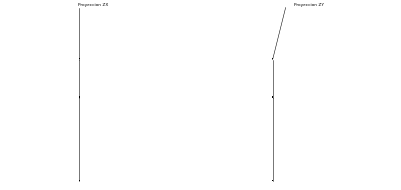


****** EVENTO 2015 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1190            2015          56        1.0        1.0     -220.0        0.0   
1191            2015          56        1.0        1.0     -220.0        0.0   
1192            2015          56        1.0        1.0     -220.0        0.0   
1193            2015          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1190        0.0               4        1      6.3     6.05   -187.3   
1191        0.0               4        2     -6.3    -6.05   -134.8   
1192        0.0               4        3     -6.3    -6.05    -96.9   
1193        0.0               4        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1190       112.896  
11

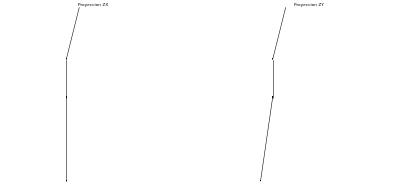


****** EVENTO 2016 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1194            2016          56        1.0        1.0     -220.0        0.0   
1195            2016          56        1.0        1.0     -220.0        0.0   
1196            2016          56        1.0        1.0     -220.0        0.0   
1197            2016          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1194        0.0               4        1      6.3     6.05   -187.3   
1195        0.0               4        2      6.3     6.05   -134.8   
1196        0.0               4        3      6.3     6.05    -96.9   
1197        0.0               4        4     31.5    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1194       119.424  
11

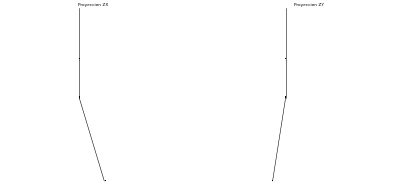


****** EVENTO 2017 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1198            2017          56        1.0        1.0     -220.0        0.0   
1199            2017          56        1.0        1.0     -220.0        0.0   
1200            2017          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1198        0.0               3        1      6.3     6.05   -187.3   
1199        0.0               3        3     -6.3    -6.05    -96.9   
1200        0.0               3        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1198       115.944  
1199       448.861  
1200       797.447  


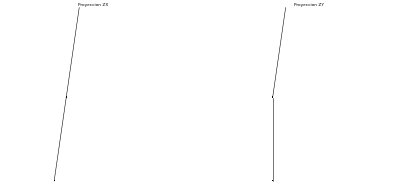


****** EVENTO 2018 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1201            2018          56        1.0        1.0     -220.0        0.0   
1202            2018          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1201        0.0               2        1      6.3     6.05   -187.3   
1202        0.0               2        3     -6.3   -18.15    -96.9   

        Time_h[ns]  
Hit_Id              
1201        11.281  
1202       586.059  


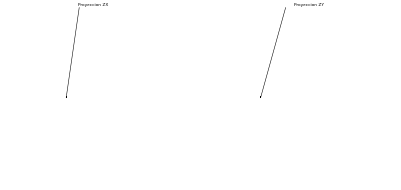


****** EVENTO 2019 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1203            2019          56        1.0        1.0     -220.0        0.0   
1204            2019          56        1.0        1.0     -220.0        0.0   
1205            2019          56        1.0        1.0     -220.0        0.0   
1206            2019          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1203        0.0               4        1      6.3     6.05   -187.3   
1204        0.0               4        2      6.3    -6.05   -134.8   
1205        0.0               4        3     18.9     6.05    -96.9   
1206        0.0               4        4     31.5     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1203       115.343  
12

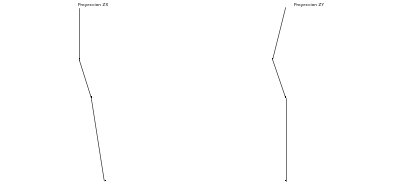


****** EVENTO 2020 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1207            2020          56        1.0        1.0     -220.0        0.0   
1208            2020          56        1.0        1.0     -220.0        0.0   
1209            2020          56        1.0        1.0     -220.0        0.0   
1210            2020          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1207        0.0               4        1      6.3     6.05   -187.3   
1208        0.0               4        2     -6.3    -6.05   -134.8   
1209        0.0               4        3     -6.3    -6.05    -96.9   
1210        0.0               4        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1207       112.653  
12

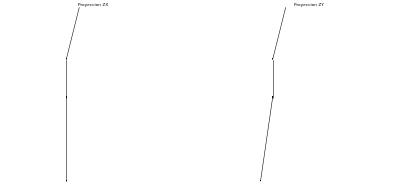


****** EVENTO 2021 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1211            2021          56        1.0        1.0     -220.0        0.0   
1212            2021          56        1.0        1.0     -220.0        0.0   
1213            2021          56        1.0        1.0     -220.0        0.0   
1214            2021          56        1.0        1.0     -220.0        0.0   
1215            2021          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1211        0.0               5        1      6.3     6.05   -187.3   
1212        0.0               5        2      6.3    -6.05   -134.8   
1213        0.0               5        3     18.9    -6.05    -96.9   
1214        0.0               5        4     56.7    -6.0

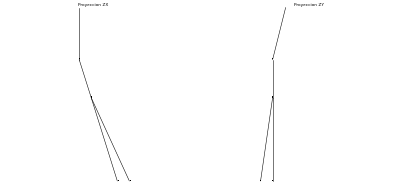


****** EVENTO 2022 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1216            2022          56        1.0        1.0     -220.0        0.0   
1217            2022          56        1.0        1.0     -220.0        0.0   
1218            2022          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1216        0.0               3        1      6.3     6.05   -187.3   
1217        0.0               3        2      6.3    -6.05   -134.8   
1218        0.0               3        3     31.5    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1216       115.672  
1217       330.946  
1218       578.856  


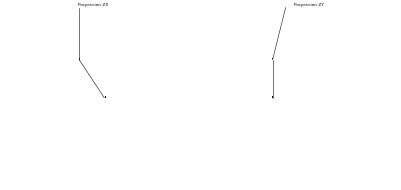


****** EVENTO 2023 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1219            2023          56        1.0        1.0     -220.0        0.0   
1220            2023          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1219        0.0               2        1      6.3     6.05   -187.3   
1220        0.0               2        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1219       115.052  
1220       694.785  


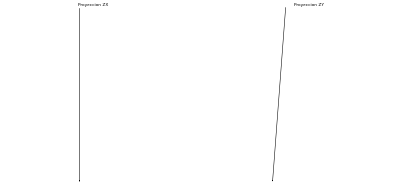


****** EVENTO 2024 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1221            2024          56        1.0        1.0     -220.0        0.0   
1222            2024          56        1.0        1.0     -220.0        0.0   
1223            2024          56        1.0        1.0     -220.0        0.0   
1224            2024          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1221        0.0               4        1      6.3     6.05   -187.3   
1222        0.0               4        2      6.3     6.05   -134.8   
1223        0.0               4        3      6.3    18.15    -96.9   
1224        0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1221        10.852  
12

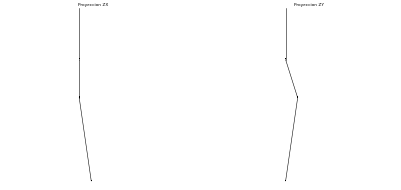


****** EVENTO 2025 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1225            2025          56        1.0        1.0     -220.0        0.0   
1226            2025          56        1.0        1.0     -220.0        0.0   
1227            2025          56        1.0        1.0     -220.0        0.0   
1228            2025          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1225        0.0               4        1      6.3     6.05   -187.3   
1226        0.0               4        2     -6.3     6.05   -134.8   
1227        0.0               4        3     -6.3    18.15    -96.9   
1228        0.0               4        4     -6.3    54.45    -13.2   

        Time_h[ns]  
Hit_Id              
1225       109.085  
12

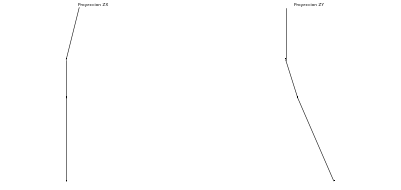


****** EVENTO 2026 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1229            2026          56        1.0        1.0     -220.0        0.0   
1230            2026          56        1.0        1.0     -220.0        0.0   
1231            2026          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1229        0.0               3        1      6.3     6.05   -187.3   
1230        0.0               3        2      6.3    -6.05   -134.8   
1231        0.0               3        3     18.9    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1229       106.406  
1230        34.167  
1231       517.963  


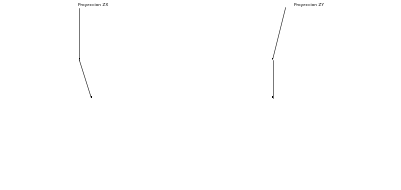


****** EVENTO 2027 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1232            2027          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1232        0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
1232       117.639  


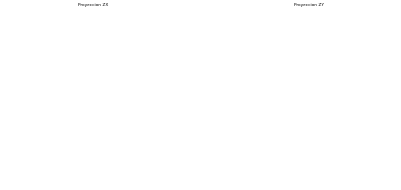


****** EVENTO 2028 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1233            2028          56        1.0        1.0     -220.0        0.0   
1234            2028          56        1.0        1.0     -220.0        0.0   
1235            2028          56        1.0        1.0     -220.0        0.0   
1236            2028          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1233        0.0               4        1      6.3     6.05   -187.3   
1234        0.0               4        2     -6.3     6.05   -134.8   
1235        0.0               4        3     -6.3     6.05    -96.9   
1236        0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1233       114.163  
12

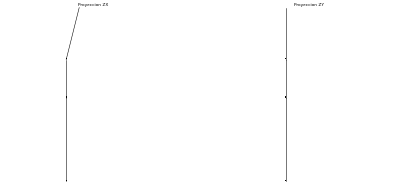


****** EVENTO 2029 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1237            2029          56        1.0        1.0     -220.0        0.0   
1238            2029          56        1.0        1.0     -220.0        0.0   
1239            2029          56        1.0        1.0     -220.0        0.0   
1240            2029          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1237        0.0               4        1      6.3     6.05   -187.3   
1238        0.0               4        2      6.3    -6.05   -134.8   
1239        0.0               4        3      6.3     6.05    -96.9   
1240        0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1237       110.855  
12

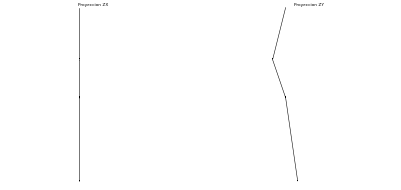


****** EVENTO 2030 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1241            2030          56        1.0        1.0     -220.0        0.0   
1242            2030          56        1.0        1.0     -220.0        0.0   
1243            2030          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1241        0.0               3        1      6.3     6.05   -187.3   
1242        0.0               3        2     -6.3    -6.05   -134.8   
1243        0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1241       103.563  
1242        31.244  
1243       465.397  


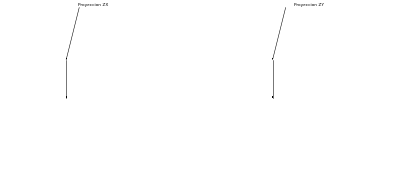


****** EVENTO 2031 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1244            2031          56        1.0        1.0     -220.0        0.0   
1245            2031          56        1.0        1.0     -220.0        0.0   
1246            2031          56        1.0        1.0     -220.0        0.0   
1247            2031          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1244        0.0               4        1      6.3     6.05   -187.3   
1245        0.0               4        2     -6.3    -6.05   -134.8   
1246        0.0               4        3     -6.3     6.05    -96.9   
1247        0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1244       118.256  
12

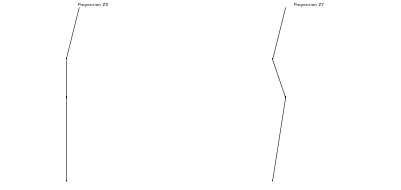


****** EVENTO 2032 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1248            2032          56        1.0        1.0     -220.0        0.0   
1249            2032          56        1.0        1.0     -220.0        0.0   
1250            2032          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1248        0.0               3        1      6.3     6.05   -187.3   
1249        0.0               3        2      6.3     6.05   -134.8   
1250        0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1248       118.434  
1249       331.303  
1250       481.162  


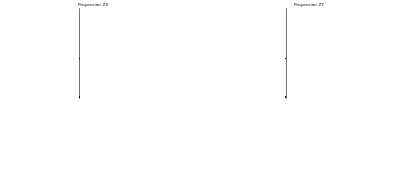


****** EVENTO 2033 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1251            2033          56        1.0        1.0     -220.0        0.0   
1252            2033          56        1.0        1.0     -220.0        0.0   
1253            2033          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1251        0.0               3        1      6.3     6.05   -187.3   
1252        0.0               3        3      6.3    -6.05    -96.9   
1253        0.0               3        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1251       116.178  
1252       443.482  
1253       825.342  


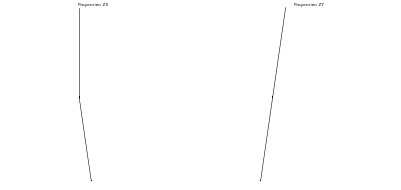


****** EVENTO 2034 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1254            2034          56        1.0        1.0     -220.0        0.0   
1255            2034          56        1.0        1.0     -220.0        0.0   
1256            2034          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1254        0.0               3        1      6.3     6.05   -187.3   
1255        0.0               3        2      6.3    18.15   -134.8   
1256        0.0               3        3      6.3    42.35    -96.9   

        Time_h[ns]  
Hit_Id              
1254       112.321  
1255       407.879  
1256       646.618  


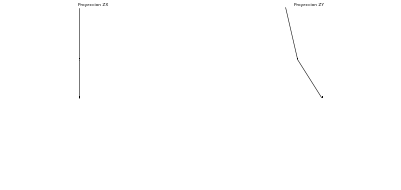


****** EVENTO 2035 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1257            2035          56        1.0        1.0     -220.0        0.0   
1258            2035          56        1.0        1.0     -220.0        0.0   
1259            2035          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1257        0.0               3        1      6.3     6.05   -187.3   
1258        0.0               3        2     -6.3    -6.05   -134.8   
1259        0.0               3        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1257       115.221  
1258       306.766  
1259       837.644  


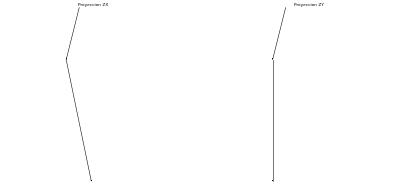


****** EVENTO 2036 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1260            2036          56        1.0        1.0     -220.0        0.0   
1261            2036          56        1.0        1.0     -220.0        0.0   
1262            2036          56        1.0        1.0     -220.0        0.0   
1263            2036          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1260        0.0               4        1      6.3     6.05   -187.3   
1261        0.0               4        2      6.3     6.05   -134.8   
1262        0.0               4        3      6.3     6.05    -96.9   
1263        0.0               4        4     -6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1260       112.183  
12

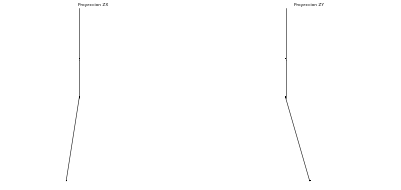


****** EVENTO 2037 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1264            2037          56        1.0        1.0     -220.0        0.0   
1265            2037          56        1.0        1.0     -220.0        0.0   
1266            2037          56        1.0        1.0     -220.0        0.0   
1267            2037          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1264        0.0               4        1      6.3     6.05   -187.3   
1265        0.0               4        2      6.3    -6.05   -134.8   
1266        0.0               4        3     -6.3    -6.05    -96.9   
1267        0.0               4        4    -31.5   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1264       114.512  
12

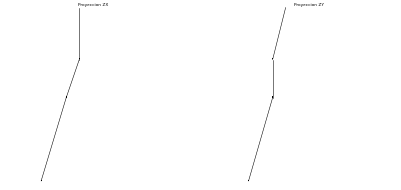


****** EVENTO 2038 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1268            2038          56        1.0        1.0     -220.0        0.0   
1269            2038          56        1.0        1.0     -220.0        0.0   
1270            2038          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1268        0.0               3        1      6.3     6.05   -187.3   
1269        0.0               3        2     18.9    -6.05   -134.8   
1270        0.0               3        3     31.5    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1268        11.259  
1269       366.233  
1270       591.922  


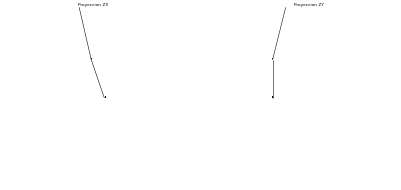


****** EVENTO 2039 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1271            2039          56        1.0        1.0     -220.0        0.0   
1272            2039          56        1.0        1.0     -220.0        0.0   
1273            2039          56        1.0        1.0     -220.0        0.0   
1274            2039          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1271        0.0               4        1      6.3     6.05   -187.3   
1272        0.0               4        2     18.9     6.05   -134.8   
1273        0.0               4        3     18.9     6.05    -96.9   
1274        0.0               4        4     31.5    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1271       113.232  
12

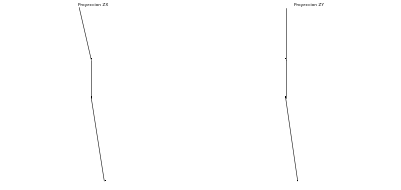


****** EVENTO 2040 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1275            2040          56        1.0        1.0     -220.0        0.0   
1276            2040          56        1.0        1.0     -220.0        0.0   
1277            2040          56        1.0        1.0     -220.0        0.0   
1278            2040          56        1.0        1.0     -220.0        0.0   
1279            2040          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1275        0.0               5        1      6.3     6.05   -187.3   
1276        0.0               5        2     -6.3     6.05   -134.8   
1277        0.0               5        3      6.3     6.05    -96.9   
1278        0.0               5        4     18.9   -30.2

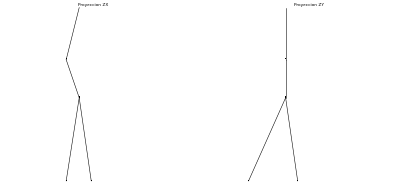


****** EVENTO 2041 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1280            2041          56        1.0        1.0     -220.0        0.0   
1281            2041          56        1.0        1.0     -220.0        0.0   
1282            2041          56        1.0        1.0     -220.0        0.0   
1283            2041          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1280        0.0               4        1      6.3     6.05   -187.3   
1281        0.0               4        2      6.3     6.05   -134.8   
1282        0.0               4        3     18.9     6.05    -96.9   
1283        0.0               4        4     44.1    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1280       118.693  
12

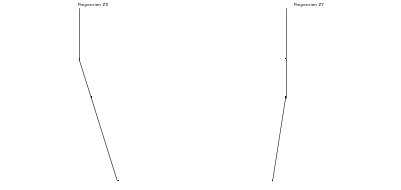


****** EVENTO 2042 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1284            2042          56        1.0        1.0     -220.0        0.0   
1285            2042          56        1.0        1.0     -220.0        0.0   
1286            2042          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1284        0.0               3        1      6.3     6.05   -187.3   
1285        0.0               3        2     -6.3     6.05   -134.8   
1286        0.0               3        3     -6.3    18.15    -96.9   

        Time_h[ns]  
Hit_Id              
1284       115.058  
1285       365.341  
1286       552.063  


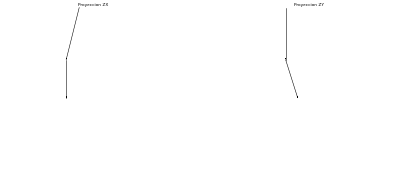


****** EVENTO 2043 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1287            2043          56        1.0        1.0     -220.0        0.0   
1288            2043          56        1.0        1.0     -220.0        0.0   
1289            2043          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1287        0.0               3        1      6.3     6.05   -187.3   
1288        0.0               3        3     -6.3     6.05    -96.9   
1289        0.0               3        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1287        11.723  
1288       457.071  
1289       807.256  


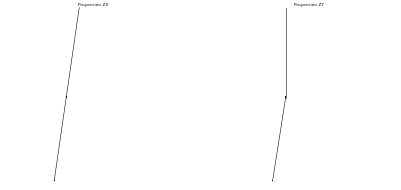


****** EVENTO 2044 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1290            2044          56        1.0        1.0     -220.0        0.0   
1291            2044          56        1.0        1.0     -220.0        0.0   
1292            2044          56        1.0        1.0     -220.0        0.0   
1293            2044          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1290        0.0               4        1      6.3     6.05   -187.3   
1291        0.0               4        2      6.3    18.15   -134.8   
1292        0.0               4        3     -6.3    18.15    -96.9   
1293        0.0               4        4    -18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1290       108.576  
12

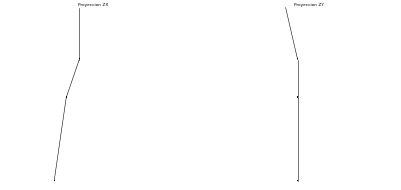


****** EVENTO 2045 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1294            2045          56        1.0        1.0     -220.0        0.0   
1295            2045          56        1.0        1.0     -220.0        0.0   
1296            2045          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1294        0.0               3        1      6.3     6.05   -187.3   
1295        0.0               3        2     -6.3     6.05   -134.8   
1296        0.0               3        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1294       117.856  
1295       308.854  
1296       801.661  


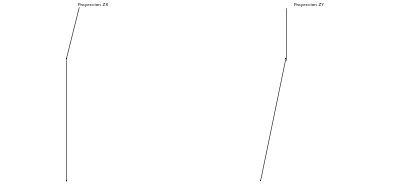


****** EVENTO 2046 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1297            2046          56        1.0        1.0     -220.0        0.0   
1298            2046          56        1.0        1.0     -220.0        0.0   
1299            2046          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1297        0.0               3        1      6.3     6.05   -187.3   
1298        0.0               3        2      6.3    -6.05   -134.8   
1299        0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1297       111.585  
1298       294.256  
1299       447.247  


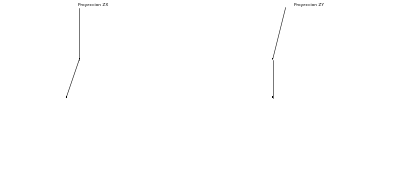


****** EVENTO 2047 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1300            2047          56        1.0        1.0     -220.0        0.0   
1301            2047          56        1.0        1.0     -220.0        0.0   
1302            2047          56        1.0        1.0     -220.0        0.0   
1303            2047          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1300        0.0               4        1      6.3     6.05   -187.3   
1301        0.0               4        2      6.3    -6.05   -134.8   
1302        0.0               4        3     -6.3    -6.05    -96.9   
1303        0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1300       118.024  
13

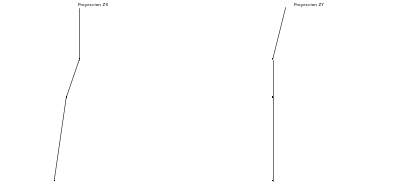


****** EVENTO 2048 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1304            2048          56        1.0        1.0     -220.0        0.0   
1305            2048          56        1.0        1.0     -220.0        0.0   
1306            2048          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1304        0.0               3        1      6.3     6.05   -187.3   
1305        0.0               3        3      6.3     6.05    -96.9   
1306        0.0               3        4     -6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1304        10.954  
1305       461.096  
1306       864.163  


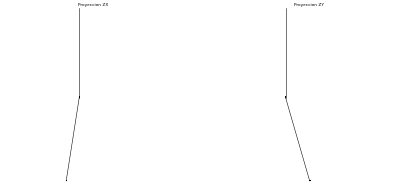


****** EVENTO 2049 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1307            2049          56        1.0        1.0     -220.0        0.0   
1308            2049          56        1.0        1.0     -220.0        0.0   
1309            2049          56        1.0        1.0     -220.0        0.0   
1310            2049          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1307        0.0               4        1      6.3     6.05   -187.3   
1308        0.0               4        2     -6.3     6.05   -134.8   
1309        0.0               4        3     -6.3     6.05    -96.9   
1310        0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1307       115.761  
13

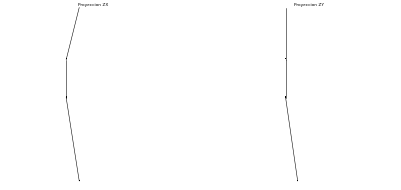


****** EVENTO 2050 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1311            2050          56        1.0        1.0     -220.0        0.0   
1312            2050          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1311        0.0               2        1      6.3     6.05   -187.3   
1312        0.0               2        4     -6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1311       119.101  
1312       852.186  


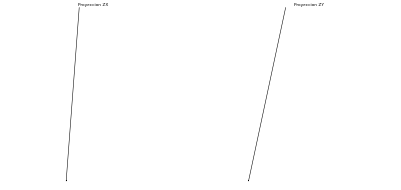


****** EVENTO 2051 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1313            2051          56        1.0        1.0     -220.0        0.0   
1314            2051          56        1.0        1.0     -220.0        0.0   
1315            2051          56        1.0        1.0     -220.0        0.0   
1316            2051          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1313        0.0               4        1      6.3     6.05   -187.3   
1314        0.0               4        2      6.3     6.05   -134.8   
1315        0.0               4        3      6.3     6.05    -96.9   
1316        0.0               4        4     -6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1313       117.324  
13

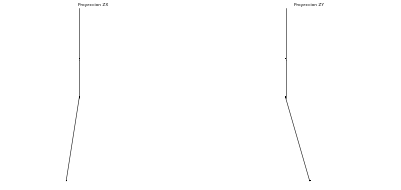


****** EVENTO 2052 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1317            2052          56        1.0        1.0     -220.0        0.0   
1318            2052          56        1.0        1.0     -220.0        0.0   
1319            2052          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1317        0.0               3        1      6.3     6.05   -187.3   
1318        0.0               3        2     -6.3    -6.05   -134.8   
1319        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1317       112.864  
1318       308.827  
1319       456.288  


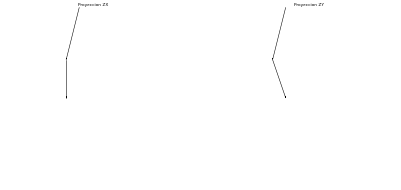


****** EVENTO 2053 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1320            2053          56        1.0        1.0     -220.0        0.0   
1321            2053          56        1.0        1.0     -220.0        0.0   
1322            2053          56        1.0        1.0     -220.0        0.0   
1323            2053          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1320        0.0               4        1      6.3     6.05   -187.3   
1321        0.0               4        2      6.3     6.05   -134.8   
1322        0.0               4        3      6.3    18.15    -96.9   
1323        0.0               4        4     -6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1320       108.764  
13

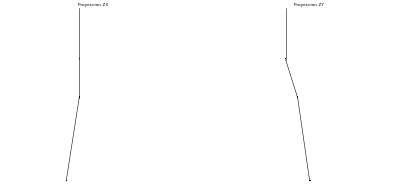


****** EVENTO 2054 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1324            2054          56        1.0        1.0     -220.0        0.0   
1325            2054          56        1.0        1.0     -220.0        0.0   
1326            2054          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1324        0.0               3        1      6.3     6.05   -187.3   
1325        0.0               3        2      6.3    -6.05   -134.8   
1326        0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1324        10.353  
1325       306.584  
1326        46.332  


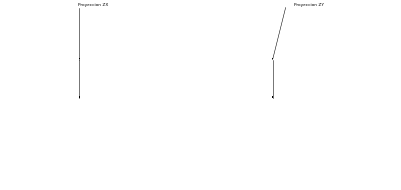


****** EVENTO 2055 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1327            2055          56        1.0        1.0     -220.0        0.0   
1328            2055          56        1.0        1.0     -220.0        0.0   
1329            2055          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1327        0.0               3        1      6.3     6.05   -187.3   
1328        0.0               3        2      6.3   -18.15   -134.8   
1329        0.0               3        3      6.3   -42.35    -96.9   

        Time_h[ns]  
Hit_Id              
1327       102.282  
1328       369.083  
1329       638.569  


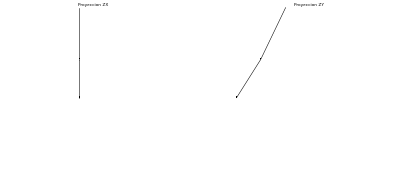


****** EVENTO 2056 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1330            2056          56        1.0        1.0     -220.0        0.0   
1331            2056          56        1.0        1.0     -220.0        0.0   
1332            2056          56        1.0        1.0     -220.0        0.0   
1333            2056          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1330        0.0               4        1      6.3     6.05   -187.3   
1331        0.0               4        2      6.3    -6.05   -134.8   
1332        0.0               4        3      6.3     6.05    -96.9   
1333        0.0               4        4     18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1330       112.562  
13

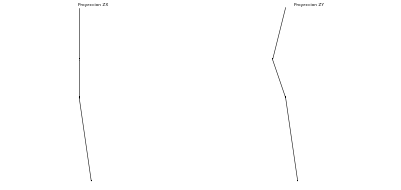


****** EVENTO 2057 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1334            2057          56        1.0        1.0     -220.0        0.0   
1335            2057          56        1.0        1.0     -220.0        0.0   
1336            2057          56        1.0        1.0     -220.0        0.0   
1337            2057          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1334        0.0               4        1      6.3     6.05   -187.3   
1335        0.0               4        2     -6.3     6.05   -134.8   
1336        0.0               4        3     -6.3    18.15    -96.9   
1337        0.0               4        4    -18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1334       121.562  
13

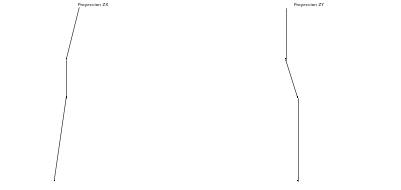


****** EVENTO 2058 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1338            2058          56        1.0        1.0     -220.0        0.0   
1339            2058          56        1.0        1.0     -220.0        0.0   
1340            2058          56        1.0        1.0     -220.0        0.0   
1341            2058          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1338        0.0               4        1      6.3     6.05   -187.3   
1339        0.0               4        2      6.3     6.05   -134.8   
1340        0.0               4        3      6.3     6.05    -96.9   
1341        0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1338       109.783  
13

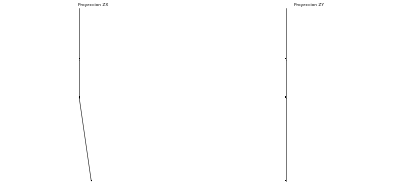


****** EVENTO 2059 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1342            2059          56        1.0        1.0     -220.0        0.0   
1343            2059          56        1.0        1.0     -220.0        0.0   
1344            2059          56        1.0        1.0     -220.0        0.0   
1345            2059          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1342        0.0               4        1      6.3     6.05   -187.3   
1343        0.0               4        2      6.3    -6.05   -134.8   
1344        0.0               4        3     18.9    -6.05    -96.9   
1345        0.0               4        4     69.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1342       106.781  
13

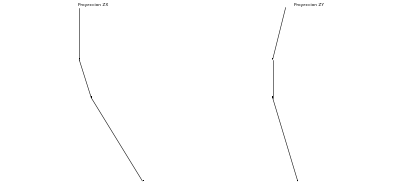


****** EVENTO 2060 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1346            2060          56        1.0        1.0     -220.0        0.0   
1347            2060          56        1.0        1.0     -220.0        0.0   
1348            2060          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1346        0.0               3        1      6.3     6.05   -187.3   
1347        0.0               3        2      6.3    -6.05   -134.8   
1348        0.0               3        4     -6.3    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1346        11.536  
1347       310.108  
1348       929.668  


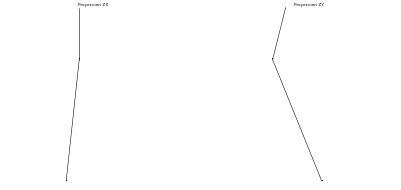


****** EVENTO 2061 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1349            2061          56        1.0        1.0     -220.0        0.0   
1350            2061          56        1.0        1.0     -220.0        0.0   
1351            2061          56        1.0        1.0     -220.0        0.0   
1352            2061          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1349        0.0               4        1      6.3     6.05   -187.3   
1350        0.0               4        2      6.3     6.05   -134.8   
1351        0.0               4        3      6.3     6.05    -96.9   
1352        0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1349       107.571  
13

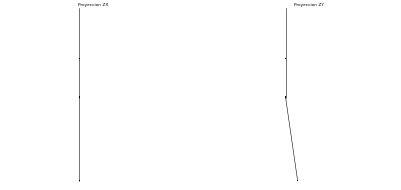


****** EVENTO 2062 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1353            2062          56        1.0        1.0     -220.0        0.0   
1354            2062          56        1.0        1.0     -220.0        0.0   
1355            2062          56        1.0        1.0     -220.0        0.0   
1356            2062          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1353        0.0               4        1      6.3     6.05   -187.3   
1354        0.0               4        2      6.3     6.05   -134.8   
1355        0.0               4        3      6.3     6.05    -96.9   
1356        0.0               4        4     44.1    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1353       112.698  
13

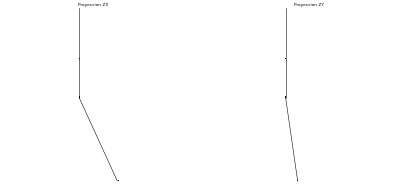


****** EVENTO 2063 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1357            2063          56        1.0        1.0     -220.0        0.0   
1358            2063          56        1.0        1.0     -220.0        0.0   
1359            2063          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1357        0.0               3        1      6.3     6.05   -187.3   
1358        0.0               3        2     -6.3     6.05   -134.8   
1359        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1357       112.658  
1358       308.759  
1359       438.119  


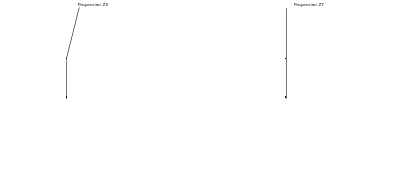


****** EVENTO 2064 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1360            2064          56        1.0        1.0     -220.0        0.0   
1361            2064          56        1.0        1.0     -220.0        0.0   
1362            2064          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1360        0.0               3        1      6.3     6.05   -187.3   
1361        0.0               3        2     -6.3     6.05   -134.8   
1362        0.0               3        4     -6.3    54.45    -13.2   

        Time_h[ns]  
Hit_Id              
1360       108.671  
1361       352.355  
1362       998.229  


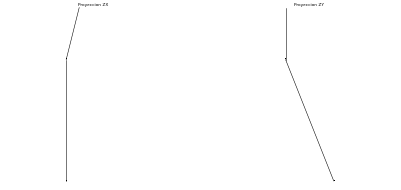


****** EVENTO 2065 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1363            2065          56        1.0        1.0     -220.0        0.0   
1364            2065          56        1.0        1.0     -220.0        0.0   
1365            2065          56        1.0        1.0     -220.0        0.0   
1366            2065          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1363        0.0               4        1      6.3     6.05   -187.3   
1364        0.0               4        2      6.3     6.05   -134.8   
1365        0.0               4        3     -6.3    -6.05    -96.9   
1366        0.0               4        4     -6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1363       104.261  
13

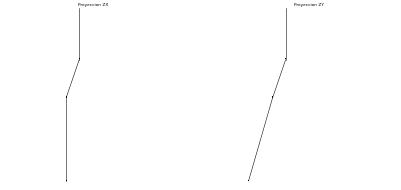


****** EVENTO 2066 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1367            2066          56        1.0        1.0     -220.0        0.0   
1368            2066          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1367        0.0               2        1      6.3     6.05   -187.3   
1368        0.0               2        4     -6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1367       109.973  
1368       871.569  


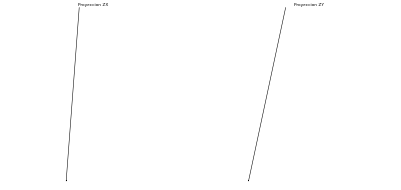


****** EVENTO 2067 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1369            2067          56        1.0        1.0     -220.0        0.0   
1370            2067          56        1.0        1.0     -220.0        0.0   
1371            2067          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1369        0.0               3        1      6.3     6.05   -187.3   
1370        0.0               3        2      6.3     6.05   -134.8   
1371        0.0               3        3     18.9     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1369       115.264  
1370       320.349  
1371       504.051  


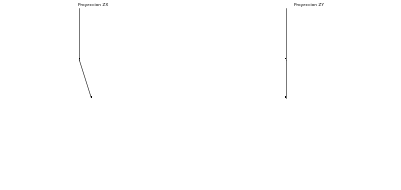


****** EVENTO 2068 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1372            2068          56        1.0        1.0     -220.0        0.0   
1373            2068          56        1.0        1.0     -220.0        0.0   
1374            2068          56        1.0        1.0     -220.0        0.0   
1375            2068          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1372        0.0               4        1      6.3     6.05   -187.3   
1373        0.0               4        2      6.3     6.05   -134.8   
1374        0.0               4        3      6.3     6.05    -96.9   
1375        0.0               4        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1372        10.818  
13

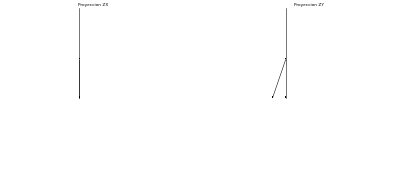


****** EVENTO 2069 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1376            2069          56        1.0        1.0     -220.0        0.0   
1377            2069          56        1.0        1.0     -220.0        0.0   
1378            2069          56        1.0        1.0     -220.0        0.0   
1379            2069          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1376        0.0               4        1      6.3     6.05   -187.3   
1377        0.0               4        2      6.3     6.05   -134.8   
1378        0.0               4        3      6.3     6.05    -96.9   
1379        0.0               4        4     31.5    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1376       111.814  
13

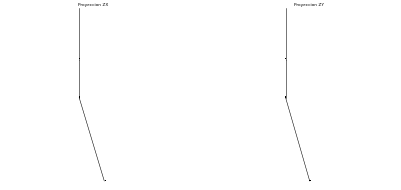


****** EVENTO 2070 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1380            2070          56        1.0        1.0     -220.0        0.0   
1381            2070          56        1.0        1.0     -220.0        0.0   
1382            2070          56        1.0        1.0     -220.0        0.0   
1383            2070          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1380        0.0               4        1      6.3     6.05   -187.3   
1381        0.0               4        2      6.3    -6.05   -134.8   
1382        0.0               4        3      6.3    -6.05    -96.9   
1383        0.0               4        4      6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1380       106.814  
13

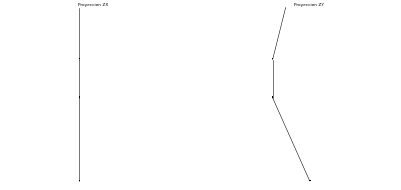


****** EVENTO 2071 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1384            2071          56        1.0        1.0     -220.0        0.0   
1385            2071          56        1.0        1.0     -220.0        0.0   
1386            2071          56        1.0        1.0     -220.0        0.0   
1387            2071          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1384        0.0               4        1      6.3     6.05   -187.3   
1385        0.0               4        2     -6.3     6.05   -134.8   
1386        0.0               4        3     -6.3     6.05    -96.9   
1387        0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1384       110.093  
13

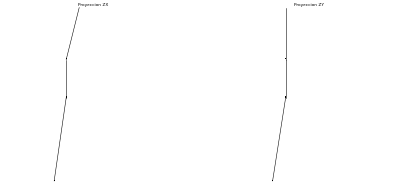


****** EVENTO 2072 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1388            2072          56        1.0        1.0     -220.0        0.0   
1389            2072          56        1.0        1.0     -220.0        0.0   
1390            2072          56        1.0        1.0     -220.0        0.0   
1391            2072          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1388        0.0               4        1      6.3     6.05   -187.3   
1389        0.0               4        2      6.3     6.05   -134.8   
1390        0.0               4        3      6.3    18.15    -96.9   
1391        0.0               4        4     18.9    54.45    -13.2   

        Time_h[ns]  
Hit_Id              
1388       111.902  
13

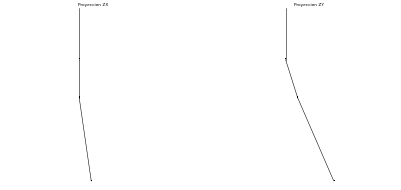


****** EVENTO 2073 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1392            2073          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1392        0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
1392       112.602  


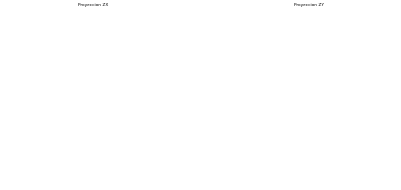


****** EVENTO 2074 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1393            2074          56        1.0        1.0     -220.0        0.0   
1394            2074          56        1.0        1.0     -220.0        0.0   
1395            2074          56        1.0        1.0     -220.0        0.0   
1396            2074          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1393        0.0               4        1      6.3     6.05   -187.3   
1394        0.0               4        2      6.3    -6.05   -134.8   
1395        0.0               4        3      6.3    -6.05    -96.9   
1396        0.0               4        4     31.5   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1393       110.275  
13

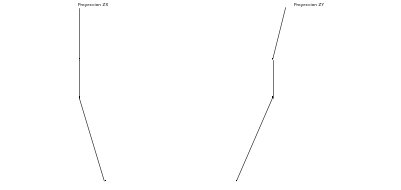


****** EVENTO 2075 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1397            2075          56        1.0        1.0     -220.0        0.0   
1398            2075          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1397        0.0               2        1      6.3     6.05   -187.3   
1398        0.0               2        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1397       114.584  
1398       421.079  


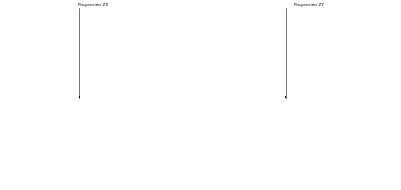


****** EVENTO 2076 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1399            2076          56        1.0        1.0     -220.0        0.0   
1400            2076          56        1.0        1.0     -220.0        0.0   
1401            2076          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1399        0.0               3        1      6.3     6.05   -187.3   
1400        0.0               3        2     -6.3    -6.05   -134.8   
1401        0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1399       109.098  
1400       291.973  
1401       445.111  


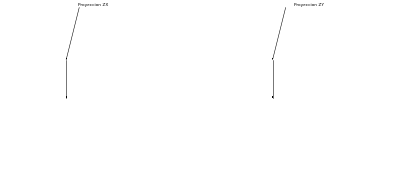


****** EVENTO 2077 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1402            2077          56        1.0        1.0     -220.0        0.0   
1403            2077          56        1.0        1.0     -220.0        0.0   
1404            2077          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1402        0.0               3        1      6.3     6.05   -187.3   
1403        0.0               3        3     -6.3    -6.05    -96.9   
1404        0.0               3        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1402       115.012  
1403       423.849  
1404       807.996  


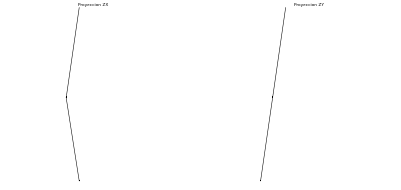


****** EVENTO 2078 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1405            2078          56        1.0        1.0     -220.0        0.0   
1406            2078          56        1.0        1.0     -220.0        0.0   
1407            2078          56        1.0        1.0     -220.0        0.0   
1408            2078          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1405        0.0               4        1      6.3     6.05   -187.3   
1406        0.0               4        2     -6.3    -6.05   -134.8   
1407        0.0               4        3     -6.3    -6.05    -96.9   
1408        0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1405       111.274  
14

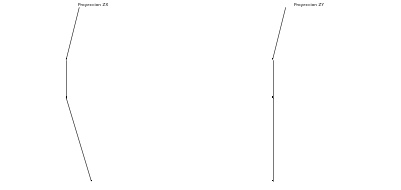


****** EVENTO 2079 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1409            2079          56        1.0        1.0     -220.0        0.0   
1410            2079          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1409        0.0               2        1      6.3     6.05   -187.3   
1410        0.0               2        2     18.9     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
1409       111.069  
1410       412.263  


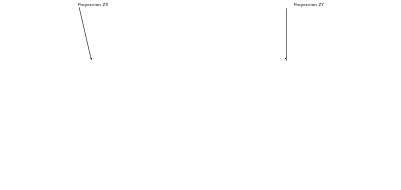


****** EVENTO 2080 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1411            2080          56        1.0        1.0     -220.0        0.0   
1412            2080          56        1.0        1.0     -220.0        0.0   
1413            2080          56        1.0        1.0     -220.0        0.0   
1414            2080          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1411        0.0               4        1      6.3     6.05   -187.3   
1412        0.0               4        2      6.3    -6.05   -134.8   
1413        0.0               4        3     18.9   -18.15    -96.9   
1414        0.0               4        4     44.1   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1411       108.301  
14

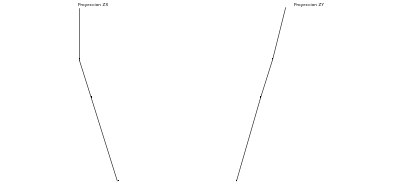


****** EVENTO 2081 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1415            2081          56        1.0        1.0     -220.0        0.0   
1416            2081          56        1.0        1.0     -220.0        0.0   
1417            2081          56        1.0        1.0     -220.0        0.0   
1418            2081          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1415        0.0               4        1      6.3     6.05   -187.3   
1416        0.0               4        2      6.3     6.05   -134.8   
1417        0.0               4        3     -6.3    -6.05    -96.9   
1418        0.0               4        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1415       116.408  
14

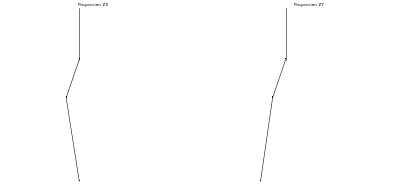


****** EVENTO 2082 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1419            2082          56        1.0        1.0     -220.0        0.0   
1420            2082          56        1.0        1.0     -220.0        0.0   
1421            2082          56        1.0        1.0     -220.0        0.0   
1422            2082          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1419        0.0               4        1      6.3     6.05   -187.3   
1420        0.0               4        2      6.3     6.05   -134.8   
1421        0.0               4        3      6.3     6.05    -96.9   
1422        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1419       111.886  
14

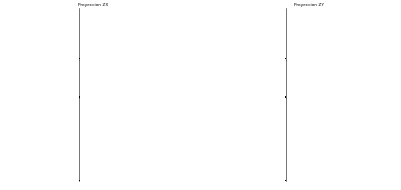


****** EVENTO 2083 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1423            2083          56        1.0        1.0     -220.0        0.0   
1424            2083          56        1.0        1.0     -220.0        0.0   
1425            2083          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1423        0.0               3        1      6.3     6.05   -187.3   
1424        0.0               3        2      6.3    -6.05   -134.8   
1425        0.0               3        4      6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1423       107.681  
1424       302.676  
1425       867.969  


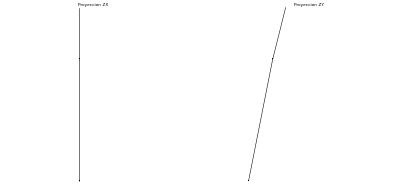


****** EVENTO 2084 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1426            2084          56        1.0        1.0     -220.0        0.0   
1427            2084          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1426        0.0               2        1      6.3     6.05   -187.3   
1427        0.0               2        2     -6.3    -6.05   -134.8   

        Time_h[ns]  
Hit_Id              
1426       108.792  
1427       289.342  


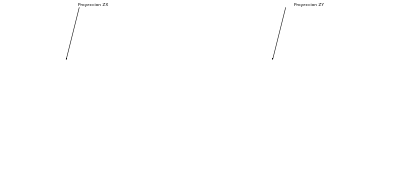


****** EVENTO 2085 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1428            2085          56        1.0        1.0     -220.0        0.0   
1429            2085          56        1.0        1.0     -220.0        0.0   
1430            2085          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1428        0.0               3        1      6.3     6.05   -187.3   
1429        0.0               3        3     -6.3    -6.05    -96.9   
1430        0.0               3        4    -56.7    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1428       110.886  
1429       444.733  
1430       105.462  


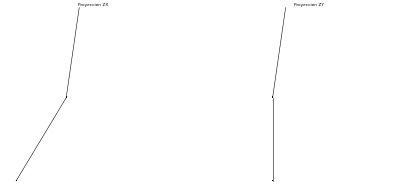


****** EVENTO 2086 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1431            2086          56        1.0        1.0     -220.0        0.0   
1432            2086          56        1.0        1.0     -220.0        0.0   
1433            2086          56        1.0        1.0     -220.0        0.0   
1434            2086          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1431        0.0               4        1      6.3     6.05   -187.3   
1432        0.0               4        2     -6.3     6.05   -134.8   
1433        0.0               4        3     -6.3     6.05    -96.9   
1434        0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1431       110.214  
14

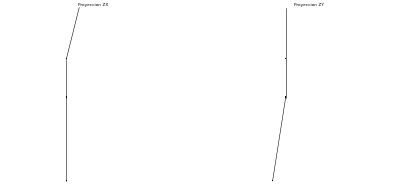


****** EVENTO 2087 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1435            2087          56        1.0        1.0     -220.0        0.0   
1436            2087          56        1.0        1.0     -220.0        0.0   
1437            2087          56        1.0        1.0     -220.0        0.0   
1438            2087          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1435        0.0               4        1      6.3     6.05   -187.3   
1436        0.0               4        2     -6.3    -6.05   -134.8   
1437        0.0               4        3     -6.3    -6.05    -96.9   
1438        0.0               4        4    -31.5   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1435       117.501  
14

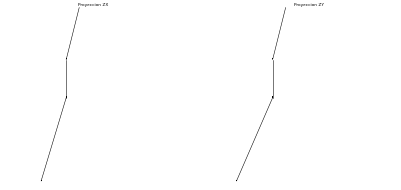


****** EVENTO 2088 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1439            2088          56        1.0        1.0     -220.0        0.0   
1440            2088          56        1.0        1.0     -220.0        0.0   
1441            2088          56        1.0        1.0     -220.0        0.0   
1442            2088          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1439        0.0               4        1      6.3     6.05   -187.3   
1440        0.0               4        2      6.3    -6.05   -134.8   
1441        0.0               4        3      6.3    -6.05    -96.9   
1442        0.0               4        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1439       113.788  
14

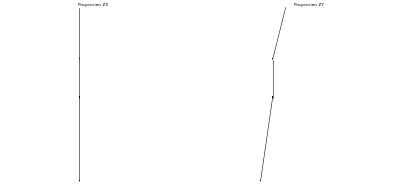


****** EVENTO 2089 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1443            2089          56        1.0        1.0     -220.0        0.0   
1444            2089          56        1.0        1.0     -220.0        0.0   
1445            2089          56        1.0        1.0     -220.0        0.0   
1446            2089          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1443        0.0               4        1      6.3     6.05   -187.3   
1444        0.0               4        2     -6.3     6.05   -134.8   
1445        0.0               4        3     -6.3     6.05    -96.9   
1446        0.0               4        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1443       117.038  
14

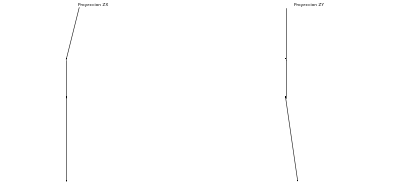


****** EVENTO 2090 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1447            2090          56        1.0        1.0     -220.0        0.0   
1448            2090          56        1.0        1.0     -220.0        0.0   
1449            2090          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1447        0.0               3        1      6.3     6.05   -187.3   
1448        0.0               3        2     -6.3     6.05   -134.8   
1449        0.0               3        3    -18.9     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1447       117.289  
1448       332.718  
1449       497.772  


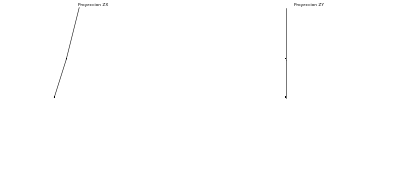


****** EVENTO 2091 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1450            2091          56        1.0        1.0     -220.0        0.0   
1451            2091          56        1.0        1.0     -220.0        0.0   
1452            2091          56        1.0        1.0     -220.0        0.0   
1453            2091          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1450        0.0               4        1      6.3     6.05   -187.3   
1451        0.0               4        2      6.3    -6.05   -134.8   
1452        0.0               4        3      6.3    -6.05    -96.9   
1453        0.0               4        4     31.5   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1450       104.546  
14

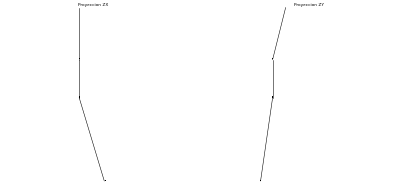


****** EVENTO 2092 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1454            2092          56        1.0        1.0     -220.0        0.0   
1455            2092          56        1.0        1.0     -220.0        0.0   
1456            2092          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1454        0.0               3        1      6.3     6.05   -187.3   
1455        0.0               3        2     -6.3     6.05   -134.8   
1456        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1454       111.523  
1455       312.681  
1456       451.028  


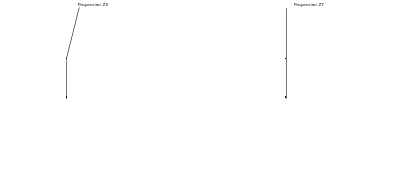


****** EVENTO 2093 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1457            2093          56        1.0        1.0     -220.0        0.0   
1458            2093          56        1.0        1.0     -220.0        0.0   
1459            2093          56        1.0        1.0     -220.0        0.0   
1460            2093          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1457        0.0               4        1      6.3     6.05   -187.3   
1458        0.0               4        2     -6.3     6.05   -134.8   
1459        0.0               4        3     -6.3     6.05    -96.9   
1460        0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1457       110.106  
14

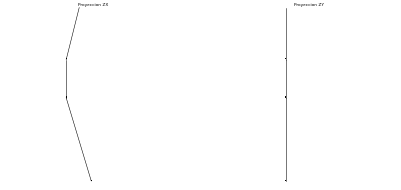


****** EVENTO 2094 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1461            2094          56        1.0        1.0     -220.0        0.0   
1462            2094          56        1.0        1.0     -220.0        0.0   
1463            2094          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1461        0.0               3        1      6.3     6.05   -187.3   
1462        0.0               3        2     -6.3    -6.05   -134.8   
1463        0.0               3        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1461       110.155  
1462       295.681  
1463       823.027  


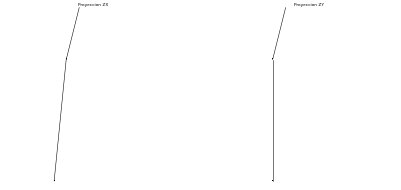


****** EVENTO 2095 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1464            2095          56        1.0        1.0     -220.0        0.0   
1465            2095          56        1.0        1.0     -220.0        0.0   
1466            2095          56        1.0        1.0     -220.0        0.0   
1467            2095          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1464        0.0               4        1      6.3     6.05   -187.3   
1465        0.0               4        2      6.3     6.05   -134.8   
1466        0.0               4        3      6.3     6.05    -96.9   
1467        0.0               4        4    -31.5    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1464       107.079  
14

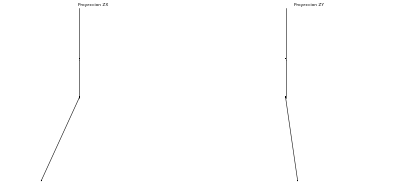


****** EVENTO 2096 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1468            2096          56        1.0        1.0     -220.0        0.0   
1469            2096          56        1.0        1.0     -220.0        0.0   
1470            2096          56        1.0        1.0     -220.0        0.0   
1471            2096          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1468        0.0               4        1      6.3     6.05   -187.3   
1469        0.0               4        2     -6.3    -6.05   -134.8   
1470        0.0               4        3    -18.9    -6.05    -96.9   
1471        0.0               4        4    -31.5   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
1468       110.326  
14

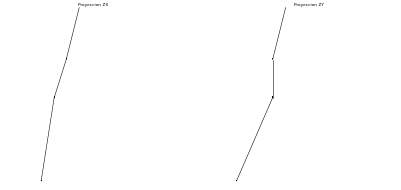


****** EVENTO 2097 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1472            2097          56        1.0        1.0     -220.0        0.0   
1473            2097          56        1.0        1.0     -220.0        0.0   
1474            2097          56        1.0        1.0     -220.0        0.0   
1475            2097          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1472        0.0               4        1      6.3     6.05   -187.3   
1473        0.0               4        2      6.3     6.05   -134.8   
1474        0.0               4        3     18.9     6.05    -96.9   
1475        0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1472       114.486  
14

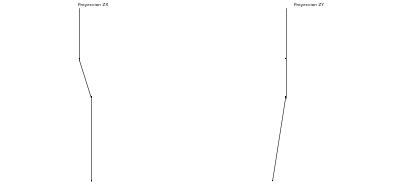


****** EVENTO 2098 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1476            2098          56        1.0        1.0     -220.0        0.0   
1477            2098          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1476        0.0               2        1      6.3     6.05   -187.3   
1477        0.0               2        3     -6.3   -18.15    -96.9   

        Time_h[ns]  
Hit_Id              
1476       107.492  
1477       545.136  


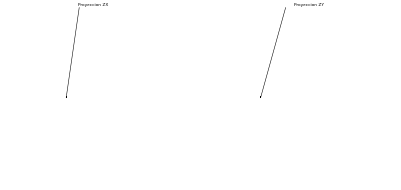


****** EVENTO 2099 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1478            2099          56        1.0        1.0     -220.0        0.0   
1479            2099          56        1.0        1.0     -220.0        0.0   
1480            2099          56        1.0        1.0     -220.0        0.0   
1481            2099          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1478        0.0               4        1      6.3     6.05   -187.3   
1479        0.0               4        2      6.3    -6.05   -134.8   
1480        0.0               4        3     18.9    -6.05    -96.9   
1481        0.0               4        4     44.1    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1478       113.602  
14

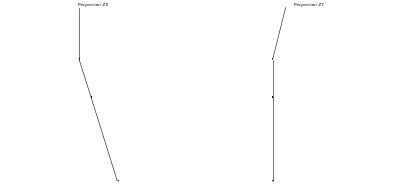


****** EVENTO 2100 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1482            2100          56        1.0        1.0     -220.0        0.0   
1483            2100          56        1.0        1.0     -220.0        0.0   
1484            2100          56        1.0        1.0     -220.0        0.0   
1485            2100          56        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1482        0.0               4        1      6.3     6.05   -187.3   
1483        0.0               4        2      6.3     6.05   -134.8   
1484        0.0               4        3      6.3    18.15    -96.9   
1485        0.0               4        4     44.1    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1482       117.503  
14

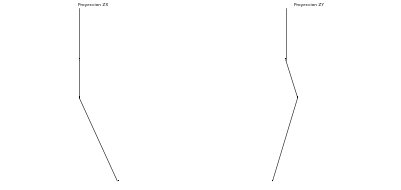


****** EVENTO 3001 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
0               3001         100        1.0        1.0     -220.0        0.0   
1               3001         100        1.0        1.0     -220.0        0.0   
2               3001         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
0           0.0               3        1      6.3     6.05   -187.3   
1           0.0               3        2      6.3     6.05   -134.8   
2           0.0               3        4     31.5    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
0          112.957  
1          317.644  
2           89.189  


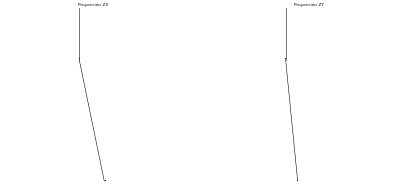


****** EVENTO 3002 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
3               3002         100        1.0        1.0     -220.0        0.0   
4               3002         100        1.0        1.0     -220.0        0.0   
5               3002         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
3           0.0               3        1      6.3     6.05   -187.3   
4           0.0               3        2     -6.3    -6.05   -134.8   
5           0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
3           11.484  
4          288.073  
5          716.903  


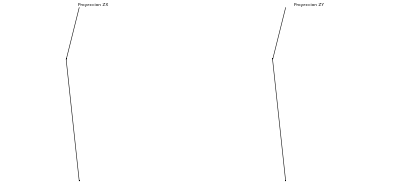


****** EVENTO 3003 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
6               3003         100        1.0        1.0     -220.0        0.0   
7               3003         100        1.0        1.0     -220.0        0.0   
8               3003         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
6           0.0               3        1      6.3     6.05   -187.3   
7           0.0               3        3      6.3    -6.05    -96.9   
8           0.0               3        4      6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
6          110.271  
7           46.338  
8          906.787  


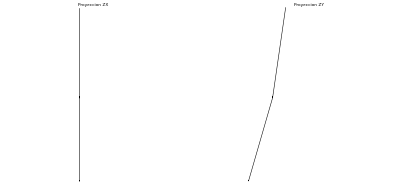


****** EVENTO 3004 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
9               3004         100        1.0        1.0     -220.0        0.0   
10              3004         100        1.0        1.0     -220.0        0.0   
11              3004         100        1.0        1.0     -220.0        0.0   
12              3004         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
9           0.0               4        1      6.3     6.05   -187.3   
10          0.0               4        2      6.3     6.05   -134.8   
11          0.0               4        3      6.3     6.05    -96.9   
12          0.0               4        4     31.5    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
9          111.798  
10

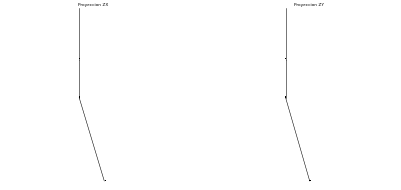


****** EVENTO 3005 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
13              3005         100        1.0        1.0     -220.0        0.0   
14              3005         100        1.0        1.0     -220.0        0.0   
15              3005         100        1.0        1.0     -220.0        0.0   
16              3005         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
13          0.0               4        1      6.3     6.05   -187.3   
14          0.0               4        2      6.3     6.05   -134.8   
15          0.0               4        3      6.3     6.05    -96.9   
16          0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
13         117.997  
14

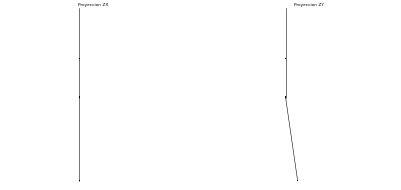


****** EVENTO 3006 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
17              3006         100        1.0        1.0     -220.0        0.0   
18              3006         100        1.0        1.0     -220.0        0.0   
19              3006         100        1.0        1.0     -220.0        0.0   
20              3006         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
17          0.0               4        1      6.3     6.05   -187.3   
18          0.0               4        2      6.3     6.05   -134.8   
19          0.0               4        3      6.3    -6.05    -96.9   
20          0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
17         108.816  
18

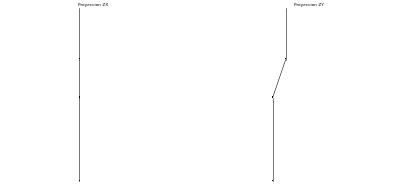


****** EVENTO 3007 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
21              3007         100        1.0        1.0     -220.0        0.0   
22              3007         100        1.0        1.0     -220.0        0.0   
23              3007         100        1.0        1.0     -220.0        0.0   
24              3007         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
21          0.0               4        1      6.3     6.05   -187.3   
22          0.0               4        2      6.3     6.05   -134.8   
23          0.0               4        3     -6.3     6.05    -96.9   
24          0.0               4        4     -6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
21         106.745  
22

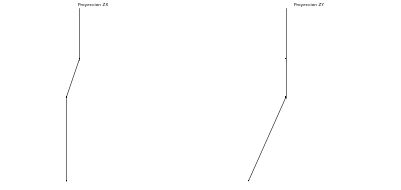


****** EVENTO 3008 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
25              3008         100        1.0        1.0     -220.0        0.0   
26              3008         100        1.0        1.0     -220.0        0.0   
27              3008         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
25          0.0               3        1      6.3     6.05   -187.3   
26          0.0               3        3     -6.3     6.05    -96.9   
27          0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
25         115.278  
26          43.567  
27         429.386  


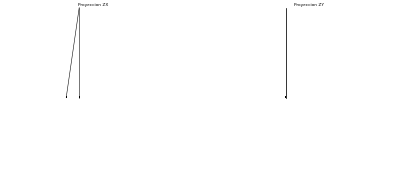


****** EVENTO 3009 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
28              3009         100        1.0        1.0     -220.0        0.0   
29              3009         100        1.0        1.0     -220.0        0.0   
30              3009         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
28          0.0               3        1      6.3     6.05   -187.3   
29          0.0               3        3     -6.3     6.05    -96.9   
30          0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
28         109.285  
29         426.227  
30         736.244  


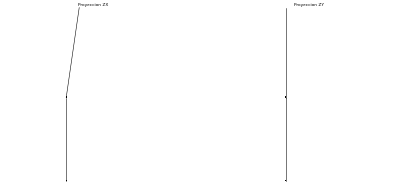


****** EVENTO 3010 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
31              3010         100        1.0        1.0     -220.0        0.0   
32              3010         100        1.0        1.0     -220.0        0.0   
33              3010         100        1.0        1.0     -220.0        0.0   
34              3010         100        1.0        1.0     -220.0        0.0   
35              3010         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
31          0.0               5        1      6.3     6.05   -187.3   
32          0.0               5        2      6.3     6.05   -134.8   
33          0.0               5        3     -6.3     6.05    -96.9   
34          0.0               5        4    -56.7    54.4

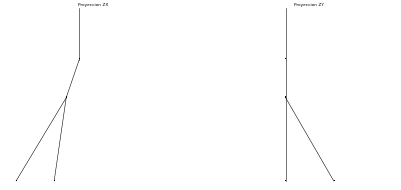


****** EVENTO 3011 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
36              3011         100        1.0        1.0     -220.0        0.0   
37              3011         100        1.0        1.0     -220.0        0.0   
38              3011         100        1.0        1.0     -220.0        0.0   
39              3011         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
36          0.0               4        1      6.3     6.05   -187.3   
37          0.0               4        2      6.3     6.05   -134.8   
38          0.0               4        3      6.3     6.05    -96.9   
39          0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
36         113.489  
37

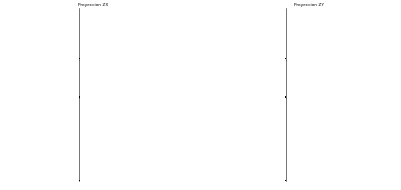


****** EVENTO 3012 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
40              3012         100        1.0        1.0     -220.0        0.0   
41              3012         100        1.0        1.0     -220.0        0.0   
42              3012         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
40          0.0               3        1      6.3     6.05   -187.3   
41          0.0               3        3     -6.3     6.05    -96.9   
42          0.0               3        4    -31.5    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
40         113.378  
41         440.449  
42         982.945  


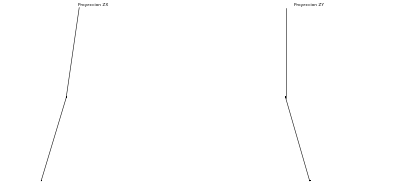


****** EVENTO 3013 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
43              3013         100        1.0        1.0     -220.0        0.0   
44              3013         100        1.0        1.0     -220.0        0.0   
45              3013         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
43          0.0               3        1      6.3     6.05   -187.3   
44          0.0               3        2     -6.3    -6.05   -134.8   
45          0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
43         115.811  
44         291.144  
45         431.317  


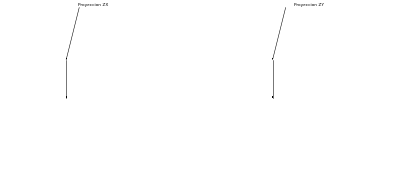


****** EVENTO 3014 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
46              3014         100        1.0        1.0     -220.0        0.0   
47              3014         100        1.0        1.0     -220.0        0.0   
48              3014         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
46          0.0               3        1      6.3     6.05   -187.3   
47          0.0               3        3     -6.3     6.05    -96.9   
48          0.0               3        4    -18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
46         109.796  
47         436.527  
48         866.009  


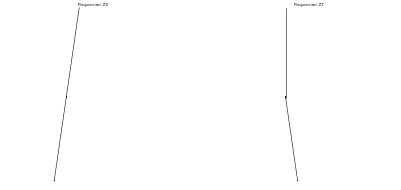


****** EVENTO 3015 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
49              3015         100        1.0        1.0     -220.0        0.0   
50              3015         100        1.0        1.0     -220.0        0.0   
51              3015         100        1.0        1.0     -220.0        0.0   
52              3015         100        1.0        1.0     -220.0        0.0   
53              3015         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
49          0.0               5        1      6.3     6.05   -187.3   
50          0.0               5        2      6.3     6.05   -134.8   
51          0.0               5        3     18.9     6.05    -96.9   
52          0.0               5        4     18.9    30.2

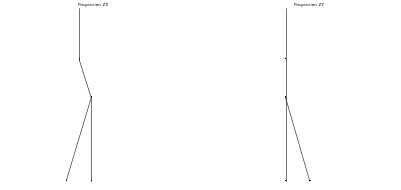


****** EVENTO 3016 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
54              3016         100        1.0        1.0     -220.0        0.0   
55              3016         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
54          0.0               2        1      6.3     6.05   -187.3   
55          0.0               2        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
54         109.875  
55         731.969  


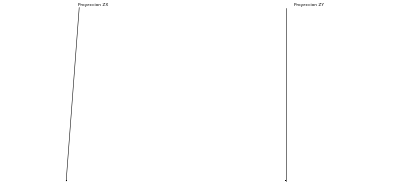


****** EVENTO 3017 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
56              3017         100        1.0        1.0     -220.0        0.0   
57              3017         100        1.0        1.0     -220.0        0.0   
58              3017         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
56          0.0               3        1      6.3     6.05   -187.3   
57          0.0               3        2      6.3     6.05   -134.8   
58          0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
56          11.254  
57          28.479  
58         430.837  


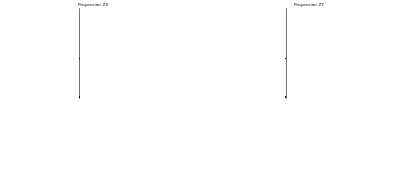


****** EVENTO 3018 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
59              3018         100        1.0        1.0     -220.0        0.0   
60              3018         100        1.0        1.0     -220.0        0.0   
61              3018         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
59          0.0               3        1      6.3     6.05   -187.3   
60          0.0               3        3      6.3    -6.05    -96.9   
61          0.0               3        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
59         109.685  
60         439.555  
61         788.518  


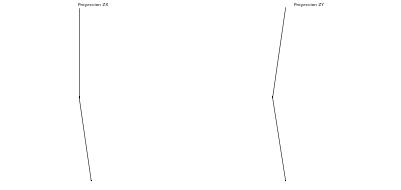


****** EVENTO 3019 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
62              3019         100        1.0        1.0     -220.0        0.0   
63              3019         100        1.0        1.0     -220.0        0.0   
64              3019         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
62          0.0               3        1      6.3     6.05   -187.3   
63          0.0               3        3      6.3    -6.05    -96.9   
64          0.0               3        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
62         111.509  
63         432.973  
64         782.501  


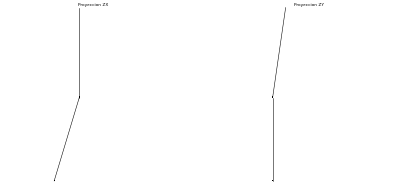


****** EVENTO 3020 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
65              3020         100        1.0        1.0     -220.0        0.0   
66              3020         100        1.0        1.0     -220.0        0.0   
67              3020         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
65          0.0               3        1      6.3     6.05   -187.3   
66          0.0               3        2      6.3     6.05   -134.8   
67          0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
65         115.461  
66         309.364  
67         463.278  


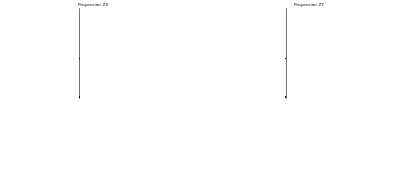


****** EVENTO 3021 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
68              3021         100        1.0        1.0     -220.0        0.0   
69              3021         100        1.0        1.0     -220.0        0.0   
70              3021         100        1.0        1.0     -220.0        0.0   
71              3021         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
68          0.0               4        1      6.3     6.05   -187.3   
69          0.0               4        2      6.3     6.05   -134.8   
70          0.0               4        3      6.3     6.05    -96.9   
71          0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
68         110.939  
69

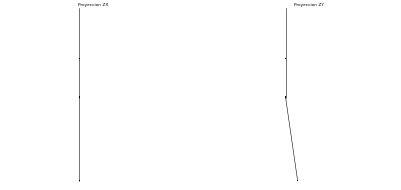


****** EVENTO 3022 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
72              3022         100        1.0        1.0     -220.0        0.0   
73              3022         100        1.0        1.0     -220.0        0.0   
74              3022         100        1.0        1.0     -220.0        0.0   
75              3022         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
72          0.0               4        1      6.3     6.05   -187.3   
73          0.0               4        2      6.3     6.05   -134.8   
74          0.0               4        3      6.3     6.05    -96.9   
75          0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
72          11.441  
73

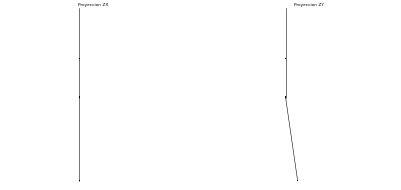


****** EVENTO 3023 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
76              3023         100        1.0        1.0     -220.0        0.0   
77              3023         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
76          0.0               2        1      6.3     6.05   -187.3   
77          0.0               2        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
76         112.825  
77         707.858  


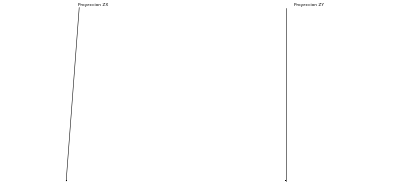


****** EVENTO 3024 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
78              3024         100        1.0        1.0     -220.0        0.0   
79              3024         100        1.0        1.0     -220.0        0.0   
80              3024         100        1.0        1.0     -220.0        0.0   
81              3024         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
78          0.0               4        1      6.3     6.05   -187.3   
79          0.0               4        2      6.3    -6.05   -134.8   
80          0.0               4        3      6.3    -6.05    -96.9   
81          0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
78         111.929  
79

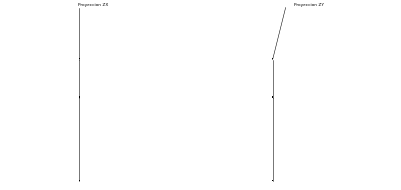


****** EVENTO 3025 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
82              3025         100        1.0        1.0     -220.0        0.0   
83              3025         100        1.0        1.0     -220.0        0.0   
84              3025         100        1.0        1.0     -220.0        0.0   
85              3025         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
82          0.0               4        1      6.3     6.05   -187.3   
83          0.0               4        2     -6.3    -6.05   -134.8   
84          0.0               4        3     18.9   -30.25    -96.9   
85          0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
82         115.364  
83

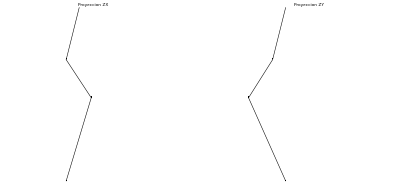


****** EVENTO 3026 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
86              3026         100        1.0        1.0     -220.0        0.0   
87              3026         100        1.0        1.0     -220.0        0.0   
88              3026         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
86          0.0               3        1      6.3     6.05   -187.3   
87          0.0               3        2     -6.3     6.05   -134.8   
88          0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
86         113.227  
87         304.768  
88         711.502  


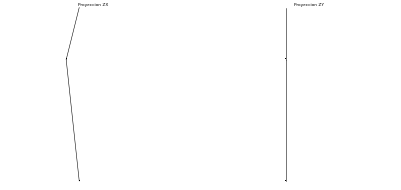


****** EVENTO 3027 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
89              3027         100        1.0        1.0     -220.0        0.0   
90              3027         100        1.0        1.0     -220.0        0.0   
91              3027         100        1.0        1.0     -220.0        0.0   
92              3027         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
89          0.0               4        1      6.3     6.05   -187.3   
90          0.0               4        2     -6.3     6.05   -134.8   
91          0.0               4        3     -6.3     6.05    -96.9   
92          0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
89         113.072  
90

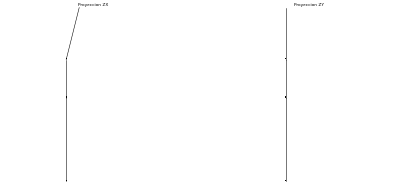


****** EVENTO 3028 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
93              3028         100        1.0        1.0     -220.0        0.0   
94              3028         100        1.0        1.0     -220.0        0.0   
95              3028         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
93          0.0               3        1      6.3     6.05   -187.3   
94          0.0               3        3     -6.3     6.05    -96.9   
95          0.0               3        4    -31.5    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
93          10.959  
94         439.272  
95         897.867  


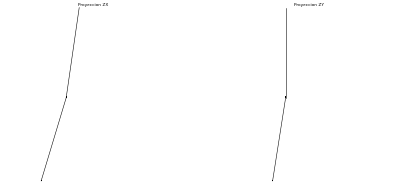


****** EVENTO 3029 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
96              3029         100        1.0        1.0     -220.0        0.0   
97              3029         100        1.0        1.0     -220.0        0.0   
98              3029         100        1.0        1.0     -220.0        0.0   
99              3029         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
96          0.0               4        1      6.3     6.05   -187.3   
97          0.0               4        2      6.3    -6.05   -134.8   
98          0.0               4        3      6.3    -6.05    -96.9   
99          0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
96         114.903  
97

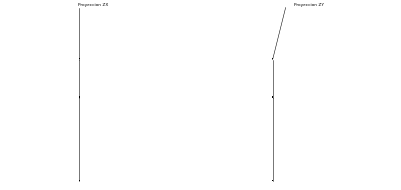


****** EVENTO 3030 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
100             3030         100        1.0        1.0     -220.0        0.0   
101             3030         100        1.0        1.0     -220.0        0.0   
102             3030         100        1.0        1.0     -220.0        0.0   
103             3030         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
100         0.0               4        1      6.3     6.05   -187.3   
101         0.0               4        2      6.3    -6.05   -134.8   
102         0.0               4        3      6.3    -6.05    -96.9   
103         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
100        120.344  
10

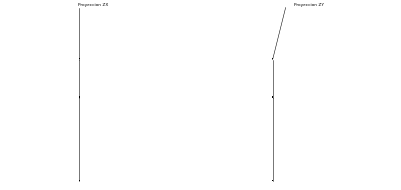


****** EVENTO 3031 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
104             3031         100        1.0        1.0     -220.0        0.0   
105             3031         100        1.0        1.0     -220.0        0.0   
106             3031         100        1.0        1.0     -220.0        0.0   
107             3031         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
104         0.0               4        1      6.3     6.05   -187.3   
105         0.0               4        2     -6.3     6.05   -134.8   
106         0.0               4        3     -6.3     6.05    -96.9   
107         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
104        114.907  
10

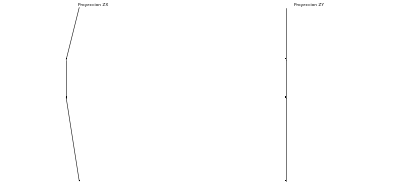


****** EVENTO 3032 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
108             3032         100        1.0        1.0     -220.0        0.0   
109             3032         100        1.0        1.0     -220.0        0.0   
110             3032         100        1.0        1.0     -220.0        0.0   
111             3032         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
108         0.0               4        1      6.3     6.05   -187.3   
109         0.0               4        2      6.3    -6.05   -134.8   
110         0.0               4        3      6.3    -6.05    -96.9   
111         0.0               4        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
108        119.137  
10

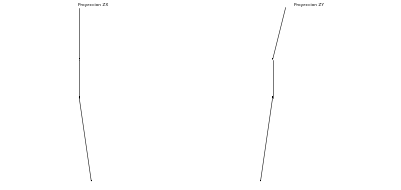


****** EVENTO 3033 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
112             3033         100        1.0        1.0     -220.0        0.0   
113             3033         100        1.0        1.0     -220.0        0.0   
114             3033         100        1.0        1.0     -220.0        0.0   
115             3033         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
112         0.0               4        1      6.3     6.05   -187.3   
113         0.0               4        2      6.3    -6.05   -134.8   
114         0.0               4        3      6.3    -6.05    -96.9   
115         0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
112        104.608  
11

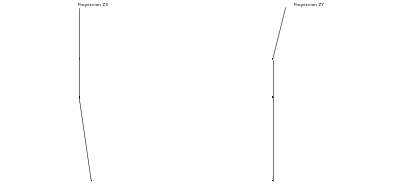


****** EVENTO 3034 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
116             3034         100        1.0        1.0     -220.0        0.0   
117             3034         100        1.0        1.0     -220.0        0.0   
118             3034         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
116         0.0               3        1      6.3     6.05   -187.3   
117         0.0               3        3     -6.3     6.05    -96.9   
118         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
116        110.027  
117        431.688  
118        692.496  


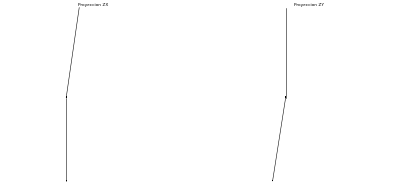


****** EVENTO 3035 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
119             3035         100        1.0        1.0     -220.0        0.0   
120             3035         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
119         0.0               2        1      6.3     6.05   -187.3   
120         0.0               2        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
119        109.434  
120        747.983  


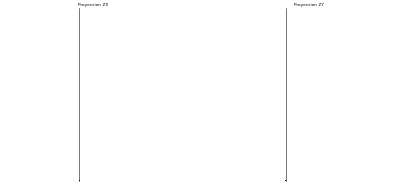


****** EVENTO 3036 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
121             3036         100        1.0        1.0     -220.0        0.0   
122             3036         100        1.0        1.0     -220.0        0.0   
123             3036         100        1.0        1.0     -220.0        0.0   
124             3036         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
121         0.0               4        1      6.3     6.05   -187.3   
122         0.0               4        2      6.3     6.05   -134.8   
123         0.0               4        3     18.9     6.05    -96.9   
124         0.0               4        4     44.1    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
121        114.037  
12

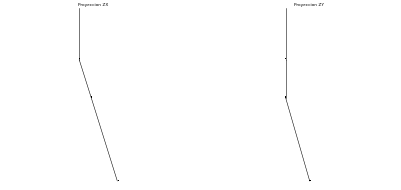


****** EVENTO 3038 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
125             3038         100        1.0        1.0     -220.0        0.0   
126             3038         100        1.0        1.0     -220.0        0.0   
127             3038         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
125         0.0               3        1      6.3     6.05   -187.3   
126         0.0               3        2      6.3     6.05   -134.8   
127         0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
125         11.494  
126        290.993  
127        432.096  


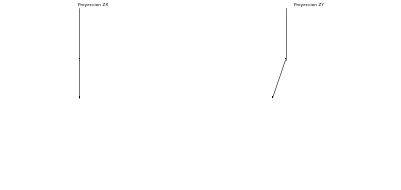


****** EVENTO 3039 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
128             3039         100        1.0        1.0     -220.0        0.0   
129             3039         100        1.0        1.0     -220.0        0.0   
130             3039         100        1.0        1.0     -220.0        0.0   
131             3039         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
128         0.0               4        1      6.3     6.05   -187.3   
129         0.0               4        2     -6.3     6.05   -134.8   
130         0.0               4        3     -6.3     6.05    -96.9   
131         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
128        107.569  
12

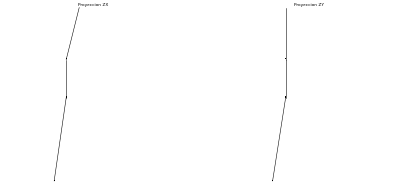


****** EVENTO 3040 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
132             3040         100        1.0        1.0     -220.0        0.0   
133             3040         100        1.0        1.0     -220.0        0.0   
134             3040         100        1.0        1.0     -220.0        0.0   
135             3040         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
132         0.0               4        1      6.3     6.05   -187.3   
133         0.0               4        2      6.3    -6.05   -134.8   
134         0.0               4        3      6.3    -6.05    -96.9   
135         0.0               4        4     31.5   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
132        111.186  
13

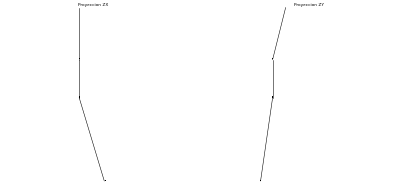


****** EVENTO 3041 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
136             3041         100        1.0        1.0     -220.0        0.0   
137             3041         100        1.0        1.0     -220.0        0.0   
138             3041         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
136         0.0               3        1      6.3     6.05   -187.3   
137         0.0               3        3     -6.3     6.05    -96.9   
138         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
136        116.185  
137        462.142  
138        725.136  


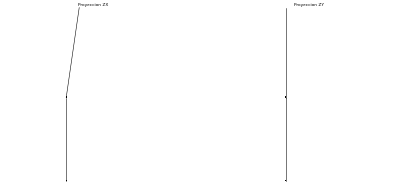


****** EVENTO 3042 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
139             3042         100        1.0        1.0     -220.0        0.0   
140             3042         100        1.0        1.0     -220.0        0.0   
141             3042         100        1.0        1.0     -220.0        0.0   
142             3042         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
139         0.0               4        1      6.3     6.05   -187.3   
140         0.0               4        2     -6.3     6.05   -134.8   
141         0.0               4        3     -6.3     6.05    -96.9   
142         0.0               4        4     31.5     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
139        113.935  
14

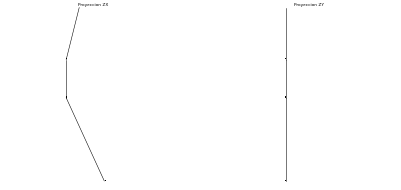


****** EVENTO 3043 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
143             3043         100        1.0        1.0     -220.0        0.0   
144             3043         100        1.0        1.0     -220.0        0.0   
145             3043         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
143         0.0               3        1      6.3     6.05   -187.3   
144         0.0               3        3     -6.3    -6.05    -96.9   
145         0.0               3        4    -18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
143         11.272  
144        430.125  
145        867.838  


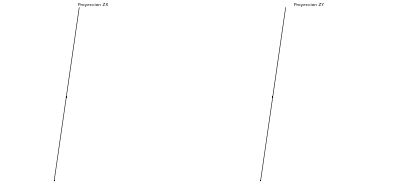


****** EVENTO 3044 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
146             3044         100        1.0        1.0     -220.0        0.0   
147             3044         100        1.0        1.0     -220.0        0.0   
148             3044         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
146         0.0               3        1      6.3     6.05   -187.3   
147         0.0               3        2     -6.3     6.05   -134.8   
148         0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
146         11.088  
147        295.778  
148        457.621  


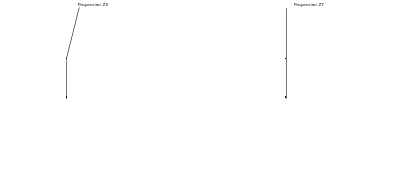


****** EVENTO 3045 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
149             3045         100        1.0        1.0     -220.0        0.0   
150             3045         100        1.0        1.0     -220.0        0.0   
151             3045         100        1.0        1.0     -220.0        0.0   
152             3045         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
149         0.0               4        1      6.3     6.05   -187.3   
150         0.0               4        2     -6.3    -6.05   -134.8   
151         0.0               4        3      6.3    -6.05    -96.9   
152         0.0               4        4     31.5     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
149         11.014  
15

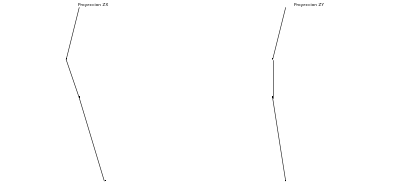


****** EVENTO 3046 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
153             3046         100        1.0        1.0     -220.0        0.0   
154             3046         100        1.0        1.0     -220.0        0.0   
155             3046         100        1.0        1.0     -220.0        0.0   
156             3046         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
153         0.0               4        1      6.3     6.05   -187.3   
154         0.0               4        2      6.3    -6.05   -134.8   
155         0.0               4        3      6.3    -6.05    -96.9   
156         0.0               4        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
153        113.764  
15

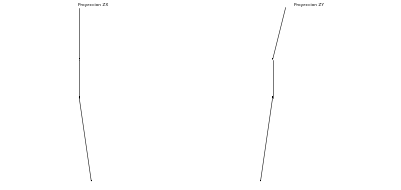


****** EVENTO 3047 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
157             3047         100        1.0        1.0     -220.0        0.0   
158             3047         100        1.0        1.0     -220.0        0.0   
159             3047         100        1.0        1.0     -220.0        0.0   
160             3047         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
157         0.0               4        1      6.3     6.05   -187.3   
158         0.0               4        2      6.3     6.05   -134.8   
159         0.0               4        3      6.3     6.05    -96.9   
160         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
157         11.859  
15

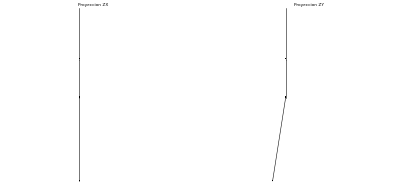


****** EVENTO 3048 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
161             3048         100        1.0        1.0     -220.0        0.0   
162             3048         100        1.0        1.0     -220.0        0.0   
163             3048         100        1.0        1.0     -220.0        0.0   
164             3048         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
161         0.0               4        1      6.3     6.05   -187.3   
162         0.0               4        3     -6.3     6.05    -96.9   
163         0.0               4        4     -6.3     6.05    -13.2   
164         0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
161        109.236  
16

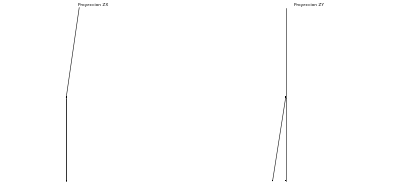


****** EVENTO 3049 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
165             3049         100        1.0        1.0     -220.0        0.0   
166             3049         100        1.0        1.0     -220.0        0.0   
167             3049         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
165         0.0               3        1      6.3     6.05   -187.3   
166         0.0               3        2      6.3     6.05   -134.8   
167         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
165        108.727  
166        307.348  
167        474.331  


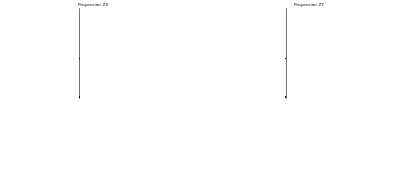


****** EVENTO 3050 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
168             3050         100        1.0        1.0     -220.0        0.0   
169             3050         100        1.0        1.0     -220.0        0.0   
170             3050         100        1.0        1.0     -220.0        0.0   
171             3050         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
168         0.0               4        1      6.3     6.05   -187.3   
169         0.0               4        2      6.3    -6.05   -134.8   
170         0.0               4        3      6.3    -6.05    -96.9   
171         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
168        112.541  
16

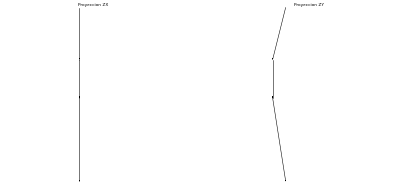


****** EVENTO 3051 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
172             3051         100        1.0        1.0     -220.0        0.0   
173             3051         100        1.0        1.0     -220.0        0.0   
174             3051         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
172         0.0               3        1      6.3     6.05   -187.3   
173         0.0               3        2      6.3     6.05   -134.8   
174         0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
172        118.915  
173        296.781  
174         72.627  


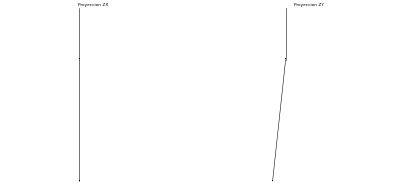


****** EVENTO 3052 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
175             3052         100        1.0        1.0     -220.0        0.0   
176             3052         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
175         0.0               2        1      6.3     6.05   -187.3   
176         0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
175        124.331  
176        707.511  


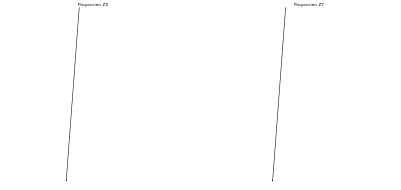


****** EVENTO 3053 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
177             3053         100        1.0        1.0     -220.0        0.0   
178             3053         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
177         0.0               2        1      6.3     6.05   -187.3   
178         0.0               2        2      6.3    -6.05   -134.8   

        Time_h[ns]  
Hit_Id              
177        104.656  
178        323.141  


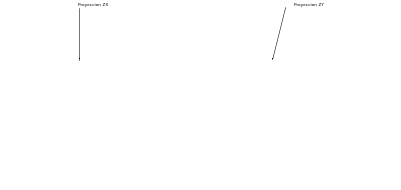


****** EVENTO 3054 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
179             3054         100        1.0        1.0     -220.0        0.0   
180             3054         100        1.0        1.0     -220.0        0.0   
181             3054         100        1.0        1.0     -220.0        0.0   
182             3054         100        1.0        1.0     -220.0        0.0   
183             3054         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
179         0.0               5        1      6.3     6.05   -187.3   
180         0.0               5        3      6.3    -6.05    -96.9   
181         0.0               5        4      6.3   -30.25    -13.2   
182         0.0               5        2      6.3    -6.0

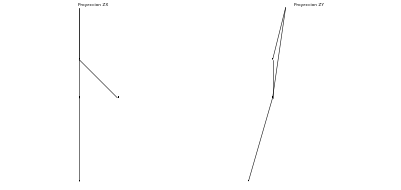


****** EVENTO 3055 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
184             3055         100        1.0        1.0     -220.0        0.0   
185             3055         100        1.0        1.0     -220.0        0.0   
186             3055         100        1.0        1.0     -220.0        0.0   
187             3055         100        1.0        1.0     -220.0        0.0   
188             3055         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
184         0.0               5        1      6.3     6.05   -187.3   
185         0.0               5        2     -6.3     6.05   -134.8   
186         0.0               5        3    -18.9     6.05    -96.9   
187         0.0               5        4    -31.5    18.1

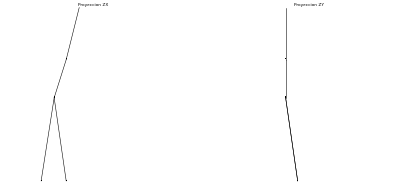


****** EVENTO 3056 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
189             3056         100        1.0        1.0     -220.0        0.0   
190             3056         100        1.0        1.0     -220.0        0.0   
191             3056         100        1.0        1.0     -220.0        0.0   
192             3056         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
189         0.0               4        1      6.3     6.05   -187.3   
190         0.0               4        2     -6.3    -6.05   -134.8   
191         0.0               4        3     -6.3    -6.05    -96.9   
192         0.0               4        4    -31.5    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
189        112.643  
19

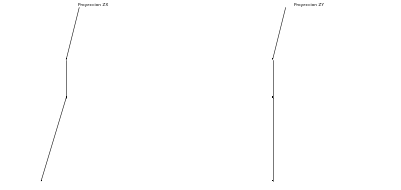


****** EVENTO 3057 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
193             3057         100        1.0        1.0     -220.0        0.0   
194             3057         100        1.0        1.0     -220.0        0.0   
195             3057         100        1.0        1.0     -220.0        0.0   
196             3057         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
193         0.0               4        1      6.3     6.05   -187.3   
194         0.0               4        2      6.3     6.05   -134.8   
195         0.0               4        3      6.3     6.05    -96.9   
196         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
193         11.401  
19

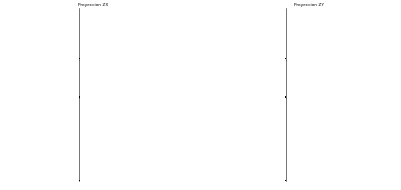


****** EVENTO 3058 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
197             3058         100        1.0        1.0     -220.0        0.0   
198             3058         100        1.0        1.0     -220.0        0.0   
199             3058         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
197         0.0               3        1      6.3     6.05   -187.3   
198         0.0               3        2     -6.3     6.05   -134.8   
199         0.0               3        4     31.5   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
197        106.858  
198        291.592  
199        104.158  


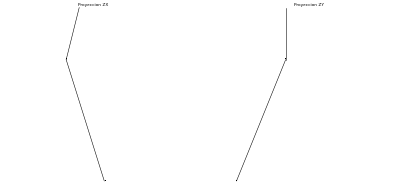


****** EVENTO 3059 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
200             3059         100        1.0        1.0     -220.0        0.0   
201             3059         100        1.0        1.0     -220.0        0.0   
202             3059         100        1.0        1.0     -220.0        0.0   
203             3059         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
200         0.0               4        1      6.3     6.05   -187.3   
201         0.0               4        2     -6.3     6.05   -134.8   
202         0.0               4        3     -6.3    -6.05    -96.9   
203         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
200        116.077  
20

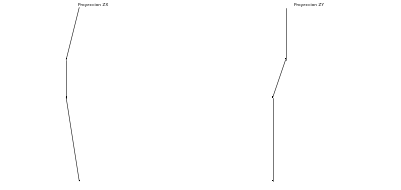


****** EVENTO 3060 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
204             3060         100        1.0        1.0     -220.0        0.0   
205             3060         100        1.0        1.0     -220.0        0.0   
206             3060         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
204         0.0               3        1      6.3     6.05   -187.3   
205         0.0               3        2      6.3     6.05   -134.8   
206         0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
204        104.668  
205        287.327  
206        430.896  


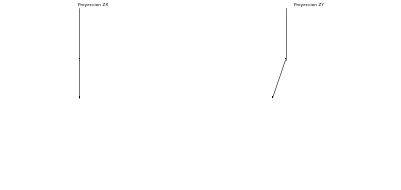


****** EVENTO 3061 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
207             3061         100        1.0        1.0     -220.0        0.0   
208             3061         100        1.0        1.0     -220.0        0.0   
209             3061         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
207         0.0               3        1      6.3     6.05   -187.3   
208         0.0               3        2     -6.3    -6.05   -134.8   
209         0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
207         11.474  
208         31.063  
209        459.939  


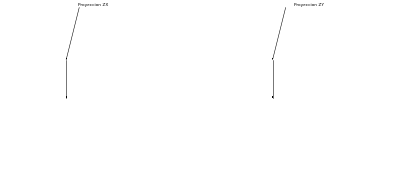


****** EVENTO 3062 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
210             3062         100        1.0        1.0     -220.0        0.0   
211             3062         100        1.0        1.0     -220.0        0.0   
212             3062         100        1.0        1.0     -220.0        0.0   
213             3062         100        1.0        1.0     -220.0        0.0   
214             3062         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
210         0.0               5        1      6.3     6.05   -187.3   
211         0.0               5        2     -6.3     6.05   -134.8   
212         0.0               5        3     -6.3     6.05    -96.9   
213         0.0               5        4     -6.3    30.2

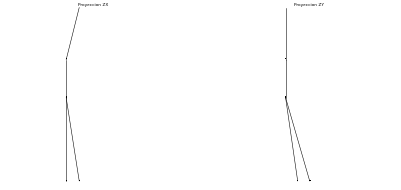


****** EVENTO 3063 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
215             3063         100        1.0        1.0     -220.0        0.0   
216             3063         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
215         0.0               2        1      6.3     6.05   -187.3   
216         0.0               2        3     18.9    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
215        115.734  
216        497.053  


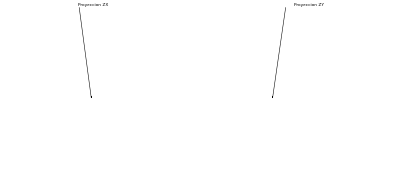


****** EVENTO 3064 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
217             3064         100        1.0        1.0     -220.0        0.0   
218             3064         100        1.0        1.0     -220.0        0.0   
219             3064         100        1.0        1.0     -220.0        0.0   
220             3064         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
217         0.0               4        1      6.3     6.05   -187.3   
218         0.0               4        2     -6.3     6.05   -134.8   
219         0.0               4        3     -6.3     6.05    -96.9   
220         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
217        111.503  
21

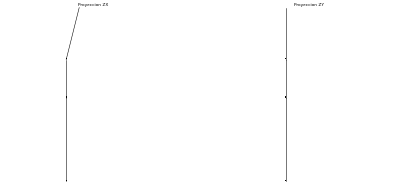


****** EVENTO 3065 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
221             3065         100        1.0        1.0     -220.0        0.0   
222             3065         100        1.0        1.0     -220.0        0.0   
223             3065         100        1.0        1.0     -220.0        0.0   
224             3065         100        1.0        1.0     -220.0        0.0   
225             3065         100        1.0        1.0     -220.0        0.0   
226             3065         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
221         0.0               6        1      6.3     6.05   -187.3   
222         0.0               6        3     -6.3    -6.05    -96.9   
223         0.0               6        4    -18.

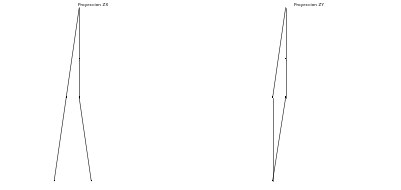


****** EVENTO 3066 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
227             3066         100        1.0        1.0     -220.0        0.0   
228             3066         100        1.0        1.0     -220.0        0.0   
229             3066         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
227         0.0               3        1      6.3     6.05   -187.3   
228         0.0               3        2      6.3    -6.05   -134.8   
229         0.0               3        3     18.9     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
227        110.244  
228         30.859  
229        551.301  


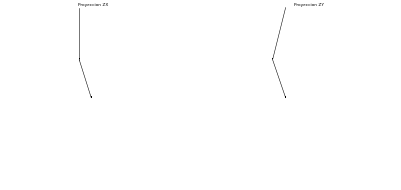


****** EVENTO 3067 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
230             3067         100        1.0        1.0     -220.0        0.0   
231             3067         100        1.0        1.0     -220.0        0.0   
232             3067         100        1.0        1.0     -220.0        0.0   
233             3067         100        1.0        1.0     -220.0        0.0   
234             3067         100        1.0        1.0     -220.0        0.0   
235             3067         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
230         0.0               6        1      6.3     6.05   -187.3   
231         0.0               6        2     -6.3    18.15   -134.8   
232         0.0               6        2     -6.

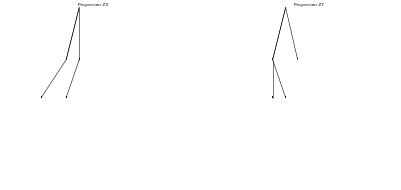


****** EVENTO 3068 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
236             3068         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
236         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
236        113.025  


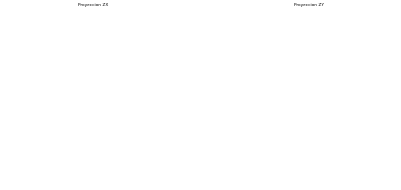


****** EVENTO 3069 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
237             3069         100        1.0        1.0     -220.0        0.0   
238             3069         100        1.0        1.0     -220.0        0.0   
239             3069         100        1.0        1.0     -220.0        0.0   
240             3069         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
237         0.0               4        1      6.3     6.05   -187.3   
238         0.0               4        2      6.3     6.05   -134.8   
239         0.0               4        3      6.3     6.05    -96.9   
240         0.0               4        4     18.9    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
237        117.302  
23

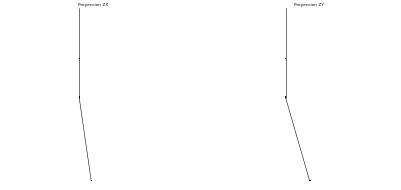


****** EVENTO 3070 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
241             3070         100        1.0        1.0     -220.0        0.0   
242             3070         100        1.0        1.0     -220.0        0.0   
243             3070         100        1.0        1.0     -220.0        0.0   
244             3070         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
241         0.0               4        1      6.3     6.05   -187.3   
242         0.0               4        2      6.3    -6.05   -134.8   
243         0.0               4        3      6.3    -6.05    -96.9   
244         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
241        109.507  
24

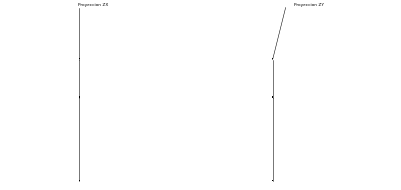


****** EVENTO 3071 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
245             3071         100        1.0        1.0     -220.0        0.0   
246             3071         100        1.0        1.0     -220.0        0.0   
247             3071         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
245         0.0               3        1      6.3     6.05   -187.3   
246         0.0               3        2      6.3     6.05   -134.8   
247         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
245         11.169  
246        301.551  
247        441.884  


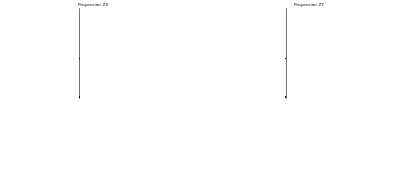


****** EVENTO 3072 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
248             3072         100        1.0        1.0     -220.0        0.0   
249             3072         100        1.0        1.0     -220.0        0.0   
250             3072         100        1.0        1.0     -220.0        0.0   
251             3072         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
248         0.0               4        1      6.3     6.05   -187.3   
249         0.0               4        3     -6.3    -6.05    -96.9   
250         0.0               4        4     31.5    18.15    -13.2   
251         0.0               4        2      6.3     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
248        113.298  
24

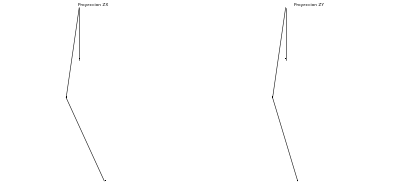


****** EVENTO 3073 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
252             3073         100        1.0        1.0     -220.0        0.0   
253             3073         100        1.0        1.0     -220.0        0.0   
254             3073         100        1.0        1.0     -220.0        0.0   
255             3073         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
252         0.0               4        1      6.3     6.05   -187.3   
253         0.0               4        2      6.3    -6.05   -134.8   
254         0.0               4        3     44.1     6.05    -96.9   
255         0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
252        112.448  
25

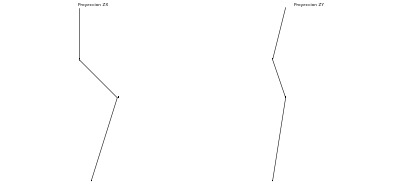


****** EVENTO 3074 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
256             3074         100        1.0        1.0     -220.0        0.0   
257             3074         100        1.0        1.0     -220.0        0.0   
258             3074         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
256         0.0               3        1      6.3     6.05   -187.3   
257         0.0               3        3      6.3    -6.05    -96.9   
258         0.0               3        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
256        121.817  
257        452.667  
258         83.322  


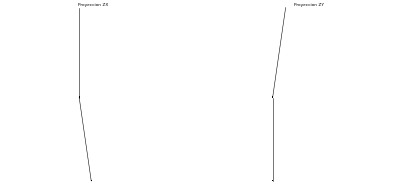


****** EVENTO 3075 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
259             3075         100        1.0        1.0     -220.0        0.0   
260             3075         100        1.0        1.0     -220.0        0.0   
261             3075         100        1.0        1.0     -220.0        0.0   
262             3075         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
259         0.0               4        1      6.3     6.05   -187.3   
260         0.0               4        2     -6.3     6.05   -134.8   
261         0.0               4        3      6.3     6.05    -96.9   
262         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
259        108.933  
26

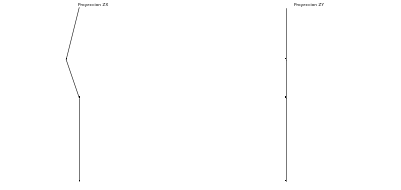


****** EVENTO 3076 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
263             3076         100        1.0        1.0     -220.0        0.0   
264             3076         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
263         0.0               2        1      6.3     6.05   -187.3   
264         0.0               2        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
263        112.225  
264        413.544  


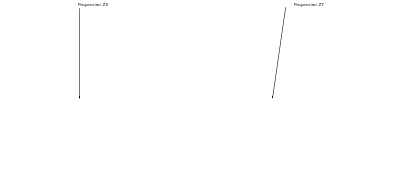


****** EVENTO 3077 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
265             3077         100        1.0        1.0     -220.0        0.0   
266             3077         100        1.0        1.0     -220.0        0.0   
267             3077         100        1.0        1.0     -220.0        0.0   
268             3077         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
265         0.0               4        1      6.3     6.05   -187.3   
266         0.0               4        2     -6.3     6.05   -134.8   
267         0.0               4        3     -6.3     6.05    -96.9   
268         0.0               4        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
265        118.942  
26

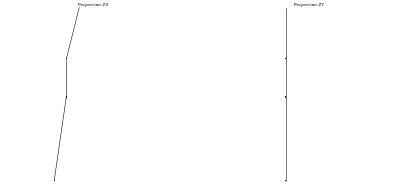


****** EVENTO 3078 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
269             3078         100        1.0        1.0     -220.0        0.0   
270             3078         100        1.0        1.0     -220.0        0.0   
271             3078         100        1.0        1.0     -220.0        0.0   
272             3078         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
269         0.0               4        1      6.3     6.05   -187.3   
270         0.0               4        2     -6.3    -6.05   -134.8   
271         0.0               4        3     -6.3    -6.05    -96.9   
272         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
269         11.443  
27

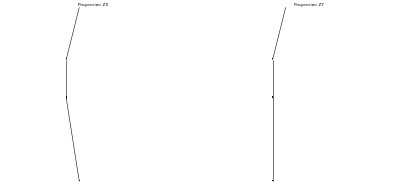


****** EVENTO 3079 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
273             3079         100        1.0        1.0     -220.0        0.0   
274             3079         100        1.0        1.0     -220.0        0.0   
275             3079         100        1.0        1.0     -220.0        0.0   
276             3079         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
273         0.0               4        1      6.3     6.05   -187.3   
274         0.0               4        2      6.3     6.05   -134.8   
275         0.0               4        3      6.3     6.05    -96.9   
276         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
273        106.378  
27

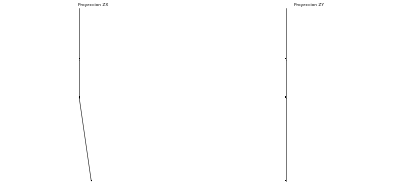


****** EVENTO 3080 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
277             3080         100        1.0        1.0     -220.0        0.0   
278             3080         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
277         0.0               2        1      6.3     6.05   -187.3   
278         0.0               2        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
277        115.229  
278        782.574  


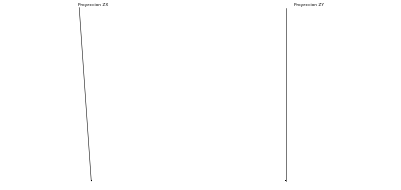


****** EVENTO 3081 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
279             3081         100        1.0        1.0     -220.0        0.0   
280             3081         100        1.0        1.0     -220.0        0.0   
281             3081         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
279         0.0               3        1      6.3     6.05   -187.3   
280         0.0               3        3     -6.3    -6.05    -96.9   
281         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
279         10.477  
280         42.059  
281        705.701  


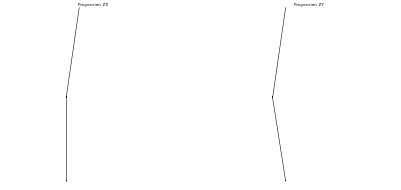


****** EVENTO 3082 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
282             3082         100        1.0        1.0     -220.0        0.0   
283             3082         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
282         0.0               2        1      6.3     6.05   -187.3   
283         0.0               2        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
282        116.602  
283        454.483  


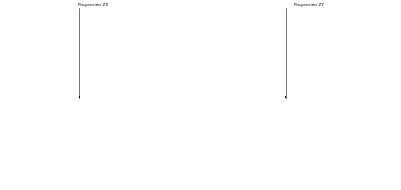


****** EVENTO 3083 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
284             3083         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
284         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
284        121.253  


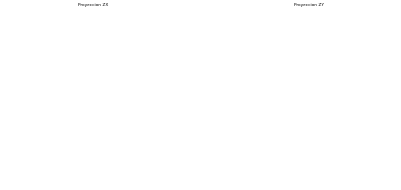


****** EVENTO 3084 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
285             3084         100        1.0        1.0     -220.0        0.0   
286             3084         100        1.0        1.0     -220.0        0.0   
287             3084         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
285         0.0               3        1      6.3     6.05   -187.3   
286         0.0               3        3     -6.3     6.05    -96.9   
287         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
285        112.814  
286        424.219  
287        739.553  


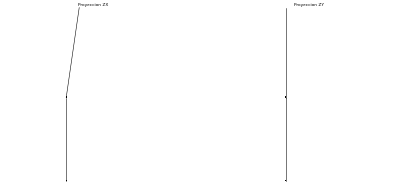


****** EVENTO 3085 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
288             3085         100        1.0        1.0     -220.0        0.0   
289             3085         100        1.0        1.0     -220.0        0.0   
290             3085         100        1.0        1.0     -220.0        0.0   
291             3085         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
288         0.0               4        1      6.3     6.05   -187.3   
289         0.0               4        2     -6.3     6.05   -134.8   
290         0.0               4        3     -6.3     6.05    -96.9   
291         0.0               4        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
288        106.898  
28

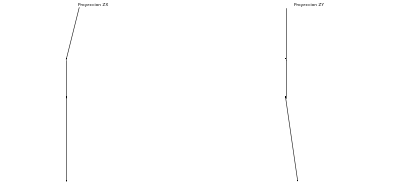


****** EVENTO 3086 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
292             3086         100        1.0        1.0     -220.0        0.0   
293             3086         100        1.0        1.0     -220.0        0.0   
294             3086         100        1.0        1.0     -220.0        0.0   
295             3086         100        1.0        1.0     -220.0        0.0   
296             3086         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
292         0.0               5        1      6.3     6.05   -187.3   
293         0.0               5        3    -44.1    -6.05    -96.9   
294         0.0               5        3     -6.3     6.05    -96.9   
295         0.0               5        4     -6.3    18.1

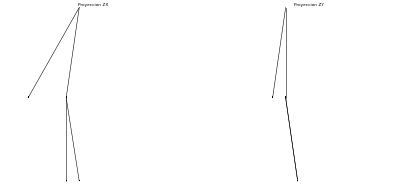


****** EVENTO 3087 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
297             3087         100        1.0        1.0     -220.0        0.0   
298             3087         100        1.0        1.0     -220.0        0.0   
299             3087         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
297         0.0               3        1      6.3     6.05   -187.3   
298         0.0               3        3     -6.3     6.05    -96.9   
299         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
297        108.189  
298        428.417  
299        750.205  


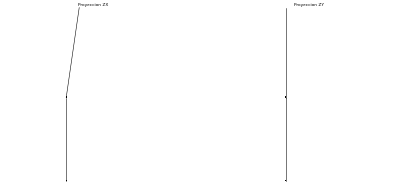


****** EVENTO 3088 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
300             3088         100        1.0        1.0     -220.0        0.0   
301             3088         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
300         0.0               2        1      6.3     6.05   -187.3   
301         0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
300        115.734  
301        697.041  


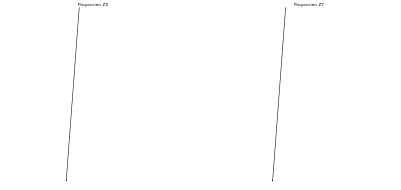


****** EVENTO 3089 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
302             3089         100        1.0        1.0     -220.0        0.0   
303             3089         100        1.0        1.0     -220.0        0.0   
304             3089         100        1.0        1.0     -220.0        0.0   
305             3089         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
302         0.0               4        1      6.3     6.05   -187.3   
303         0.0               4        2     -6.3     6.05   -134.8   
304         0.0               4        3     -6.3     6.05    -96.9   
305         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
302        117.521  
30

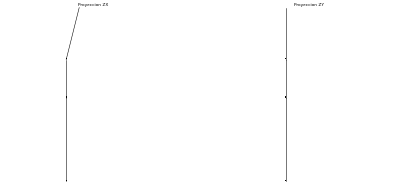


****** EVENTO 3090 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
306             3090         100        1.0        1.0     -220.0        0.0   
307             3090         100        1.0        1.0     -220.0        0.0   
308             3090         100        1.0        1.0     -220.0        0.0   
309             3090         100        1.0        1.0     -220.0        0.0   
310             3090         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
306         0.0               5        1      6.3     6.05   -187.3   
307         0.0               5        2      6.3     6.05   -134.8   
308         0.0               5        3     18.9    -6.05    -96.9   
309         0.0               5        4     31.5    -6.0

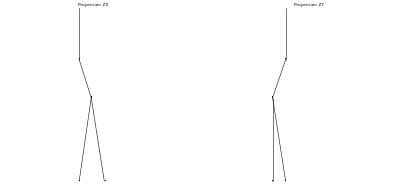


****** EVENTO 3091 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
311             3091         100        1.0        1.0     -220.0        0.0   
312             3091         100        1.0        1.0     -220.0        0.0   
313             3091         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
311         0.0               3        1      6.3     6.05   -187.3   
312         0.0               3        3     -6.3    -6.05    -96.9   
313         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
311        111.913  
312         41.996  
313        751.798  


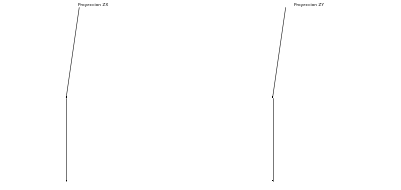


****** EVENTO 3092 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
314             3092         100        1.0        1.0     -220.0        0.0   
315             3092         100        1.0        1.0     -220.0        0.0   
316             3092         100        1.0        1.0     -220.0        0.0   
317             3092         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
314         0.0               4        1      6.3     6.05   -187.3   
315         0.0               4        2      6.3     6.05   -134.8   
316         0.0               4        4     18.9    -6.05    -13.2   
317         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
314        112.355  
31

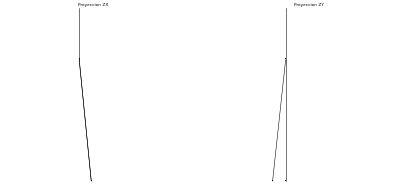


****** EVENTO 3093 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
318             3093         100        1.0        1.0     -220.0        0.0   
319             3093         100        1.0        1.0     -220.0        0.0   
320             3093         100        1.0        1.0     -220.0        0.0   
321             3093         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
318         0.0               4        1      6.3     6.05   -187.3   
319         0.0               4        2      6.3    -6.05   -134.8   
320         0.0               4        3      6.3    -6.05    -96.9   
321         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
318        113.018  
31

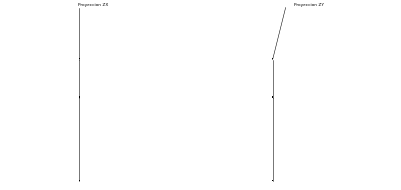


****** EVENTO 3094 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
322             3094         100        1.0        1.0     -220.0        0.0   
323             3094         100        1.0        1.0     -220.0        0.0   
324             3094         100        1.0        1.0     -220.0        0.0   
325             3094         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
322         0.0               4        1      6.3     6.05   -187.3   
323         0.0               4        2      6.3     6.05   -134.8   
324         0.0               4        3     -6.3     6.05    -96.9   
325         0.0               4        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
322        113.771  
32

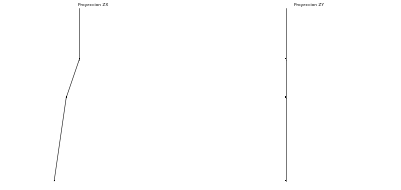


****** EVENTO 3095 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
326             3095         100        1.0        1.0     -220.0        0.0   
327             3095         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
326         0.0               2        1      6.3     6.05   -187.3   
327         0.0               2        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
326         11.453  
327         44.691  


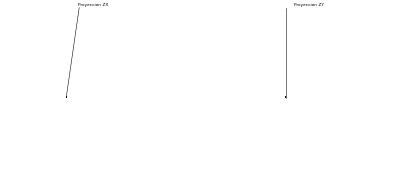


****** EVENTO 3096 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
328             3096         100        1.0        1.0     -220.0        0.0   
329             3096         100        1.0        1.0     -220.0        0.0   
330             3096         100        1.0        1.0     -220.0        0.0   
331             3096         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
328         0.0               4        1      6.3     6.05   -187.3   
329         0.0               4        2     -6.3    -6.05   -134.8   
330         0.0               4        3     -6.3    -6.05    -96.9   
331         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
328        105.386  
32

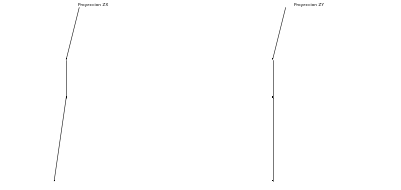


****** EVENTO 3097 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
332             3097         100        1.0        1.0     -220.0        0.0   
333             3097         100        1.0        1.0     -220.0        0.0   
334             3097         100        1.0        1.0     -220.0        0.0   
335             3097         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
332         0.0               4        1      6.3     6.05   -187.3   
333         0.0               4        2      6.3     6.05   -134.8   
334         0.0               4        3     -6.3     6.05    -96.9   
335         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
332        121.929  
33

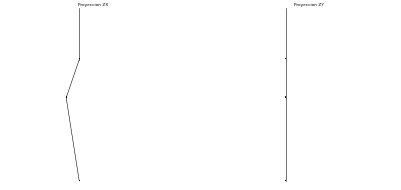


****** EVENTO 3098 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
336             3098         100        1.0        1.0     -220.0        0.0   
337             3098         100        1.0        1.0     -220.0        0.0   
338             3098         100        1.0        1.0     -220.0        0.0   
339             3098         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
336         0.0               4        1      6.3     6.05   -187.3   
337         0.0               4        2      6.3     6.05   -134.8   
338         0.0               4        3      6.3     6.05    -96.9   
339         0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
336        113.214  
33

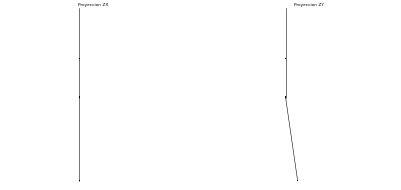


****** EVENTO 3099 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
340             3099         100        1.0        1.0     -220.0        0.0   
341             3099         100        1.0        1.0     -220.0        0.0   
342             3099         100        1.0        1.0     -220.0        0.0   
343             3099         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
340         0.0               4        1      6.3     6.05   -187.3   
341         0.0               4        2     -6.3    -6.05   -134.8   
342         0.0               4        3     -6.3    -6.05    -96.9   
343         0.0               4        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
340        112.957  
34

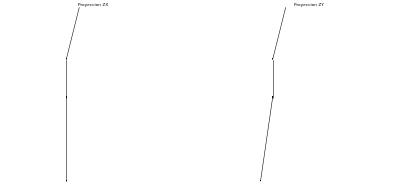


****** EVENTO 3100 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
344             3100         100        1.0        1.0     -220.0        0.0   
345             3100         100        1.0        1.0     -220.0        0.0   
346             3100         100        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
344         0.0               3        1      6.3     6.05   -187.3   
345         0.0               3        2      6.3    -6.05   -134.8   
346         0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
344        112.116  
345        296.371  
346        434.625  


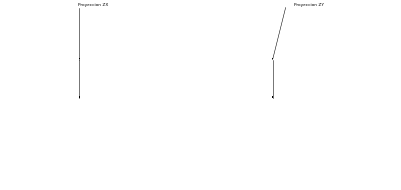


****** EVENTO 4001 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
444             4001         133        1.0        1.0     -220.0        0.0   
445             4001         133        1.0        1.0     -220.0        0.0   
446             4001         133        1.0        1.0     -220.0        0.0   
447             4001         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
444         0.0               4        1      6.3     6.05   -187.3   
445         0.0               4        2      6.3    -6.05   -134.8   
446         0.0               4        3      6.3    -6.05    -96.9   
447         0.0               4        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
444        117.108  
44

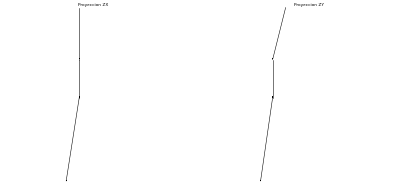


****** EVENTO 4002 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
448             4002         133        1.0        1.0     -220.0        0.0   
449             4002         133        1.0        1.0     -220.0        0.0   
450             4002         133        1.0        1.0     -220.0        0.0   
451             4002         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
448         0.0               4        1      6.3     6.05   -187.3   
449         0.0               4        2      6.3     6.05   -134.8   
450         0.0               4        3      6.3     6.05    -96.9   
451         0.0               4        4     18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
448        115.393  
44

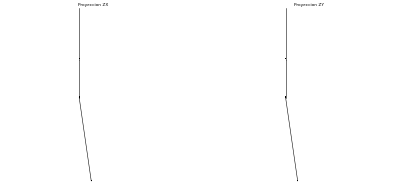


****** EVENTO 4003 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
452             4003         133        1.0        1.0     -220.0        0.0   
453             4003         133        1.0        1.0     -220.0        0.0   
454             4003         133        1.0        1.0     -220.0        0.0   
455             4003         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
452         0.0               4        1      6.3     6.05   -187.3   
453         0.0               4        2      6.3     6.05   -134.8   
454         0.0               4        3      6.3     6.05    -96.9   
455         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
452        115.211  
45

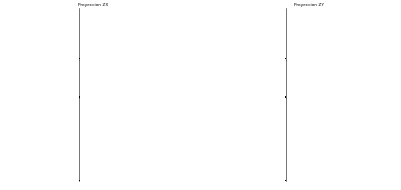


****** EVENTO 4004 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
456             4004         133        1.0        1.0     -220.0        0.0   
457             4004         133        1.0        1.0     -220.0        0.0   
458             4004         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
456         0.0               3        1      6.3     6.05   -187.3   
457         0.0               3        3      6.3     6.05    -96.9   
458         0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
456        114.445  
457        450.663  
458        456.509  


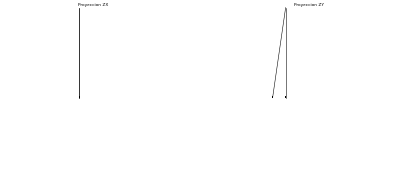


****** EVENTO 4005 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
459             4005         133        1.0        1.0     -220.0        0.0   
460             4005         133        1.0        1.0     -220.0        0.0   
461             4005         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
459         0.0               3        1      6.3     6.05   -187.3   
460         0.0               3        3     -6.3    -6.05    -96.9   
461         0.0               3        4    -18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
459        108.793  
460        442.586  
461        827.845  


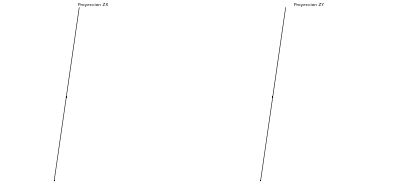


****** EVENTO 4006 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
462             4006         133        1.0        1.0     -220.0        0.0   
463             4006         133        1.0        1.0     -220.0        0.0   
464             4006         133        1.0        1.0     -220.0        0.0   
465             4006         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
462         0.0               4        1      6.3     6.05   -187.3   
463         0.0               4        2      6.3     6.05   -134.8   
464         0.0               4        3      6.3     6.05    -96.9   
465         0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
462        113.429  
46

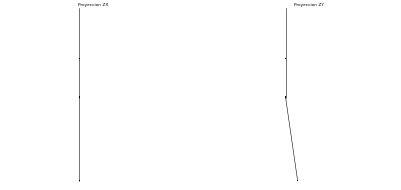


****** EVENTO 4007 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
466             4007         133        1.0        1.0     -220.0        0.0   
467             4007         133        1.0        1.0     -220.0        0.0   
468             4007         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
466         0.0               3        1      6.3     6.05   -187.3   
467         0.0               3        3     -6.3     6.05    -96.9   
468         0.0               3        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
466        111.318  
467         41.825  
468        779.938  


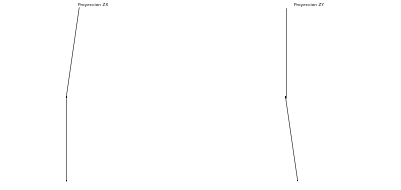


****** EVENTO 4008 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
469             4008         133        1.0        1.0     -220.0        0.0   
470             4008         133        1.0        1.0     -220.0        0.0   
471             4008         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
469         0.0               3        1      6.3     6.05   -187.3   
470         0.0               3        3     -6.3     6.05    -96.9   
471         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
469        112.316  
470        421.199  
471        752.349  


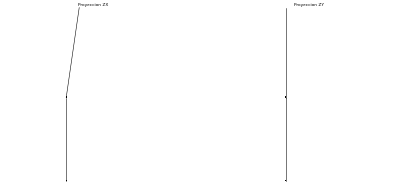


****** EVENTO 4009 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
472             4009         133        1.0        1.0     -220.0        0.0   
473             4009         133        1.0        1.0     -220.0        0.0   
474             4009         133        1.0        1.0     -220.0        0.0   
475             4009         133        1.0        1.0     -220.0        0.0   
476             4009         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
472         0.0               5        1      6.3     6.05   -187.3   
473         0.0               5        2     -6.3    -6.05   -134.8   
474         0.0               5        3     -6.3    -6.05    -96.9   
475         0.0               5        4      6.3   -18.1

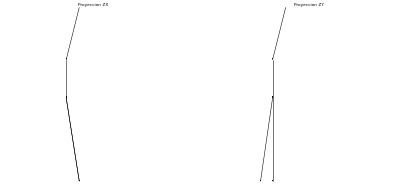


****** EVENTO 4010 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
477             4010         133        1.0        1.0     -220.0        0.0   
478             4010         133        1.0        1.0     -220.0        0.0   
479             4010         133        1.0        1.0     -220.0        0.0   
480             4010         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
477         0.0               4        1      6.3     6.05   -187.3   
478         0.0               4        2      6.3    -6.05   -134.8   
479         0.0               4        3     -6.3    -6.05    -96.9   
480         0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
477        114.355  
47

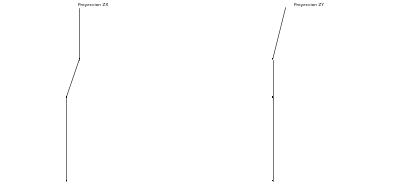


****** EVENTO 4011 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
481             4011         133        1.0        1.0     -220.0        0.0   
482             4011         133        1.0        1.0     -220.0        0.0   
483             4011         133        1.0        1.0     -220.0        0.0   
484             4011         133        1.0        1.0     -220.0        0.0   
485             4011         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
481         0.0               5        1      6.3     6.05   -187.3   
482         0.0               5        2     -6.3    -6.05   -134.8   
483         0.0               5        3     -6.3    -6.05    -96.9   
484         0.0               5        4    -18.9    -6.0

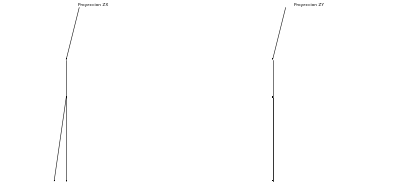


****** EVENTO 4012 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
486             4012         133        1.0        1.0     -220.0        0.0   
487             4012         133        1.0        1.0     -220.0        0.0   
488             4012         133        1.0        1.0     -220.0        0.0   
489             4012         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
486         0.0               4        1      6.3     6.05   -187.3   
487         0.0               4        2      6.3    -6.05   -134.8   
488         0.0               4        3      6.3    -6.05    -96.9   
489         0.0               4        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
486        119.544  
48

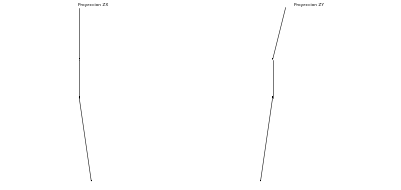


****** EVENTO 4013 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
490             4013         133        1.0        1.0     -220.0        0.0   
491             4013         133        1.0        1.0     -220.0        0.0   
492             4013         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
490         0.0               3        1      6.3     6.05   -187.3   
491         0.0               3        3     -6.3    -6.05    -96.9   
492         0.0               3        4     18.9    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
490        113.648  
491        440.142  
492        895.521  


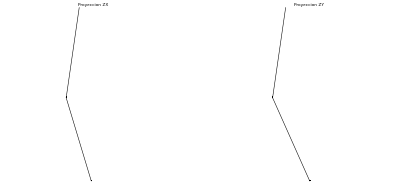


****** EVENTO 4014 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
493             4014         133        1.0        1.0     -220.0        0.0   
494             4014         133        1.0        1.0     -220.0        0.0   
495             4014         133        1.0        1.0     -220.0        0.0   
496             4014         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
493         0.0               4        1      6.3     6.05   -187.3   
494         0.0               4        2     -6.3     6.05   -134.8   
495         0.0               4        3     -6.3     6.05    -96.9   
496         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
493        113.691  
49

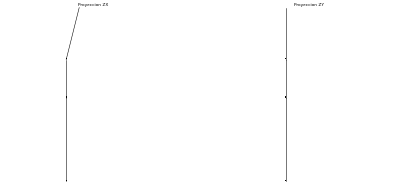


****** EVENTO 4015 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
497             4015         133        1.0        1.0     -220.0        0.0   
498             4015         133        1.0        1.0     -220.0        0.0   
499             4015         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
497         0.0               3        1      6.3     6.05   -187.3   
498         0.0               3        2     -6.3     6.05   -134.8   
499         0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
497        107.909  
498        297.426  
499        438.708  


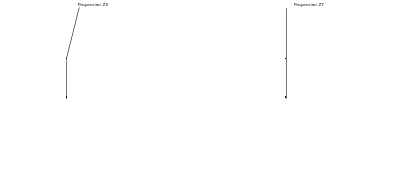


****** EVENTO 4016 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
500             4016         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
500         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
500        117.185  


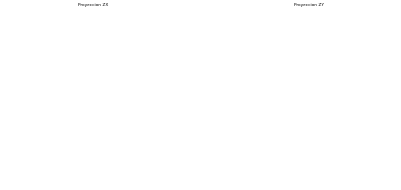


****** EVENTO 4017 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
501             4017         133        1.0        1.0     -220.0        0.0   
502             4017         133        1.0        1.0     -220.0        0.0   
503             4017         133        1.0        1.0     -220.0        0.0   
504             4017         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
501         0.0               4        1      6.3     6.05   -187.3   
502         0.0               4        2      6.3     6.05   -134.8   
503         0.0               4        3      6.3    -6.05    -96.9   
504         0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
501        109.708  
50

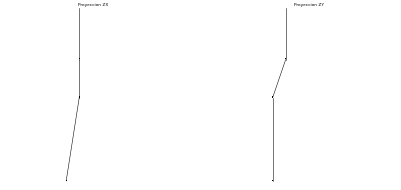


****** EVENTO 4018 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
505             4018         133        1.0        1.0     -220.0        0.0   
506             4018         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
505         0.0               2        1      6.3     6.05   -187.3   
506         0.0               2        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
505        111.687  
506        771.869  


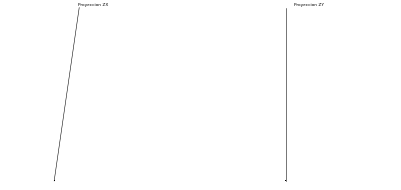


****** EVENTO 4019 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
507             4019         133        1.0        1.0     -220.0        0.0   
508             4019         133        1.0        1.0     -220.0        0.0   
509             4019         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
507         0.0               3        1      6.3     6.05   -187.3   
508         0.0               3        2      6.3     6.05   -134.8   
509         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
507        113.925  
508        301.168  
509        444.331  


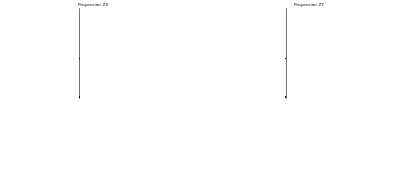


****** EVENTO 4020 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
510             4020         133        1.0        1.0     -220.0        0.0   
511             4020         133        1.0        1.0     -220.0        0.0   
512             4020         133        1.0        1.0     -220.0        0.0   
513             4020         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
510         0.0               4        1      6.3     6.05   -187.3   
511         0.0               4        2      6.3    -6.05   -134.8   
512         0.0               4        3      6.3     6.05    -96.9   
513         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
510        112.777  
51

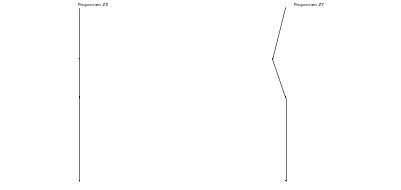


****** EVENTO 4021 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
514             4021         133        1.0        1.0     -220.0        0.0   
515             4021         133        1.0        1.0     -220.0        0.0   
516             4021         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
514         0.0               3        1      6.3     6.05   -187.3   
515         0.0               3        2      6.3     6.05   -134.8   
516         0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
514        106.844  
515        292.502  
516        701.777  


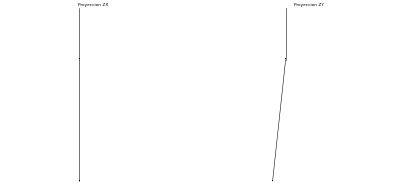


****** EVENTO 4022 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
517             4022         133        1.0        1.0     -220.0        0.0   
518             4022         133        1.0        1.0     -220.0        0.0   
519             4022         133        1.0        1.0     -220.0        0.0   
520             4022         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
517         0.0               4        1      6.3     6.05   -187.3   
518         0.0               4        2      6.3     6.05   -134.8   
519         0.0               4        3      6.3     6.05    -96.9   
520         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
517        111.535  
51

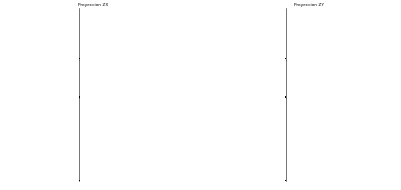


****** EVENTO 4023 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
521             4023         133        1.0        1.0     -220.0        0.0   
522             4023         133        1.0        1.0     -220.0        0.0   
523             4023         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
521         0.0               3        1      6.3     6.05   -187.3   
522         0.0               3        2      6.3     6.05   -134.8   
523         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
521        112.079  
522        292.973  
523        756.704  


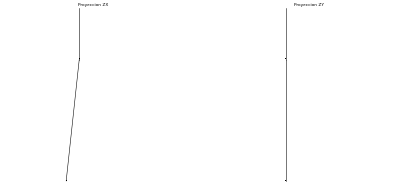


****** EVENTO 4024 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
524             4024         133        1.0        1.0     -220.0        0.0   
525             4024         133        1.0        1.0     -220.0        0.0   
526             4024         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
524         0.0               3        1      6.3     6.05   -187.3   
525         0.0               3        2     -6.3    -6.05   -134.8   
526         0.0               3        3    -18.9     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
524        107.338  
525        303.644  
526        490.319  


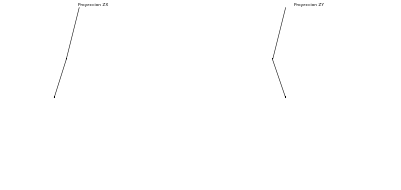


****** EVENTO 4025 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
527             4025         133        1.0        1.0     -220.0        0.0   
528             4025         133        1.0        1.0     -220.0        0.0   
529             4025         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
527         0.0               3        1      6.3     6.05   -187.3   
528         0.0               3        3     -6.3     6.05    -96.9   
529         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
527        109.885  
528        421.555  
529        724.474  


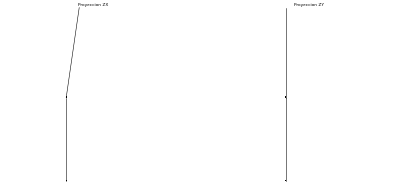


****** EVENTO 4026 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
530             4026         133        1.0        1.0     -220.0        0.0   
531             4026         133        1.0        1.0     -220.0        0.0   
532             4026         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
530         0.0               3        1      6.3     6.05   -187.3   
531         0.0               3        2      6.3     6.05   -134.8   
532         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
530        108.459  
531         30.093  
532        429.374  


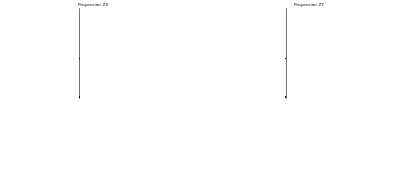


****** EVENTO 4027 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
533             4027         133        1.0        1.0     -220.0        0.0   
534             4027         133        1.0        1.0     -220.0        0.0   
535             4027         133        1.0        1.0     -220.0        0.0   
536             4027         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
533         0.0               4        1      6.3     6.05   -187.3   
534         0.0               4        2     -6.3    -6.05   -134.8   
535         0.0               4        3     -6.3    -6.05    -96.9   
536         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
533        107.891  
53

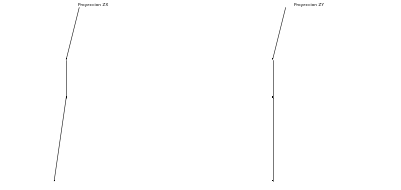


****** EVENTO 4028 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
537             4028         133        1.0        1.0     -220.0        0.0   
538             4028         133        1.0        1.0     -220.0        0.0   
539             4028         133        1.0        1.0     -220.0        0.0   
540             4028         133        1.0        1.0     -220.0        0.0   
541             4028         133        1.0        1.0     -220.0        0.0   
542             4028         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
537         0.0               6        1      6.3     6.05   -187.3   
538         0.0               6        3      6.3     6.05    -96.9   
539         0.0               6        4     18.

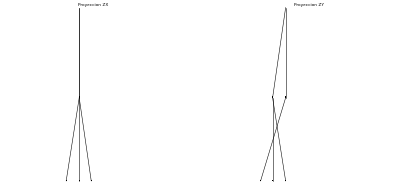


****** EVENTO 4029 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
543             4029         133        1.0        1.0     -220.0        0.0   
544             4029         133        1.0        1.0     -220.0        0.0   
545             4029         133        1.0        1.0     -220.0        0.0   
546             4029         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
543         0.0               4        1      6.3     6.05   -187.3   
544         0.0               4        2     -6.3    -6.05   -134.8   
545         0.0               4        3     -6.3    -6.05    -96.9   
546         0.0               4        4    -18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
543        106.115  
54

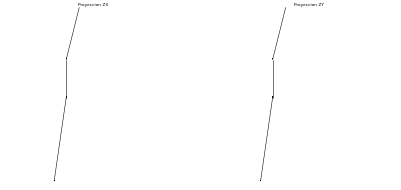


****** EVENTO 4030 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
547             4030         133        1.0        1.0     -220.0        0.0   
548             4030         133        1.0        1.0     -220.0        0.0   
549             4030         133        1.0        1.0     -220.0        0.0   
550             4030         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
547         0.0               4        1      6.3     6.05   -187.3   
548         0.0               4        2      6.3     6.05   -134.8   
549         0.0               4        3      6.3     6.05    -96.9   
550         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
547         10.818  
54

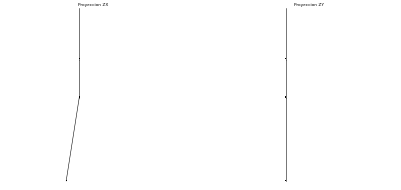


****** EVENTO 4031 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
551             4031         133        1.0        1.0     -220.0        0.0   
552             4031         133        1.0        1.0     -220.0        0.0   
553             4031         133        1.0        1.0     -220.0        0.0   
554             4031         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
551         0.0               4        1      6.3     6.05   -187.3   
552         0.0               4        2     -6.3     6.05   -134.8   
553         0.0               4        3     -6.3     6.05    -96.9   
554         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
551        114.644  
55

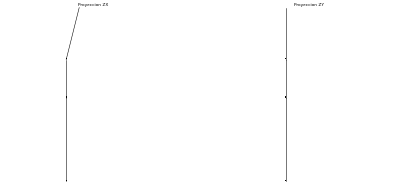


****** EVENTO 4032 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
555             4032         133        1.0        1.0     -220.0        0.0   
556             4032         133        1.0        1.0     -220.0        0.0   
557             4032         133        1.0        1.0     -220.0        0.0   
558             4032         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
555         0.0               4        1      6.3     6.05   -187.3   
556         0.0               4        2     -6.3     6.05   -134.8   
557         0.0               4        3     -6.3     6.05    -96.9   
558         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
555        109.604  
55

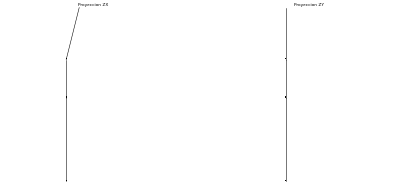


****** EVENTO 4033 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
559             4033         133        1.0        1.0     -220.0        0.0   
560             4033         133        1.0        1.0     -220.0        0.0   
561             4033         133        1.0        1.0     -220.0        0.0   
562             4033         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
559         0.0               4        1      6.3     6.05   -187.3   
560         0.0               4        2      6.3     6.05   -134.8   
561         0.0               4        3      6.3     6.05    -96.9   
562         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
559         10.616  
56

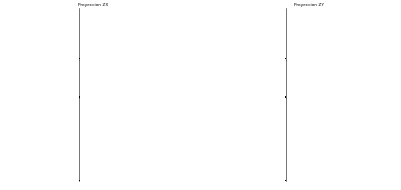


****** EVENTO 4034 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
563             4034         133        1.0        1.0     -220.0        0.0   
564             4034         133        1.0        1.0     -220.0        0.0   
565             4034         133        1.0        1.0     -220.0        0.0   
566             4034         133        1.0        1.0     -220.0        0.0   
567             4034         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
563         0.0               5        1      6.3     6.05   -187.3   
564         0.0               5        2     -6.3     6.05   -134.8   
565         0.0               5        3     -6.3     6.05    -96.9   
566         0.0               5        4    -31.5     6.0

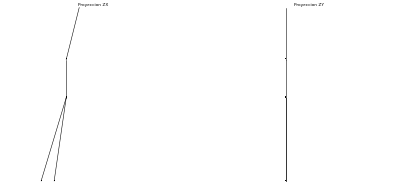


****** EVENTO 4035 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
568             4035         133        1.0        1.0     -220.0        0.0   
569             4035         133        1.0        1.0     -220.0        0.0   
570             4035         133        1.0        1.0     -220.0        0.0   
571             4035         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
568         0.0               4        1      6.3     6.05   -187.3   
569         0.0               4        2      6.3     6.05   -134.8   
570         0.0               4        3      6.3     6.05    -96.9   
571         0.0               4        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
568        122.598  
56

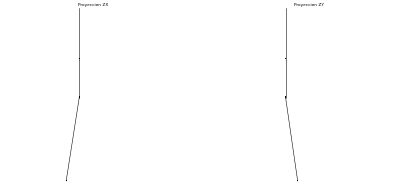


****** EVENTO 4036 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
572             4036         133        1.0        1.0     -220.0        0.0   
573             4036         133        1.0        1.0     -220.0        0.0   
574             4036         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
572         0.0               3        1      6.3     6.05   -187.3   
573         0.0               3        3      6.3    -6.05    -96.9   
574         0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
572        108.961  
573        424.529  
574        734.736  


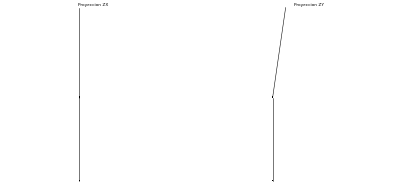


****** EVENTO 4037 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
575             4037         133        1.0        1.0     -220.0        0.0   
576             4037         133        1.0        1.0     -220.0        0.0   
577             4037         133        1.0        1.0     -220.0        0.0   
578             4037         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
575         0.0               4        1      6.3     6.05   -187.3   
576         0.0               4        2      6.3     6.05   -134.8   
577         0.0               4        3     -6.3     6.05    -96.9   
578         0.0               4        4    -18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
575        116.994  
57

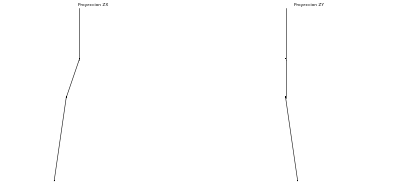


****** EVENTO 4038 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
579             4038         133        1.0        1.0     -220.0        0.0   
580             4038         133        1.0        1.0     -220.0        0.0   
581             4038         133        1.0        1.0     -220.0        0.0   
582             4038         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
579         0.0               4        1      6.3     6.05   -187.3   
580         0.0               4        2     -6.3     6.05   -134.8   
581         0.0               4        3     -6.3     6.05    -96.9   
582         0.0               4        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
579        118.627  
58

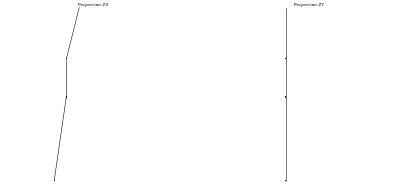


****** EVENTO 4039 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
583             4039         133        1.0        1.0     -220.0        0.0   
584             4039         133        1.0        1.0     -220.0        0.0   
585             4039         133        1.0        1.0     -220.0        0.0   
586             4039         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
583         0.0               4        1      6.3     6.05   -187.3   
584         0.0               4        2      6.3     6.05   -134.8   
585         0.0               4        3      6.3     6.05    -96.9   
586         0.0               4        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
583        102.296  
58

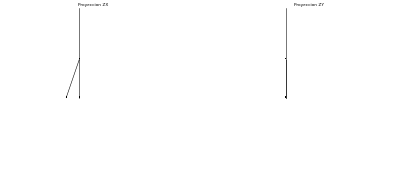


****** EVENTO 4040 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
587             4040         133        1.0        1.0     -220.0        0.0   
588             4040         133        1.0        1.0     -220.0        0.0   
589             4040         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
587         0.0               3        1      6.3     6.05   -187.3   
588         0.0               3        2      6.3     6.05   -134.8   
589         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
587        114.732  
588        292.786  
589         73.609  


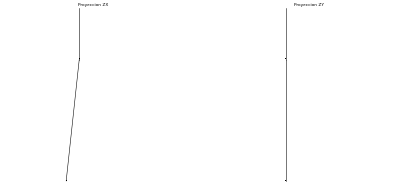


****** EVENTO 4041 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
590             4041         133        1.0        1.0     -220.0        0.0   
591             4041         133        1.0        1.0     -220.0        0.0   
592             4041         133        1.0        1.0     -220.0        0.0   
593             4041         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
590         0.0               4        1      6.3     6.05   -187.3   
591         0.0               4        2      6.3    -6.05   -134.8   
592         0.0               4        3      6.3     6.05    -96.9   
593         0.0               4        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
590        110.093  
59

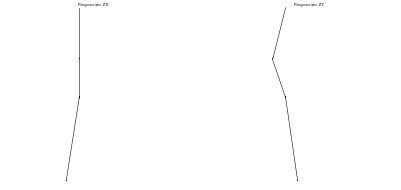


****** EVENTO 4042 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
594             4042         133        1.0        1.0     -220.0        0.0   
595             4042         133        1.0        1.0     -220.0        0.0   
596             4042         133        1.0        1.0     -220.0        0.0   
597             4042         133        1.0        1.0     -220.0        0.0   
598             4042         133        1.0        1.0     -220.0        0.0   
599             4042         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
594         0.0               6        1      6.3     6.05   -187.3   
595         0.0               6        2      6.3    -6.05   -134.8   
596         0.0               6        4      6.

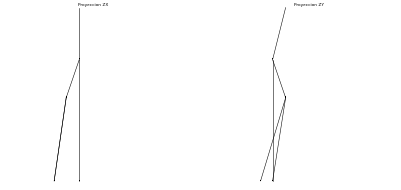


****** EVENTO 4043 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
600             4043         133        1.0        1.0     -220.0        0.0   
601             4043         133        1.0        1.0     -220.0        0.0   
602             4043         133        1.0        1.0     -220.0        0.0   
603             4043         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
600         0.0               4        1      6.3     6.05   -187.3   
601         0.0               4        2      6.3     6.05   -134.8   
602         0.0               4        3      6.3     6.05    -96.9   
603         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
600        114.247  
60

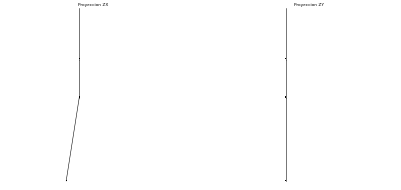


****** EVENTO 4044 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
604             4044         133        1.0        1.0     -220.0        0.0   
605             4044         133        1.0        1.0     -220.0        0.0   
606             4044         133        1.0        1.0     -220.0        0.0   
607             4044         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
604         0.0               4        1      6.3     6.05   -187.3   
605         0.0               4        2      6.3     6.05   -134.8   
606         0.0               4        3      6.3     6.05    -96.9   
607         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
604        115.067  
60

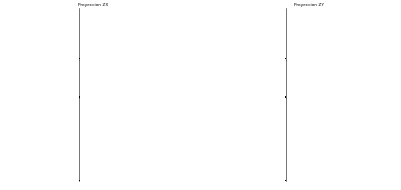


****** EVENTO 4045 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
608             4045         133        1.0        1.0     -220.0        0.0   
609             4045         133        1.0        1.0     -220.0        0.0   
610             4045         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
608         0.0               3        1      6.3     6.05   -187.3   
609         0.0               3        3      6.3     6.05    -96.9   
610         0.0               3        4     31.5     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
608        111.137  
609        448.441  
610        885.318  


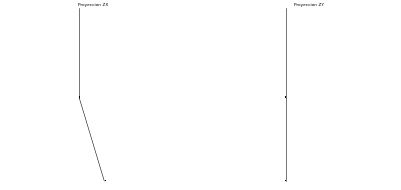


****** EVENTO 4046 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
611             4046         133        1.0        1.0     -220.0        0.0   
612             4046         133        1.0        1.0     -220.0        0.0   
613             4046         133        1.0        1.0     -220.0        0.0   
614             4046         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
611         0.0               4        1      6.3     6.05   -187.3   
612         0.0               4        2      6.3     6.05   -134.8   
613         0.0               4        3      6.3     6.05    -96.9   
614         0.0               4        4     18.9    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
611        107.098  
61

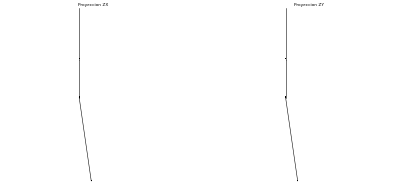


****** EVENTO 4047 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
615             4047         133        1.0        1.0     -220.0        0.0   
616             4047         133        1.0        1.0     -220.0        0.0   
617             4047         133        1.0        1.0     -220.0        0.0   
618             4047         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
615         0.0               4        1      6.3     6.05   -187.3   
616         0.0               4        2     -6.3    -6.05   -134.8   
617         0.0               4        3     -6.3    -6.05    -96.9   
618         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
615        115.924  
61

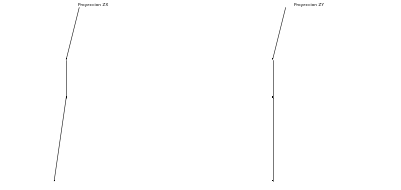


****** EVENTO 4048 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
619             4048         133        1.0        1.0     -220.0        0.0   
620             4048         133        1.0        1.0     -220.0        0.0   
621             4048         133        1.0        1.0     -220.0        0.0   
622             4048         133        1.0        1.0     -220.0        0.0   
623             4048         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
619         0.0               5        1      6.3     6.05   -187.3   
620         0.0               5        2      6.3     6.05   -134.8   
621         0.0               5        3      6.3     6.05    -96.9   
622         0.0               5        4     31.5     6.0

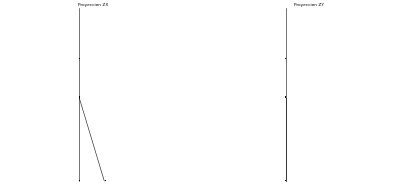


****** EVENTO 4049 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
624             4049         133        1.0        1.0     -220.0        0.0   
625             4049         133        1.0        1.0     -220.0        0.0   
626             4049         133        1.0        1.0     -220.0        0.0   
627             4049         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
624         0.0               4        1      6.3     6.05   -187.3   
625         0.0               4        2      6.3     6.05   -134.8   
626         0.0               4        3      6.3    -6.05    -96.9   
627         0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
624        118.345  
62

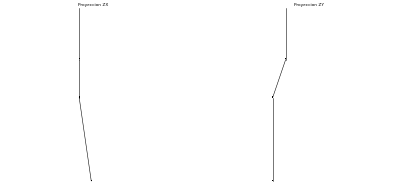


****** EVENTO 4050 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
628             4050         133        1.0        1.0     -220.0        0.0   
629             4050         133        1.0        1.0     -220.0        0.0   
630             4050         133        1.0        1.0     -220.0        0.0   
631             4050         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
628         0.0               4        1      6.3     6.05   -187.3   
629         0.0               4        2     -6.3    -6.05   -134.8   
630         0.0               4        3     -6.3    -6.05    -96.9   
631         0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
628        111.037  
62

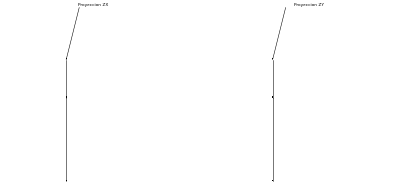


****** EVENTO 4051 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
632             4051         133        1.0        1.0     -220.0        0.0   
633             4051         133        1.0        1.0     -220.0        0.0   
634             4051         133        1.0        1.0     -220.0        0.0   
635             4051         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
632         0.0               4        1      6.3     6.05   -187.3   
633         0.0               4        2      6.3     6.05   -134.8   
634         0.0               4        3      6.3     6.05    -96.9   
635         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
632        112.636  
63

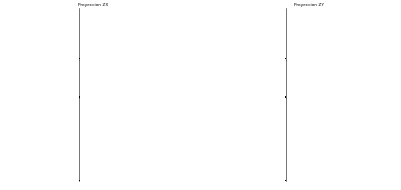


****** EVENTO 4052 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
636             4052         133        1.0        1.0     -220.0        0.0   
637             4052         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
636         0.0               2        1      6.3     6.05   -187.3   
637         0.0               2        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
636        111.407  
637        425.692  


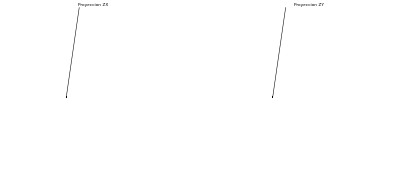


****** EVENTO 4053 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
638             4053         133        1.0        1.0     -220.0        0.0   
639             4053         133        1.0        1.0     -220.0        0.0   
640             4053         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
638         0.0               3        1      6.3     6.05   -187.3   
639         0.0               3        3      6.3     6.05    -96.9   
640         0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
638        116.411  
639        426.506  
640        700.991  


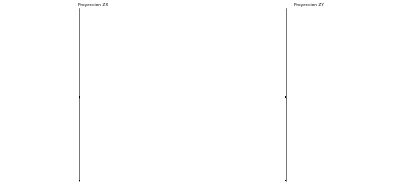


****** EVENTO 4054 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
641             4054         133        1.0        1.0     -220.0        0.0   
642             4054         133        1.0        1.0     -220.0        0.0   
643             4054         133        1.0        1.0     -220.0        0.0   
644             4054         133        1.0        1.0     -220.0        0.0   
645             4054         133        1.0        1.0     -220.0        0.0   
646             4054         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
641         0.0               6        1      6.3     6.05   -187.3   
642         0.0               6        3     -6.3    -6.05    -96.9   
643         0.0               6        4    -18.

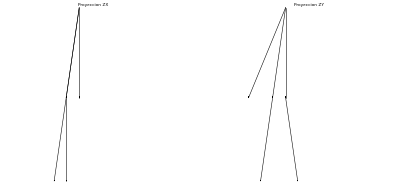


****** EVENTO 4055 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
647             4055         133        1.0        1.0     -220.0        0.0   
648             4055         133        1.0        1.0     -220.0        0.0   
649             4055         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
647         0.0               3        1      6.3     6.05   -187.3   
648         0.0               3        3      6.3    -6.05    -96.9   
649         0.0               3        4     18.9   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
647        117.089  
648        430.878  
649        872.611  


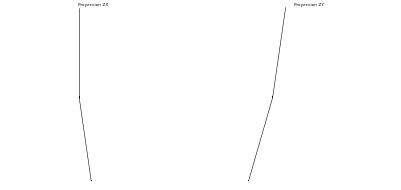


****** EVENTO 4056 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
650             4056         133        1.0        1.0     -220.0        0.0   
651             4056         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
650         0.0               2        1      6.3     6.05   -187.3   
651         0.0               2        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
650        110.626  
651        710.092  


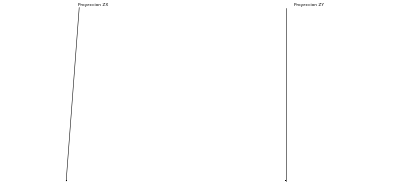


****** EVENTO 4057 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
652             4057         133        1.0        1.0     -220.0        0.0   
653             4057         133        1.0        1.0     -220.0        0.0   
654             4057         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
652         0.0               3        1      6.3     6.05   -187.3   
653         0.0               3        3     -6.3     6.05    -96.9   
654         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
652        108.875  
653        428.868  
654        740.741  


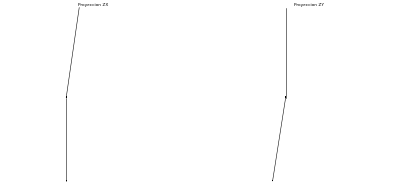


****** EVENTO 4058 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
655             4058         133        1.0        1.0     -220.0        0.0   
656             4058         133        1.0        1.0     -220.0        0.0   
657             4058         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
655         0.0               3        1      6.3     6.05   -187.3   
656         0.0               3        3      6.3     6.05    -96.9   
657         0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
655        113.108  
656        441.489  
657        755.869  


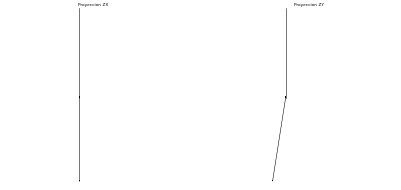


****** EVENTO 4059 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
658             4059         133        1.0        1.0     -220.0        0.0   
659             4059         133        1.0        1.0     -220.0        0.0   
660             4059         133        1.0        1.0     -220.0        0.0   
661             4059         133        1.0        1.0     -220.0        0.0   
662             4059         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
658         0.0               5        1      6.3     6.05   -187.3   
659         0.0               5        2      6.3     6.05   -134.8   
660         0.0               5        3      6.3     6.05    -96.9   
661         0.0               5        4      6.3     6.0

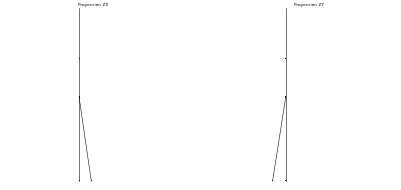


****** EVENTO 4060 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
663             4060         133        1.0        1.0     -220.0        0.0   
664             4060         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
663         0.0               2        1      6.3     6.05   -187.3   
664         0.0               2        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
663        111.239  
664        456.699  


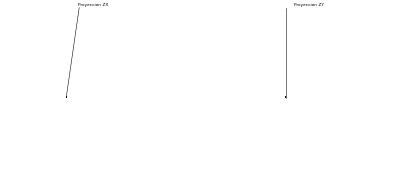


****** EVENTO 4061 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
665             4061         133        1.0        1.0     -220.0        0.0   
666             4061         133        1.0        1.0     -220.0        0.0   
667             4061         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
665         0.0               3        1      6.3     6.05   -187.3   
666         0.0               3        2      6.3    -6.05   -134.8   
667         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
665        119.258  
666          2.920  
667        717.488  


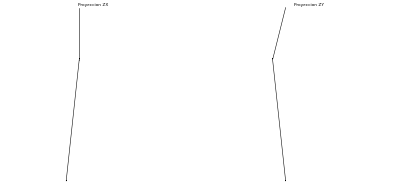


****** EVENTO 4062 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
668             4062         133        1.0        1.0     -220.0        0.0   
669             4062         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
668         0.0               2        1      6.3     6.05   -187.3   
669         0.0               2        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
668        115.362  
669        712.287  


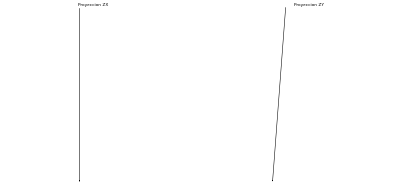


****** EVENTO 4063 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
670             4063         133        1.0        1.0     -220.0        0.0   
671             4063         133        1.0        1.0     -220.0        0.0   
672             4063         133        1.0        1.0     -220.0        0.0   
673             4063         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
670         0.0               4        1      6.3     6.05   -187.3   
671         0.0               4        2      6.3     6.05   -134.8   
672         0.0               4        3      6.3     6.05    -96.9   
673         0.0               4        4     -6.3   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
670        108.322  
67

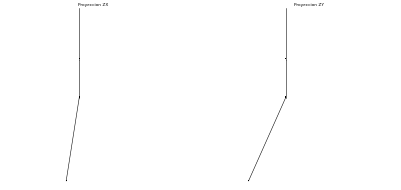


****** EVENTO 4064 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
674             4064         133        1.0        1.0     -220.0        0.0   
675             4064         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
674         0.0               2        1      6.3     6.05   -187.3   
675         0.0               2        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
674         11.425  
675        779.963  


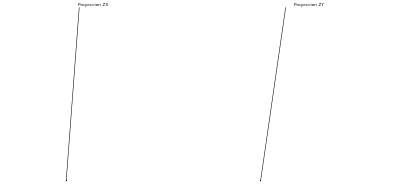


****** EVENTO 4065 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
676             4065         133        1.0        1.0     -220.0        0.0   
677             4065         133        1.0        1.0     -220.0        0.0   
678             4065         133        1.0        1.0     -220.0        0.0   
679             4065         133        1.0        1.0     -220.0        0.0   
680             4065         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
676         0.0               5        1      6.3     6.05   -187.3   
677         0.0               5        2     -6.3    -6.05   -134.8   
678         0.0               5        3     -6.3     6.05    -96.9   
679         0.0               5        4    -18.9     6.0

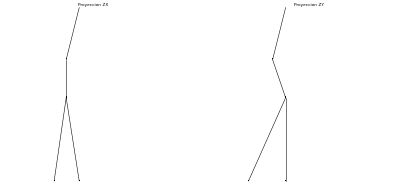


****** EVENTO 4066 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
681             4066         133        1.0        1.0     -220.0        0.0   
682             4066         133        1.0        1.0     -220.0        0.0   
683             4066         133        1.0        1.0     -220.0        0.0   
684             4066         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
681         0.0               4        1      6.3     6.05   -187.3   
682         0.0               4        2      6.3     6.05   -134.8   
683         0.0               4        3      6.3     6.05    -96.9   
684         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
681        119.922  
68

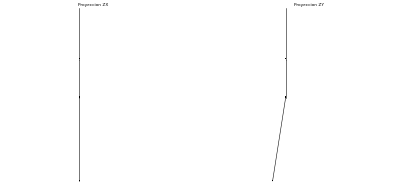


****** EVENTO 4067 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
685             4067         133        1.0        1.0     -220.0        0.0   
686             4067         133        1.0        1.0     -220.0        0.0   
687             4067         133        1.0        1.0     -220.0        0.0   
688             4067         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
685         0.0               4        1      6.3     6.05   -187.3   
686         0.0               4        2     -6.3     6.05   -134.8   
687         0.0               4        3     -6.3     6.05    -96.9   
688         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
685        115.736  
68

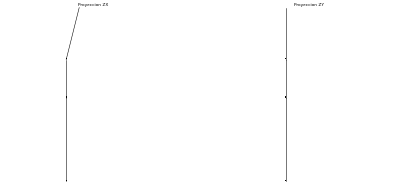


****** EVENTO 4068 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
689             4068         133        1.0        1.0     -220.0        0.0   
690             4068         133        1.0        1.0     -220.0        0.0   
691             4068         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
689         0.0               3        1      6.3     6.05   -187.3   
690         0.0               3        2      6.3     6.05   -134.8   
691         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
689         11.012  
690        294.795  
691        435.511  


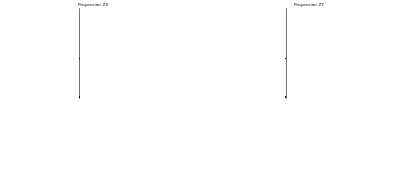


****** EVENTO 4069 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
692             4069         133        1.0        1.0     -220.0        0.0   
693             4069         133        1.0        1.0     -220.0        0.0   
694             4069         133        1.0        1.0     -220.0        0.0   
695             4069         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
692         0.0               4        1      6.3     6.05   -187.3   
693         0.0               4        2      6.3     6.05   -134.8   
694         0.0               4        3      6.3     6.05    -96.9   
695         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
692        108.311  
69

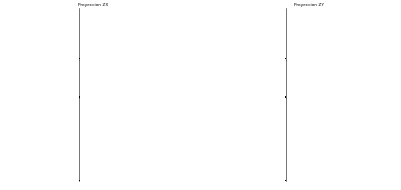


****** EVENTO 4070 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
696             4070         133        1.0        1.0     -220.0        0.0   
697             4070         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
696         0.0               2        1      6.3     6.05   -187.3   
697         0.0               2        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
696        114.625  
697        693.786  


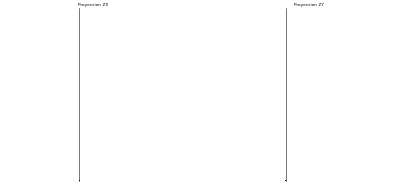


****** EVENTO 4071 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
698             4071         133        1.0        1.0     -220.0        0.0   
699             4071         133        1.0        1.0     -220.0        0.0   
700             4071         133        1.0        1.0     -220.0        0.0   
701             4071         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
698         0.0               4        1      6.3     6.05   -187.3   
699         0.0               4        2      6.3     6.05   -134.8   
700         0.0               4        3      6.3     6.05    -96.9   
701         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
698        113.244  
69

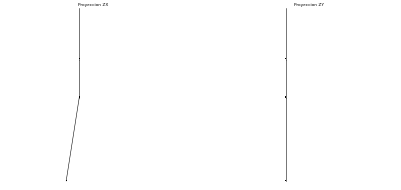


****** EVENTO 4072 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
702             4072         133        1.0        1.0     -220.0        0.0   
703             4072         133        1.0        1.0     -220.0        0.0   
704             4072         133        1.0        1.0     -220.0        0.0   
705             4072         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
702         0.0               4        1      6.3     6.05   -187.3   
703         0.0               4        2      6.3    -6.05   -134.8   
704         0.0               4        3      6.3    -6.05    -96.9   
705         0.0               4        2      6.3     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
702        112.202  
70

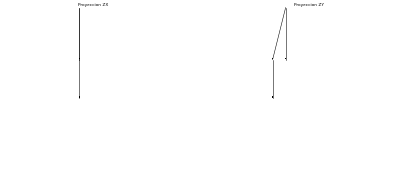


****** EVENTO 4073 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
706             4073         133        1.0        1.0     -220.0        0.0   
707             4073         133        1.0        1.0     -220.0        0.0   
708             4073         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
706         0.0               3        1      6.3     6.05   -187.3   
707         0.0               3        2      6.3     6.05   -134.8   
708         0.0               3        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
706        107.694  
707         29.693  
708        796.477  


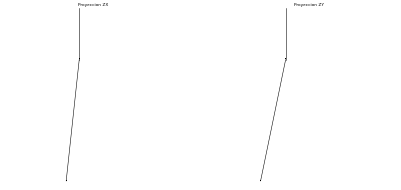


****** EVENTO 4074 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
709             4074         133        1.0        1.0     -220.0        0.0   
710             4074         133        1.0        1.0     -220.0        0.0   
711             4074         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
709         0.0               3        1      6.3     6.05   -187.3   
710         0.0               3        2     -6.3     6.05   -134.8   
711         0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
709         11.084  
710        288.136  
711        722.052  


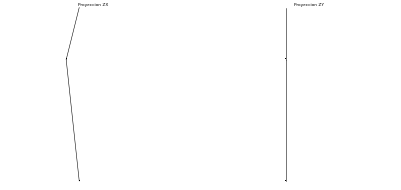


****** EVENTO 4075 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
712             4075         133        1.0        1.0     -220.0        0.0   
713             4075         133        1.0        1.0     -220.0        0.0   
714             4075         133        1.0        1.0     -220.0        0.0   
715             4075         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
712         0.0               4        1      6.3     6.05   -187.3   
713         0.0               4        2      6.3    -6.05   -134.8   
714         0.0               4        3      6.3    -6.05    -96.9   
715         0.0               4        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
712        117.075  
71

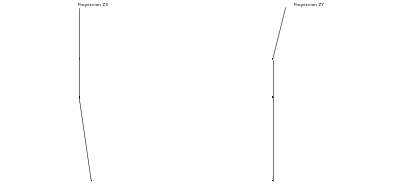


****** EVENTO 4076 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
716             4076         133        1.0        1.0     -220.0        0.0   
717             4076         133        1.0        1.0     -220.0        0.0   
718             4076         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
716         0.0               3        1      6.3     6.05   -187.3   
717         0.0               3        3      6.3    -6.05    -96.9   
718         0.0               3        4     31.5     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
716        116.749  
717         46.304  
718        897.498  


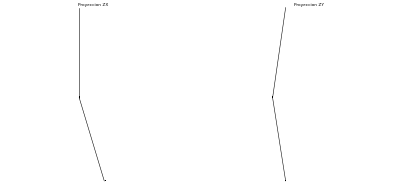


****** EVENTO 4077 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
719             4077         133        1.0        1.0     -220.0        0.0   
720             4077         133        1.0        1.0     -220.0        0.0   
721             4077         133        1.0        1.0     -220.0        0.0   
722             4077         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
719         0.0               4        1      6.3     6.05   -187.3   
720         0.0               4        2      6.3     6.05   -134.8   
721         0.0               4        3      6.3    -6.05    -96.9   
722         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
719        109.825  
72

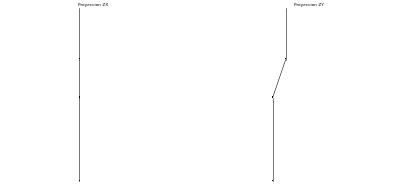


****** EVENTO 4078 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
723             4078         133        1.0        1.0     -220.0        0.0   
724             4078         133        1.0        1.0     -220.0        0.0   
725             4078         133        1.0        1.0     -220.0        0.0   
726             4078         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
723         0.0               4        1      6.3     6.05   -187.3   
724         0.0               4        2     -6.3     6.05   -134.8   
725         0.0               4        3     -6.3     6.05    -96.9   
726         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
723        112.412  
72

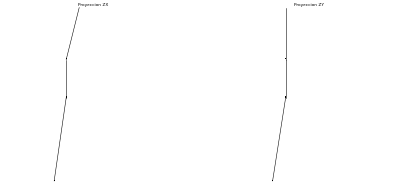


****** EVENTO 4079 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
727             4079         133        1.0        1.0     -220.0        0.0   
728             4079         133        1.0        1.0     -220.0        0.0   
729             4079         133        1.0        1.0     -220.0        0.0   
730             4079         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
727         0.0               4        1      6.3     6.05   -187.3   
728         0.0               4        2      6.3     6.05   -134.8   
729         0.0               4        3     18.9     6.05    -96.9   
730         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
727        114.432  
72

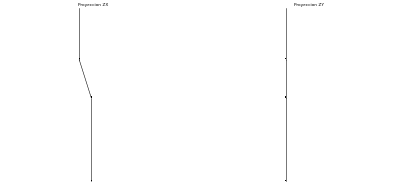


****** EVENTO 4080 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
731             4080         133        1.0        1.0     -220.0        0.0   
732             4080         133        1.0        1.0     -220.0        0.0   
733             4080         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
731         0.0               3        1      6.3     6.05   -187.3   
732         0.0               3        3     -6.3    -6.05    -96.9   
733         0.0               3        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
731        112.805  
732        458.002  
733        788.391  


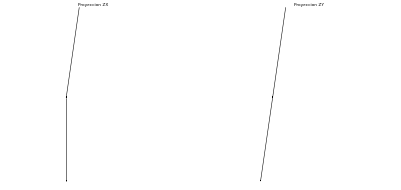


****** EVENTO 4081 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
734             4081         133        1.0        1.0     -220.0        0.0   
735             4081         133        1.0        1.0     -220.0        0.0   
736             4081         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
734         0.0               3        1      6.3     6.05   -187.3   
735         0.0               3        2      6.3     6.05   -134.8   
736         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
734        109.935  
735        298.161  
736        427.667  


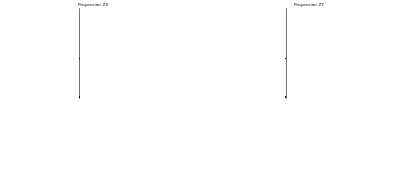


****** EVENTO 4082 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
737             4082         133        1.0        1.0     -220.0        0.0   
738             4082         133        1.0        1.0     -220.0        0.0   
739             4082         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
737         0.0               3        1      6.3     6.05   -187.3   
738         0.0               3        2    -18.9     6.05   -134.8   
739         0.0               3        3    -31.5     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
737        112.732  
738        379.972  
739        589.566  


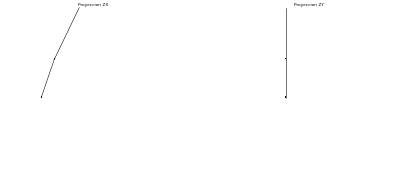


****** EVENTO 4083 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
740             4083         133        1.0        1.0     -220.0        0.0   
741             4083         133        1.0        1.0     -220.0        0.0   
742             4083         133        1.0        1.0     -220.0        0.0   
743             4083         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
740         0.0               4        1      6.3     6.05   -187.3   
741         0.0               4        2     -6.3    -6.05   -134.8   
742         0.0               4        3     -6.3    -6.05    -96.9   
743         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
740        114.202  
74

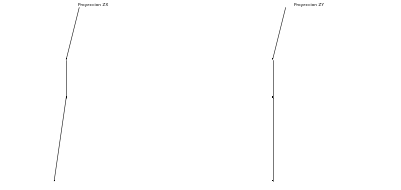


****** EVENTO 4084 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
744             4084         133        1.0        1.0     -220.0        0.0   
745             4084         133        1.0        1.0     -220.0        0.0   
746             4084         133        1.0        1.0     -220.0        0.0   
747             4084         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
744         0.0               4        1      6.3     6.05   -187.3   
745         0.0               4        2      6.3     6.05   -134.8   
746         0.0               4        3      6.3     6.05    -96.9   
747         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
744        113.084  
74

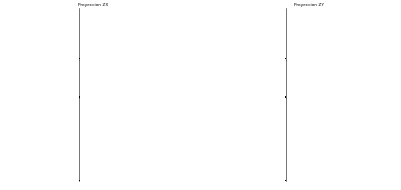


****** EVENTO 4085 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
748             4085         133        1.0        1.0     -220.0        0.0   
749             4085         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
748         0.0               2        1      6.3     6.05   -187.3   
749         0.0               2        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
748        115.209  
749        750.024  


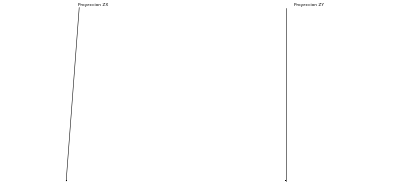


****** EVENTO 4086 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
750             4086         133        1.0        1.0     -220.0        0.0   
751             4086         133        1.0        1.0     -220.0        0.0   
752             4086         133        1.0        1.0     -220.0        0.0   
753             4086         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
750         0.0               4        1      6.3     6.05   -187.3   
751         0.0               4        2      6.3     6.05   -134.8   
752         0.0               4        3      6.3     6.05    -96.9   
753         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
750        112.321  
75

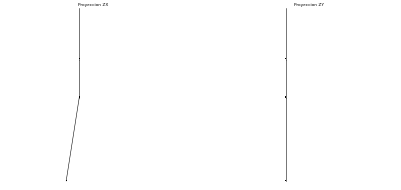


****** EVENTO 4087 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
754             4087         133        1.0        1.0     -220.0        0.0   
755             4087         133        1.0        1.0     -220.0        0.0   
756             4087         133        1.0        1.0     -220.0        0.0   
757             4087         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
754         0.0               4        1      6.3     6.05   -187.3   
755         0.0               4        2      6.3    -6.05   -134.8   
756         0.0               4        3     -6.3    -6.05    -96.9   
757         0.0               4        4    -18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
754        111.639  
75

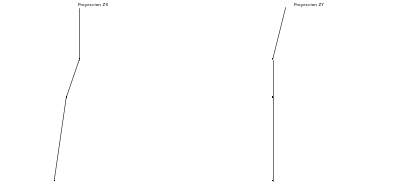


****** EVENTO 4088 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
758             4088         133        1.0        1.0     -220.0        0.0   
759             4088         133        1.0        1.0     -220.0        0.0   
760             4088         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
758         0.0               3        1      6.3     6.05   -187.3   
759         0.0               3        2     -6.3     6.05   -134.8   
760         0.0               3        3      6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
758        113.143  
759        284.851  
760        450.598  


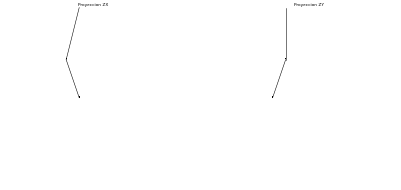


****** EVENTO 4089 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
761             4089         133        1.0        1.0     -220.0        0.0   
762             4089         133        1.0        1.0     -220.0        0.0   
763             4089         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
761         0.0               3        1      6.3     6.05   -187.3   
762         0.0               3        3      6.3    18.15    -96.9   
763         0.0               3        4      6.3    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
761        117.443  
762        517.549  
763        940.184  


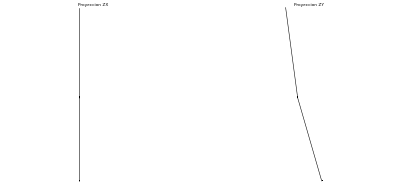


****** EVENTO 4090 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
764             4090         133        1.0        1.0     -220.0        0.0   
765             4090         133        1.0        1.0     -220.0        0.0   
766             4090         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
764         0.0               3        1      6.3     6.05   -187.3   
765         0.0               3        3      6.3    -6.05    -96.9   
766         0.0               3        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
764        107.792  
765        433.543  
766        810.745  


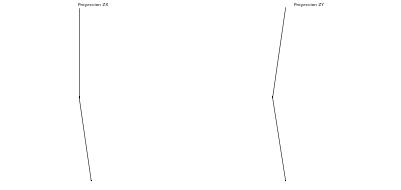


****** EVENTO 4091 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
767             4091         133        1.0        1.0     -220.0        0.0   
768             4091         133        1.0        1.0     -220.0        0.0   
769             4091         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
767         0.0               3        1      6.3     6.05   -187.3   
768         0.0               3        3      6.3   -18.15    -96.9   
769         0.0               3        4     18.9   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
767        113.196  
768        503.121  
769        966.963  


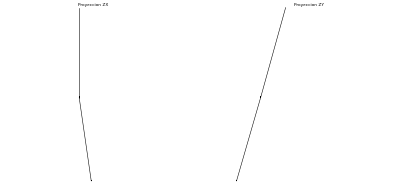


****** EVENTO 4092 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
770             4092         133        1.0        1.0     -220.0        0.0   
771             4092         133        1.0        1.0     -220.0        0.0   
772             4092         133        1.0        1.0     -220.0        0.0   
773             4092         133        1.0        1.0     -220.0        0.0   
774             4092         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
770         0.0               5        1      6.3     6.05   -187.3   
771         0.0               5        2      6.3     6.05   -134.8   
772         0.0               5        3      6.3     6.05    -96.9   
773         0.0               5        4      6.3    18.1

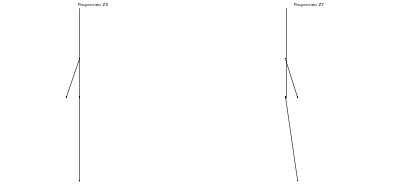


****** EVENTO 4093 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
775             4093         133        1.0        1.0     -220.0        0.0   
776             4093         133        1.0        1.0     -220.0        0.0   
777             4093         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
775         0.0               3        1      6.3     6.05   -187.3   
776         0.0               3        3      6.3    -6.05    -96.9   
777         0.0               3        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
775        114.236  
776        451.137  
777        825.546  


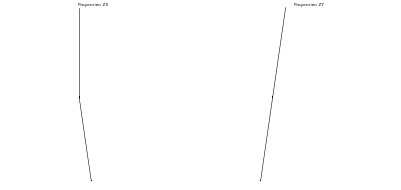


****** EVENTO 4094 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
778             4094         133        1.0        1.0     -220.0        0.0   
779             4094         133        1.0        1.0     -220.0        0.0   
780             4094         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
778         0.0               3        1      6.3     6.05   -187.3   
779         0.0               3        2      6.3     6.05   -134.8   
780         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
778         11.473  
779        302.059  
780        438.476  


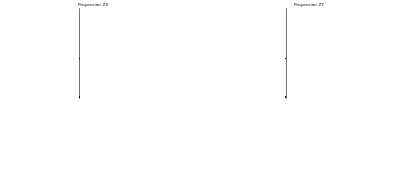


****** EVENTO 4095 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
781             4095         133        1.0        1.0     -220.0        0.0   
782             4095         133        1.0        1.0     -220.0        0.0   
783             4095         133        1.0        1.0     -220.0        0.0   
784             4095         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
781         0.0               4        1      6.3     6.05   -187.3   
782         0.0               4        2     -6.3     6.05   -134.8   
783         0.0               4        3     -6.3     6.05    -96.9   
784         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
781        115.918  
78

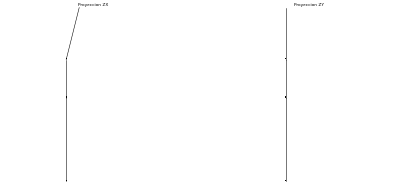


****** EVENTO 4096 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
785             4096         133        1.0        1.0     -220.0        0.0   
786             4096         133        1.0        1.0     -220.0        0.0   
787             4096         133        1.0        1.0     -220.0        0.0   
788             4096         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
785         0.0               4        1      6.3     6.05   -187.3   
786         0.0               4        2      6.3     6.05   -134.8   
787         0.0               4        3     -6.3     6.05    -96.9   
788         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
785        111.053  
78

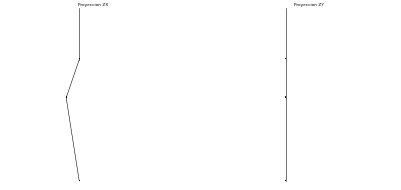


****** EVENTO 4097 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
789             4097         133        1.0        1.0     -220.0        0.0   
790             4097         133        1.0        1.0     -220.0        0.0   
791             4097         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
789         0.0               3        1      6.3     6.05   -187.3   
790         0.0               3        2     -6.3    -6.05   -134.8   
791         0.0               3        3    -18.9    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
789        113.972  
790        327.544  
791        496.519  


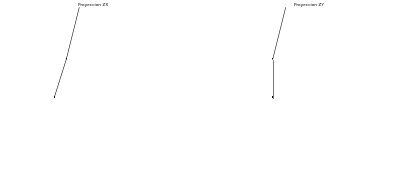


****** EVENTO 4098 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
792             4098         133        1.0        1.0     -220.0        0.0   
793             4098         133        1.0        1.0     -220.0        0.0   
794             4098         133        1.0        1.0     -220.0        0.0   
795             4098         133        1.0        1.0     -220.0        0.0   
796             4098         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
792         0.0               5        1      6.3     6.05   -187.3   
793         0.0               5        2     -6.3     6.05   -134.8   
794         0.0               5        3     -6.3     6.05    -96.9   
795         0.0               5        4     -6.3     6.0

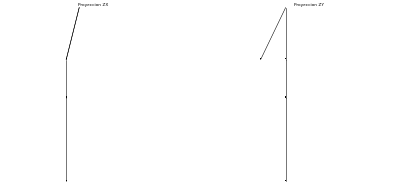


****** EVENTO 4099 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
797             4099         133        1.0        1.0     -220.0        0.0   
798             4099         133        1.0        1.0     -220.0        0.0   
799             4099         133        1.0        1.0     -220.0        0.0   
800             4099         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
797         0.0               4        1      6.3     6.05   -187.3   
798         0.0               4        2      6.3     6.05   -134.8   
799         0.0               4        3      6.3     6.05    -96.9   
800         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
797        114.946  
79

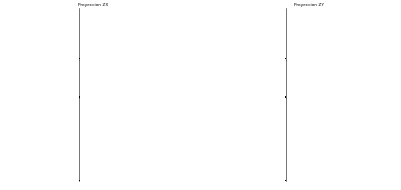


****** EVENTO 4100 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
801             4100         133        1.0        1.0     -220.0        0.0   
802             4100         133        1.0        1.0     -220.0        0.0   
803             4100         133        1.0        1.0     -220.0        0.0   
804             4100         133        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
801         0.0               4        1      6.3     6.05   -187.3   
802         0.0               4        2     -6.3    -6.05   -134.8   
803         0.0               4        3     -6.3    -6.05    -96.9   
804         0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
801        108.067  
80

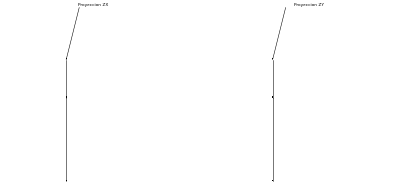


****** EVENTO 5001 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
805             5001         178        1.0        1.0     -220.0        0.0   
806             5001         178        1.0        1.0     -220.0        0.0   
807             5001         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
805         0.0               3        1      6.3     6.05   -187.3   
806         0.0               3        2      6.3     6.05   -134.8   
807         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
805        1.19420  
806        2.83014  
807        6.95892  


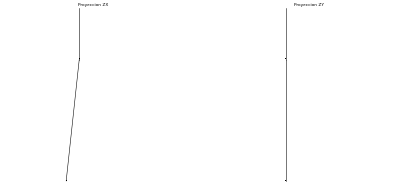


****** EVENTO 5002 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
808             5002         178        1.0        1.0     -220.0        0.0   
809             5002         178        1.0        1.0     -220.0        0.0   
810             5002         178        1.0        1.0     -220.0        0.0   
811             5002         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
808         0.0               4        1      6.3     6.05   -187.3   
809         0.0               4        2      6.3     6.05   -134.8   
810         0.0               4        3      6.3     6.05    -96.9   
811         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
808        1.06770  
80

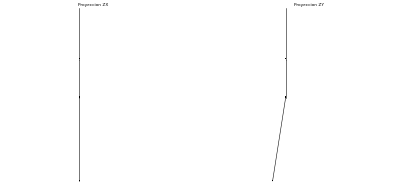


****** EVENTO 5003 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
812             5003         178        1.0        1.0     -220.0        0.0   
813             5003         178        1.0        1.0     -220.0        0.0   
814             5003         178        1.0        1.0     -220.0        0.0   
815             5003         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
812         0.0               4        1      6.3     6.05   -187.3   
813         0.0               4        2      6.3     6.05   -134.8   
814         0.0               4        3      6.3     6.05    -96.9   
815         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
812        1.07830  
81

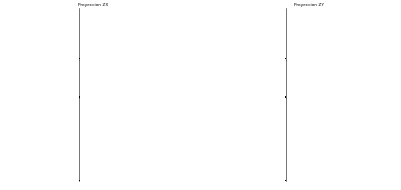


****** EVENTO 5004 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
816             5004         178        1.0        1.0     -220.0        0.0   
817             5004         178        1.0        1.0     -220.0        0.0   
818             5004         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
816         0.0               3        1      6.3     6.05   -187.3   
817         0.0               3        3     -6.3     6.05    -96.9   
818         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
816        1.14971  
817        4.09885  
818        7.22264  


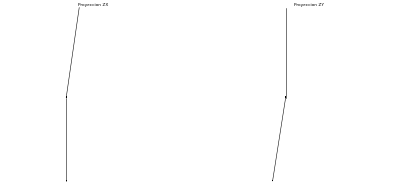


****** EVENTO 5005 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
819             5005         178        1.0        1.0     -220.0        0.0   
820             5005         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
819         0.0               2        1      6.3     6.05   -187.3   
820         0.0               2        2     -6.3     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
819        1.10099  
820        2.87913  


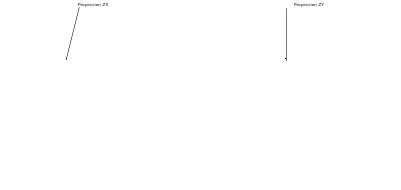


****** EVENTO 5006 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
821             5006         178        1.0        1.0     -220.0        0.0   
822             5006         178        1.0        1.0     -220.0        0.0   
823             5006         178        1.0        1.0     -220.0        0.0   
824             5006         178        1.0        1.0     -220.0        0.0   
825             5006         178        1.0        1.0     -220.0        0.0   
826             5006         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
821         0.0               6        1      6.3     6.05   -187.3   
822         0.0               6        2      6.3    -6.05   -134.8   
823         0.0               6        3      6.

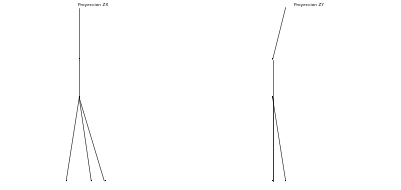


****** EVENTO 5007 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
827             5007         178        1.0        1.0     -220.0        0.0   
828             5007         178        1.0        1.0     -220.0        0.0   
829             5007         178        1.0        1.0     -220.0        0.0   
830             5007         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
827         0.0               4        1      6.3     6.05   -187.3   
828         0.0               4        2     -6.3     6.05   -134.8   
829         0.0               4        3     -6.3     6.05    -96.9   
830         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
827        1.13692  
82

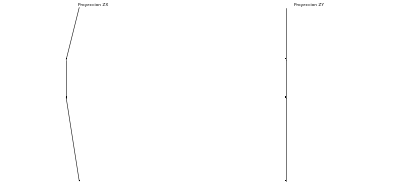


****** EVENTO 5008 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
831             5008         178        1.0        1.0     -220.0        0.0   
832             5008         178        1.0        1.0     -220.0        0.0   
833             5008         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
831         0.0               3        1      6.3     6.05   -187.3   
832         0.0               3        2     -6.3     6.05   -134.8   
833         0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
831        1.13665  
832        2.88108  
833        4.16077  


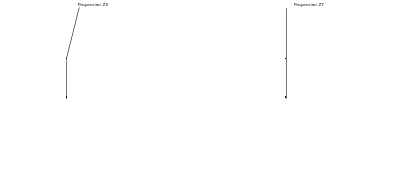


****** EVENTO 5009 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
834             5009         178        1.0        1.0     -220.0        0.0   
835             5009         178        1.0        1.0     -220.0        0.0   
836             5009         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
834         0.0               3        1      6.3     6.05   -187.3   
835         0.0               3        2      6.3     6.05   -134.8   
836         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
834        1.14402  
835        2.93680  
836        4.18617  


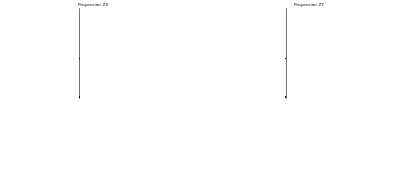


****** EVENTO 5010 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
837             5010         178        1.0        1.0     -220.0        0.0   
838             5010         178        1.0        1.0     -220.0        0.0   
839             5010         178        1.0        1.0     -220.0        0.0   
840             5010         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
837         0.0               4        1      6.3     6.05   -187.3   
838         0.0               4        2      6.3     6.05   -134.8   
839         0.0               4        3      6.3     6.05    -96.9   
840         0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
837        1.14569  
83

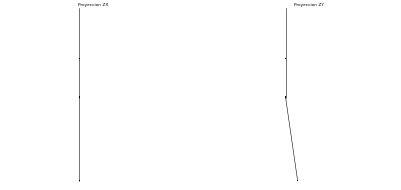


****** EVENTO 5011 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
841             5011         178        1.0        1.0     -220.0        0.0   
842             5011         178        1.0        1.0     -220.0        0.0   
843             5011         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
841         0.0               3        1      6.3     6.05   -187.3   
842         0.0               3        2      6.3     6.05   -134.8   
843         0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
841        1.07863  
842        2.90060  
843        6.96958  


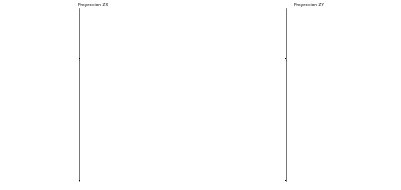


****** EVENTO 5012 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
844             5012         178        1.0        1.0     -220.0        0.0   
845             5012         178        1.0        1.0     -220.0        0.0   
846             5012         178        1.0        1.0     -220.0        0.0   
847             5012         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
844         0.0               4        1      6.3     6.05   -187.3   
845         0.0               4        2     -6.3     6.05   -134.8   
846         0.0               4        3     -6.3     6.05    -96.9   
847         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
844        1.15316  
84

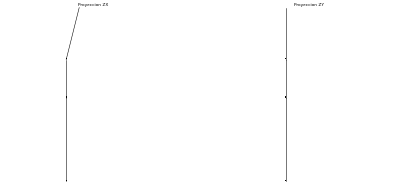


****** EVENTO 5013 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
848             5013         178        1.0        1.0     -220.0        0.0   
849             5013         178        1.0        1.0     -220.0        0.0   
850             5013         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
848         0.0               3        1      6.3     6.05   -187.3   
849         0.0               3        3     -6.3    -6.05    -96.9   
850         0.0               3        4     31.5    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
848        1.10328  
849        4.26249  
850        8.71214  


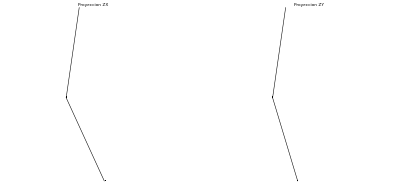


****** EVENTO 5014 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
851             5014         178        1.0        1.0     -220.0        0.0   
852             5014         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
851         0.0               2        1      6.3     6.05   -187.3   
852         0.0               2        2      6.3     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
851        1.13883  
852        2.96318  


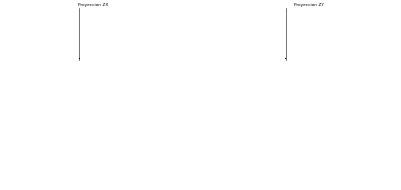


****** EVENTO 5015 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
853             5015         178        1.0        1.0     -220.0        0.0   
854             5015         178        1.0        1.0     -220.0        0.0   
855             5015         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
853         0.0               3        1      6.3     6.05   -187.3   
854         0.0               3        3     -6.3     6.05    -96.9   
855         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
853        1.13203  
854        4.23300  
855        7.54054  


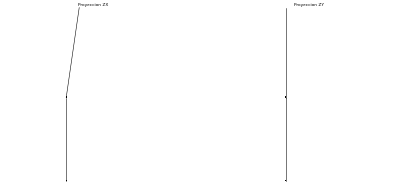


****** EVENTO 5016 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
856             5016         178        1.0        1.0     -220.0        0.0   
857             5016         178        1.0        1.0     -220.0        0.0   
858             5016         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
856         0.0               3        1      6.3     6.05   -187.3   
857         0.0               3        2      6.3     6.05   -134.8   
858         0.0               3        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
856        1.11136  
857        2.95597  
858        7.70365  


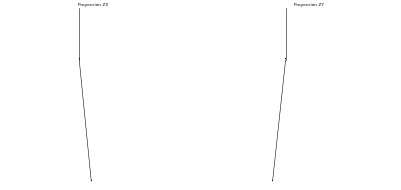


****** EVENTO 5017 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
859             5017         178        1.0        1.0     -220.0        0.0   
860             5017         178        1.0        1.0     -220.0        0.0   
861             5017         178        1.0        1.0     -220.0        0.0   
862             5017         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
859         0.0               4        1      6.3     6.05   -187.3   
860         0.0               4        4     -6.3     6.05    -13.2   
861         0.0               4        3      6.3     6.05    -96.9   
862         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
859        1.09883  
86

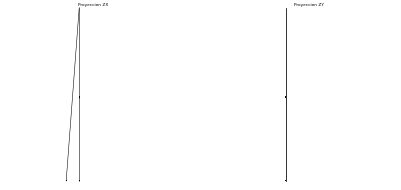


****** EVENTO 5018 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
863             5018         178        1.0        1.0     -220.0        0.0   
864             5018         178        1.0        1.0     -220.0        0.0   
865             5018         178        1.0        1.0     -220.0        0.0   
866             5018         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
863         0.0               4        1      6.3     6.05   -187.3   
864         0.0               4        2      6.3     6.05   -134.8   
865         0.0               4        3      6.3     6.05    -96.9   
866         0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
863        1.15647  
86

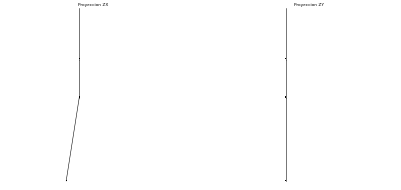


****** EVENTO 5019 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
867             5019         178        1.0        1.0     -220.0        0.0   
868             5019         178        1.0        1.0     -220.0        0.0   
869             5019         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
867         0.0               3        1      6.3     6.05   -187.3   
868         0.0               3        3      6.3     6.05    -96.9   
869         0.0               3        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
867        1.13811  
868        4.37904  
869        7.31003  


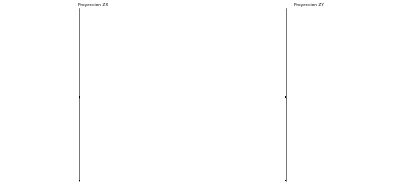


****** EVENTO 5020 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
870             5020         178        1.0        1.0     -220.0        0.0   
871             5020         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
870         0.0               2        1      6.3     6.05   -187.3   
871         0.0               2        2      6.3    -6.05   -134.8   

        Time_h[ns]  
Hit_Id              
870        1.08012  
871        3.07782  


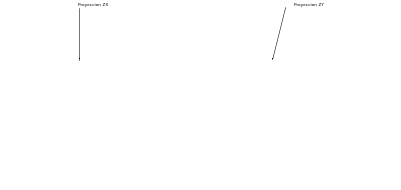


****** EVENTO 5021 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
872             5021         178        1.0        1.0     -220.0        0.0   
873             5021         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
872         0.0               2        1      6.3     6.05   -187.3   
873         0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
872        1.10894  
873        7.32236  


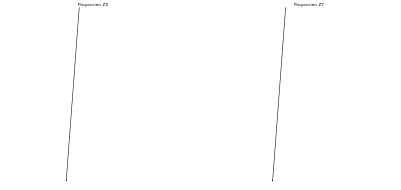


****** EVENTO 5022 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
874             5022         178        1.0        1.0     -220.0        0.0   
875             5022         178        1.0        1.0     -220.0        0.0   
876             5022         178        1.0        1.0     -220.0        0.0   
877             5022         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
874         0.0               4        1      6.3     6.05   -187.3   
875         0.0               4        2      6.3     6.05   -134.8   
876         0.0               4        3      6.3     6.05    -96.9   
877         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
874        1.08506  
87

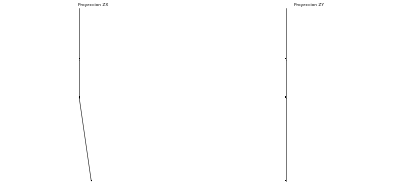


****** EVENTO 5023 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
878             5023         178        1.0        1.0     -220.0        0.0   
879             5023         178        1.0        1.0     -220.0        0.0   
880             5023         178        1.0        1.0     -220.0        0.0   
881             5023         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
878         0.0               4        1      6.3     6.05   -187.3   
879         0.0               4        2      6.3     6.05   -134.8   
880         0.0               4        3      6.3     6.05    -96.9   
881         0.0               4        4     18.9    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
878        1.12525  
87

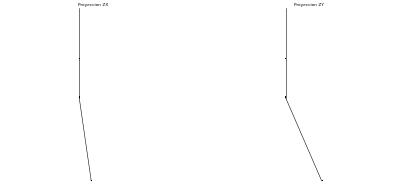


****** EVENTO 5024 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
882             5024         178        1.0        1.0     -220.0        0.0   
883             5024         178        1.0        1.0     -220.0        0.0   
884             5024         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
882         0.0               3        1      6.3     6.05   -187.3   
883         0.0               3        3      6.3    -6.05    -96.9   
884         0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
882        1.09633  
883        4.21058  
884        7.21835  


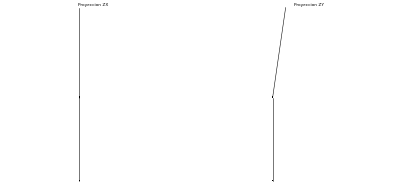


****** EVENTO 5025 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
885             5025         178        1.0        1.0     -220.0        0.0   
886             5025         178        1.0        1.0     -220.0        0.0   
887             5025         178        1.0        1.0     -220.0        0.0   
888             5025         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
885         0.0               4        1      6.3     6.05   -187.3   
886         0.0               4        2      6.3     6.05   -134.8   
887         0.0               4        3      6.3     6.05    -96.9   
888         0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
885        1.13574  
88

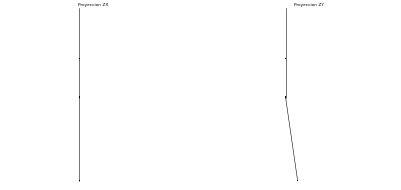


****** EVENTO 5026 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
889             5026         178        1.0        1.0     -220.0        0.0   
890             5026         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
889         0.0               2        1      6.3     6.05   -187.3   
890         0.0               2        4     -6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
889        1.12780  
890        7.83117  


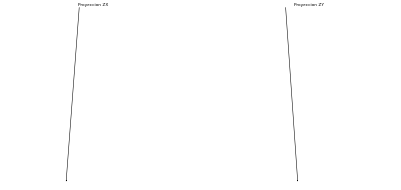


****** EVENTO 5027 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
891             5027         178        1.0        1.0     -220.0        0.0   
892             5027         178        1.0        1.0     -220.0        0.0   
893             5027         178        1.0        1.0     -220.0        0.0   
894             5027         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
891         0.0               4        1      6.3     6.05   -187.3   
892         0.0               4        2      6.3     6.05   -134.8   
893         0.0               4        3      6.3     6.05    -96.9   
894         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
891        1.06904  
89

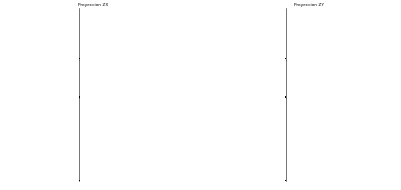


****** EVENTO 5028 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
895             5028         178        1.0        1.0     -220.0        0.0   
896             5028         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
895         0.0               2        1      6.3     6.05   -187.3   
896         0.0               2        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
895        1.11960  
896        7.33119  


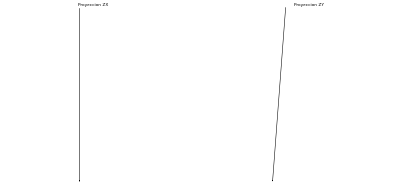


****** EVENTO 5029 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
897             5029         178        1.0        1.0     -220.0        0.0   
898             5029         178        1.0        1.0     -220.0        0.0   
899             5029         178        1.0        1.0     -220.0        0.0   
900             5029         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
897         0.0               4        1      6.3     6.05   -187.3   
898         0.0               4        2      6.3    -6.05   -134.8   
899         0.0               4        3      6.3    -6.05    -96.9   
900         0.0               4        4      6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
897        1.11271  
89

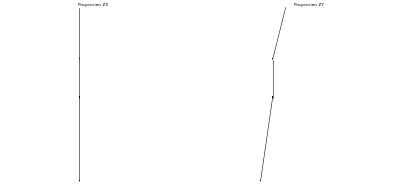


****** EVENTO 5030 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
901             5030         178        1.0        1.0     -220.0        0.0   
902             5030         178        1.0        1.0     -220.0        0.0   
903             5030         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
901         0.0               3        1      6.3     6.05   -187.3   
902         0.0               3        3     -6.3     6.05    -96.9   
903         0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
901        1.10481  
902        4.36019  
903        7.58789  


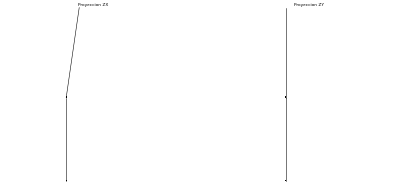


****** EVENTO 5031 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
904             5031         178        1.0        1.0     -220.0        0.0   
905             5031         178        1.0        1.0     -220.0        0.0   
906             5031         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
904         0.0               3        1      6.3     6.05   -187.3   
905         0.0               3        2      6.3     6.05   -134.8   
906         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
904        1.04813  
905        2.94567  
906        4.24430  


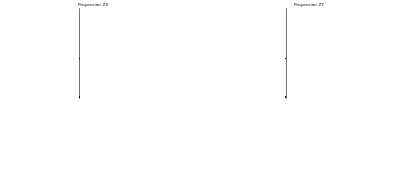


****** EVENTO 5032 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
907             5032         178        1.0        1.0     -220.0        0.0   
908             5032         178        1.0        1.0     -220.0        0.0   
909             5032         178        1.0        1.0     -220.0        0.0   
910             5032         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
907         0.0               4        1      6.3     6.05   -187.3   
908         0.0               4        2      6.3    -6.05   -134.8   
909         0.0               4        3      6.3    -6.05    -96.9   
910         0.0               4        4     18.9   -30.25    -13.2   

        Time_h[ns]  
Hit_Id              
907        1.12746  
90

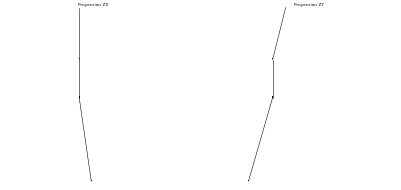


****** EVENTO 5033 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
911             5033         178        1.0        1.0     -220.0        0.0   
912             5033         178        1.0        1.0     -220.0        0.0   
913             5033         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
911         0.0               3        1      6.3     6.05   -187.3   
912         0.0               3        3     -6.3    -6.05    -96.9   
913         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
911        1.07016  
912        4.20170  
913        7.08518  


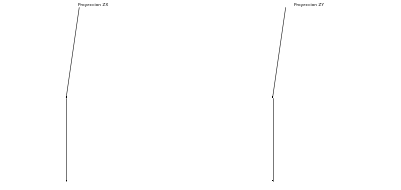


****** EVENTO 5034 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
914             5034         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
914         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
914        1.08106  


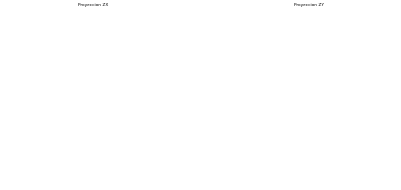


****** EVENTO 5035 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
915             5035         178        1.0        1.0     -220.0        0.0   
916             5035         178        1.0        1.0     -220.0        0.0   
917             5035         178        1.0        1.0     -220.0        0.0   
918             5035         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
915         0.0               4        1      6.3     6.05   -187.3   
916         0.0               4        2      6.3     6.05   -134.8   
917         0.0               4        3      6.3     6.05    -96.9   
918         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
915        1.10777  
91

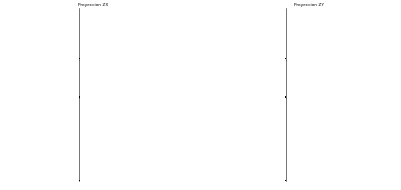


****** EVENTO 5036 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
919             5036         178        1.0        1.0     -220.0        0.0   
920             5036         178        1.0        1.0     -220.0        0.0   
921             5036         178        1.0        1.0     -220.0        0.0   
922             5036         178        1.0        1.0     -220.0        0.0   
923             5036         178        1.0        1.0     -220.0        0.0   
924             5036         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
919         0.0               6        1      6.3     6.05   -187.3   
920         0.0               6        2      6.3    -6.05   -134.8   
921         0.0               6        3      6.

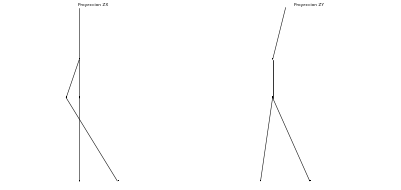


****** EVENTO 5037 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
925             5037         178        1.0        1.0     -220.0        0.0   
926             5037         178        1.0        1.0     -220.0        0.0   
927             5037         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
925         0.0               3        1      6.3     6.05   -187.3   
926         0.0               3        2      6.3     6.05   -134.8   
927         0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
925        1.14612  
926        2.94699  
927        4.20509  


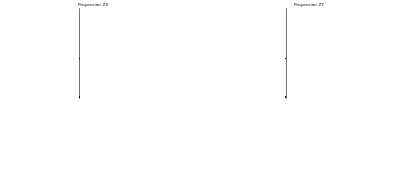


****** EVENTO 5038 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
928             5038         178        1.0        1.0     -220.0        0.0   
929             5038         178        1.0        1.0     -220.0        0.0   
930             5038         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
928         0.0               3        1      6.3     6.05   -187.3   
929         0.0               3        3     -6.3    -6.05    -96.9   
930         0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
928        1.09373  
929        4.16501  
930        7.21925  


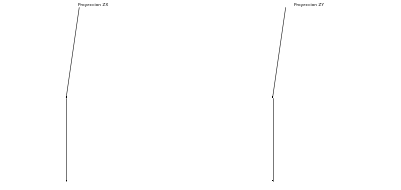


****** EVENTO 5039 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
931             5039         178        1.0        1.0     -220.0        0.0   
932             5039         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
931         0.0               2        1      6.3     6.05   -187.3   
932         0.0               2        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
931        1.13719  
932        7.08030  


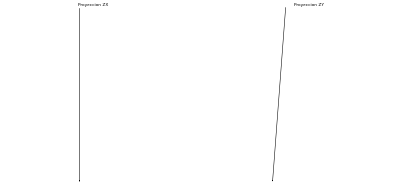


****** EVENTO 5040 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
933             5040         178        1.0        1.0     -220.0        0.0   
934             5040         178        1.0        1.0     -220.0        0.0   
935             5040         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
933         0.0               3        1      6.3     6.05   -187.3   
934         0.0               3        3     -6.3    18.15    -96.9   
935         0.0               3        4     -6.3    42.35    -13.2   

        Time_h[ns]  
Hit_Id              
933        1.13199  
934        5.36344  
935        9.54238  


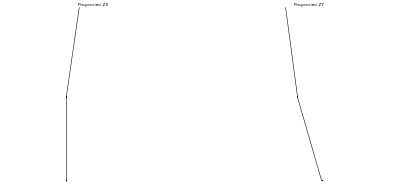


****** EVENTO 5041 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
936             5041         178        1.0        1.0     -220.0        0.0   
937             5041         178        1.0        1.0     -220.0        0.0   
938             5041         178        1.0        1.0     -220.0        0.0   
939             5041         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
936         0.0               4        1      6.3     6.05   -187.3   
937         0.0               4        2      6.3     6.05   -134.8   
938         0.0               4        3      6.3     6.05    -96.9   
939         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
936        1.08733  
93

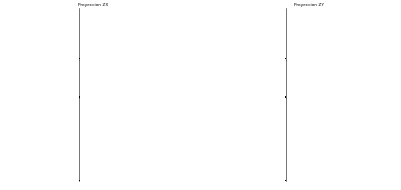


****** EVENTO 5042 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
940             5042         178        1.0        1.0     -220.0        0.0   
941             5042         178        1.0        1.0     -220.0        0.0   
942             5042         178        1.0        1.0     -220.0        0.0   
943             5042         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
940         0.0               4        1      6.3     6.05   -187.3   
941         0.0               4        2      6.3     6.05   -134.8   
942         0.0               4        3      6.3     6.05    -96.9   
943         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
940        1.06127  
94

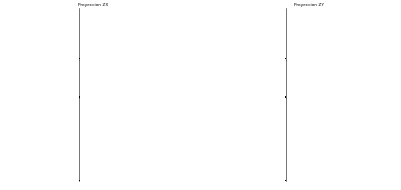


****** EVENTO 5043 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
944             5043         178        1.0        1.0     -220.0        0.0   
945             5043         178        1.0        1.0     -220.0        0.0   
946             5043         178        1.0        1.0     -220.0        0.0   
947             5043         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
944         0.0               4        1      6.3     6.05   -187.3   
945         0.0               4        2      6.3     6.05   -134.8   
946         0.0               4        3      6.3     6.05    -96.9   
947         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
944        1.10963  
94

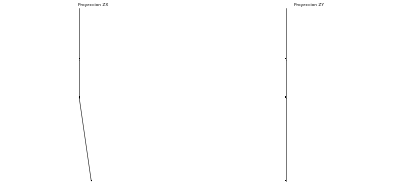


****** EVENTO 5044 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
948             5044         178        1.0        1.0     -220.0        0.0   
949             5044         178        1.0        1.0     -220.0        0.0   
950             5044         178        1.0        1.0     -220.0        0.0   
951             5044         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
948         0.0               4        1      6.3     6.05   -187.3   
949         0.0               4        3     -6.3     6.05    -96.9   
950         0.0               4        4     -6.3     6.05    -13.2   
951         0.0               4        2     18.9     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
948        1.07991  
94

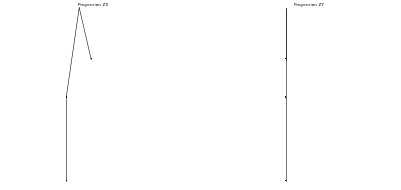


****** EVENTO 5045 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
952             5045         178        1.0        1.0     -220.0        0.0   
953             5045         178        1.0        1.0     -220.0        0.0   
954             5045         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
952         0.0               3        1      6.3     6.05   -187.3   
953         0.0               3        3      6.3    -6.05    -96.9   
954         0.0               3        4      6.3   -42.35    -13.2   

        Time_h[ns]  
Hit_Id              
952        1.15314  
953        4.59430  
954        9.34633  


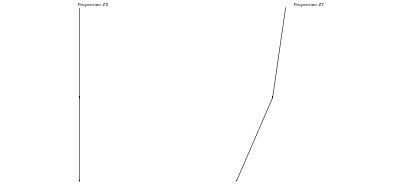


****** EVENTO 5046 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
955             5046         178        1.0        1.0     -220.0        0.0   
956             5046         178        1.0        1.0     -220.0        0.0   
957             5046         178        1.0        1.0     -220.0        0.0   
958             5046         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
955         0.0               4        1      6.3     6.05   -187.3   
956         0.0               4        2      6.3    -6.05   -134.8   
957         0.0               4        3      6.3    -6.05    -96.9   
958         0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
955        1.12547  
95

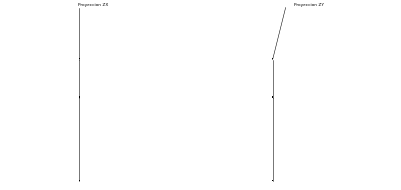


****** EVENTO 5047 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
959             5047         178        1.0        1.0     -220.0        0.0   
960             5047         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
959         0.0               2        1      6.3     6.05   -187.3   
960         0.0               2        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
959        1.05827  
960        8.01595  


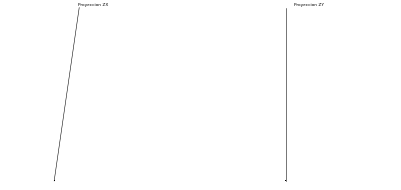


****** EVENTO 5048 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
961             5048         178        1.0        1.0     -220.0        0.0   
962             5048         178        1.0        1.0     -220.0        0.0   
963             5048         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
961         0.0               3        1      6.3     6.05   -187.3   
962         0.0               3        3     -6.3    -6.05    -96.9   
963         0.0               3        4     -6.3   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
961        1.12439  
962        4.21698  
963        8.17604  


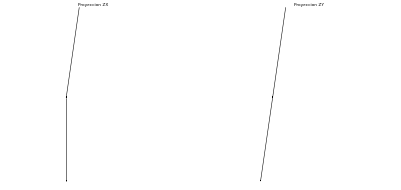


****** EVENTO 5049 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
964             5049         178        1.0        1.0     -220.0        0.0   
965             5049         178        1.0        1.0     -220.0        0.0   
966             5049         178        1.0        1.0     -220.0        0.0   
967             5049         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
964         0.0               4        1      6.3     6.05   -187.3   
965         0.0               4        2      6.3     6.05   -134.8   
966         0.0               4        3      6.3     6.05    -96.9   
967         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
964        1.08003  
96

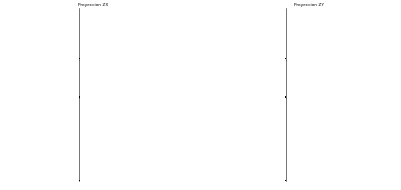


****** EVENTO 5050 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
968             5050         178        1.0        1.0     -220.0        0.0   
969             5050         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
968         0.0               2        1      6.3     6.05   -187.3   
969         0.0               2        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
968        1.18187  
969        7.14742  


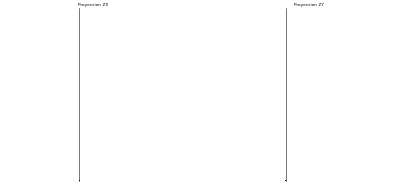


****** EVENTO 5051 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
970             5051         178        1.0        1.0     -220.0        0.0   
971             5051         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
970         0.0               2        1      6.3     6.05   -187.3   
971         0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
970        1.14274  
971        7.34883  


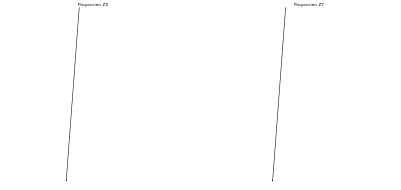


****** EVENTO 5052 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
972             5052         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
972         0.0               1        1      6.3     6.05   -187.3   

        Time_h[ns]  
Hit_Id              
972        1.12124  


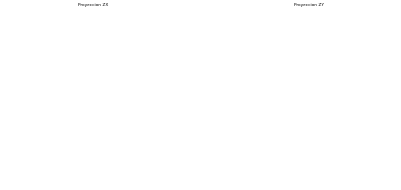


****** EVENTO 5053 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
973             5053         178        1.0        1.0     -220.0        0.0   
974             5053         178        1.0        1.0     -220.0        0.0   
975             5053         178        1.0        1.0     -220.0        0.0   
976             5053         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
973         0.0               4        1      6.3     6.05   -187.3   
974         0.0               4        2      6.3    -6.05   -134.8   
975         0.0               4        3      6.3    -6.05    -96.9   
976         0.0               4        4     18.9   -18.15    -13.2   

        Time_h[ns]  
Hit_Id              
973        1.07309  
97

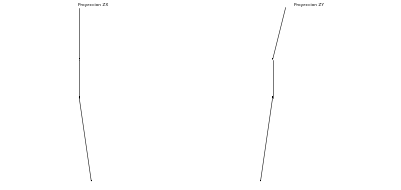


****** EVENTO 5054 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
977             5054         178        1.0        1.0     -220.0        0.0   
978             5054         178        1.0        1.0     -220.0        0.0   
979             5054         178        1.0        1.0     -220.0        0.0   
980             5054         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
977         0.0               4        1      6.3     6.05   -187.3   
978         0.0               4        2      6.3     6.05   -134.8   
979         0.0               4        3      6.3     6.05    -96.9   
980         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
977        1.14734  
97

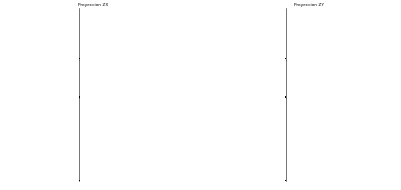


****** EVENTO 5055 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
981             5055         178        1.0        1.0     -220.0        0.0   
982             5055         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
981         0.0               2        1      6.3     6.05   -187.3   
982         0.0               2        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
981        1.13172  
982        7.15884  


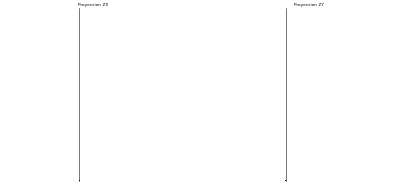


****** EVENTO 5056 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
983             5056         178        1.0        1.0     -220.0        0.0   
984             5056         178        1.0        1.0     -220.0        0.0   
985             5056         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
983         0.0               3        1      6.3     6.05   -187.3   
984         0.0               3        3      6.3     6.05    -96.9   
985         0.0               3        4      6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
983        1.14318  
984        4.40156  
985        8.53111  


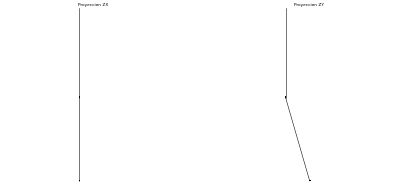


****** EVENTO 5057 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
986             5057         178        1.0        1.0     -220.0        0.0   
987             5057         178        1.0        1.0     -220.0        0.0   
988             5057         178        1.0        1.0     -220.0        0.0   
989             5057         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
986         0.0               4        1      6.3     6.05   -187.3   
987         0.0               4        2      6.3     6.05   -134.8   
988         0.0               4        3      6.3     6.05    -96.9   
989         0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
986        1.14113  
98

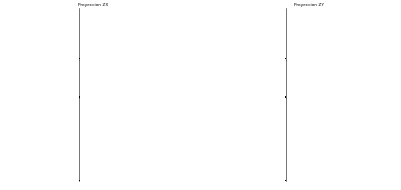


****** EVENTO 5058 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
990             5058         178        1.0        1.0     -220.0        0.0   
991             5058         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
990         0.0               2        1      6.3     6.05   -187.3   
991         0.0               2        4    -18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
990        1.11760  
991        7.95929  


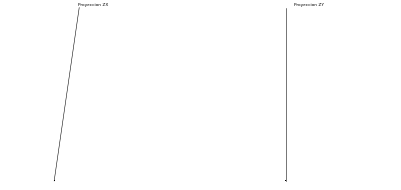


****** EVENTO 5059 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
992             5059         178        1.0        1.0     -220.0        0.0   
993             5059         178        1.0        1.0     -220.0        0.0   
994             5059         178        1.0        1.0     -220.0        0.0   
995             5059         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
992         0.0               4        1      6.3     6.05   -187.3   
993         0.0               4        2      6.3     6.05   -134.8   
994         0.0               4        3      6.3     6.05    -96.9   
995         0.0               4        4     18.9     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
992        1.14260  
99

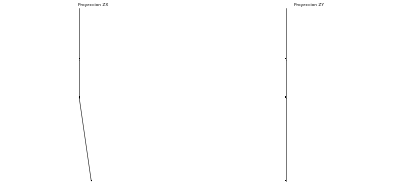


****** EVENTO 5060 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
996             5060         178        1.0        1.0     -220.0        0.0   
997             5060         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
996         0.0               2        1      6.3     6.05   -187.3   
997         0.0               2        2      6.3     6.05   -134.8   

        Time_h[ns]  
Hit_Id              
996        1.13067  
997        2.90922  


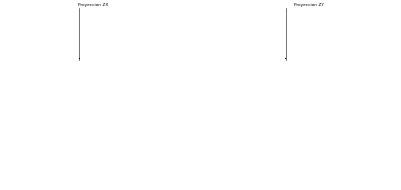


****** EVENTO 5061 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
998             5061         178        1.0        1.0     -220.0        0.0   
999             5061         178        1.0        1.0     -220.0        0.0   
1000            5061         178        1.0        1.0     -220.0        0.0   
1001            5061         178        1.0        1.0     -220.0        0.0   
1002            5061         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
998         0.0               5        1      6.3     6.05   -187.3   
999         0.0               5        3      6.3    -6.05    -96.9   
1000        0.0               5        4      6.3   -18.15    -13.2   
1001        0.0               5        4     -6.3    -6.0

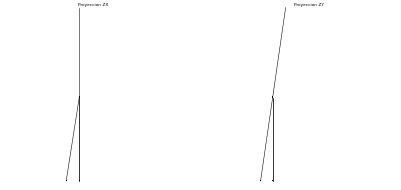


****** EVENTO 5062 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1003            5062         178        1.0        1.0     -220.0        0.0   
1004            5062         178        1.0        1.0     -220.0        0.0   
1005            5062         178        1.0        1.0     -220.0        0.0   
1006            5062         178        1.0        1.0     -220.0        0.0   
1007            5062         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1003        0.0               5        1      6.3     6.05   -187.3   
1004        0.0               5        2    -31.5    -6.05   -134.8   
1005        0.0               5        2     -6.3    -6.05   -134.8   
1006        0.0               5        3      6.3     6.0

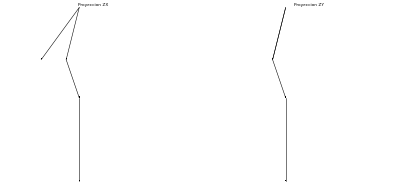


****** EVENTO 5063 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1008            5063         178        1.0        1.0     -220.0        0.0   
1009            5063         178        1.0        1.0     -220.0        0.0   
1010            5063         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1008        0.0               3        1      6.3     6.05   -187.3   
1009        0.0               3        2      6.3     6.05   -134.8   
1010        0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1008       1.02613  
1009       2.95852  
1010       7.50243  


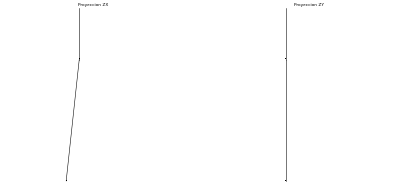


****** EVENTO 5064 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1011            5064         178        1.0        1.0     -220.0        0.0   
1012            5064         178        1.0        1.0     -220.0        0.0   
1013            5064         178        1.0        1.0     -220.0        0.0   
1014            5064         178        1.0        1.0     -220.0        0.0   
1015            5064         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1011        0.0               5        1      6.3     6.05   -187.3   
1012        0.0               5        2      6.3     6.05   -134.8   
1013        0.0               5        3     18.9    18.15    -96.9   
1014        0.0               5        4     44.1    42.3

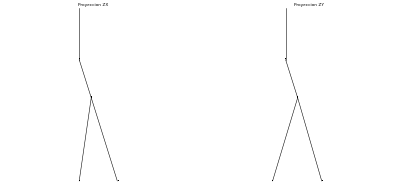


****** EVENTO 5065 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1016            5065         178        1.0        1.0     -220.0        0.0   
1017            5065         178        1.0        1.0     -220.0        0.0   
1018            5065         178        1.0        1.0     -220.0        0.0   
1019            5065         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1016        0.0               4        1      6.3     6.05   -187.3   
1017        0.0               4        2      6.3     6.05   -134.8   
1018        0.0               4        3      6.3     6.05    -96.9   
1019        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1016       1.06602  
10

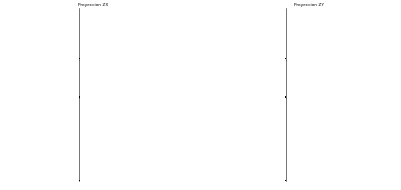


****** EVENTO 5066 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1020            5066         178        1.0        1.0     -220.0        0.0   
1021            5066         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1020        0.0               2        1      6.3     6.05   -187.3   
1021        0.0               2        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1020       1.09064  
1021       7.39219  


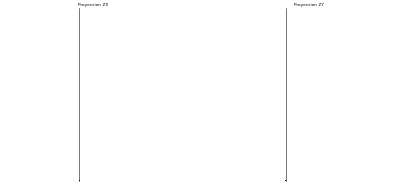


****** EVENTO 5067 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1022            5067         178        1.0        1.0     -220.0        0.0   
1023            5067         178        1.0        1.0     -220.0        0.0   
1024            5067         178        1.0        1.0     -220.0        0.0   
1025            5067         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1022        0.0               4        1      6.3     6.05   -187.3   
1023        0.0               4        2      6.3     6.05   -134.8   
1024        0.0               4        3      6.3     6.05    -96.9   
1025        0.0               4        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1022       1.11017  
10

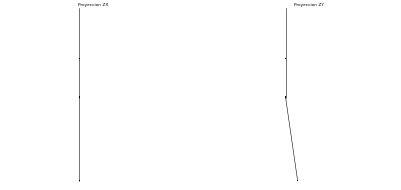


****** EVENTO 5068 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1026            5068         178        1.0        1.0     -220.0        0.0   
1027            5068         178        1.0        1.0     -220.0        0.0   
1028            5068         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1026        0.0               3        1      6.3     6.05   -187.3   
1027        0.0               3        3      6.3     6.05    -96.9   
1028        0.0               3        4      6.3    18.15    -13.2   

        Time_h[ns]  
Hit_Id              
1026       1.09630  
1027       4.34827  
1028       7.88381  


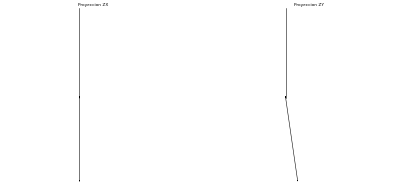


****** EVENTO 5069 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1029            5069         178        1.0        1.0     -220.0        0.0   
1030            5069         178        1.0        1.0     -220.0        0.0   
1031            5069         178        1.0        1.0     -220.0        0.0   
1032            5069         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1029        0.0               4        1      6.3     6.05   -187.3   
1030        0.0               4        2      6.3     6.05   -134.8   
1031        0.0               4        3      6.3     6.05    -96.9   
1032        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1029       1.06485  
10

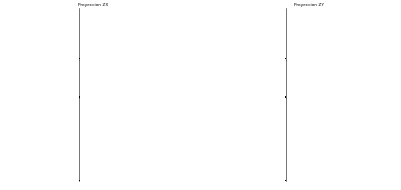


****** EVENTO 5070 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1033            5070         178        1.0        1.0     -220.0        0.0   
1034            5070         178        1.0        1.0     -220.0        0.0   
1035            5070         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1033        0.0               3        1      6.3     6.05   -187.3   
1034        0.0               3        2      6.3     6.05   -134.8   
1035        0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1033       1.13444  
1034       2.90578  
1035       4.21740  


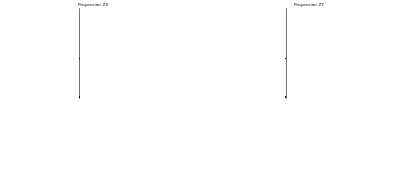


****** EVENTO 5071 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1036            5071         178        1.0        1.0     -220.0        0.0   
1037            5071         178        1.0        1.0     -220.0        0.0   
1038            5071         178        1.0        1.0     -220.0        0.0   
1039            5071         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1036        0.0               4        1      6.3     6.05   -187.3   
1037        0.0               4        2      6.3     6.05   -134.8   
1038        0.0               4        3      6.3     6.05    -96.9   
1039        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1036       1.15685  
10

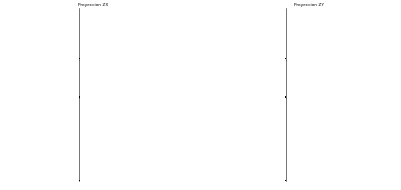


****** EVENTO 5072 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1040            5072         178        1.0        1.0     -220.0        0.0   
1041            5072         178        1.0        1.0     -220.0        0.0   
1042            5072         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1040        0.0               3        1      6.3     6.05   -187.3   
1041        0.0               3        2      6.3     6.05   -134.8   
1042        0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1040       1.09526  
1041       3.02205  
1042       4.23509  


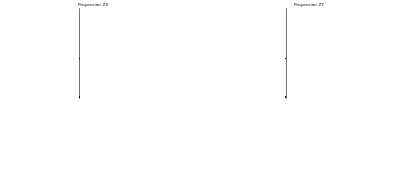


****** EVENTO 5073 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1043            5073         178        1.0        1.0     -220.0        0.0   
1044            5073         178        1.0        1.0     -220.0        0.0   
1045            5073         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1043        0.0               3        1      6.3     6.05   -187.3   
1044        0.0               3        2      6.3     6.05   -134.8   
1045        0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1043       1.13837  
1044       3.05707  
1045       4.46959  


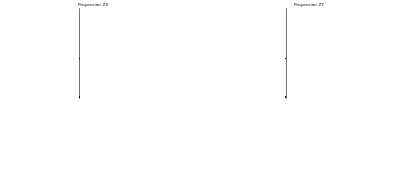


****** EVENTO 5074 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1046            5074         178        1.0        1.0     -220.0        0.0   
1047            5074         178        1.0        1.0     -220.0        0.0   
1048            5074         178        1.0        1.0     -220.0        0.0   
1049            5074         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1046        0.0               4        1      6.3     6.05   -187.3   
1047        0.0               4        2      6.3    -6.05   -134.8   
1048        0.0               4        3      6.3    -6.05    -96.9   
1049        0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1046       1.01264  
10

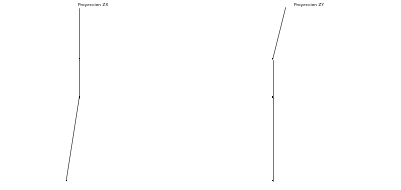


****** EVENTO 5075 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1050            5075         178        1.0        1.0     -220.0        0.0   
1051            5075         178        1.0        1.0     -220.0        0.0   
1052            5075         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1050        0.0               3        1      6.3     6.05   -187.3   
1051        0.0               3        3     -6.3     6.05    -96.9   
1052        0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1050       1.20945  
1051       4.28981  
1052       7.38196  


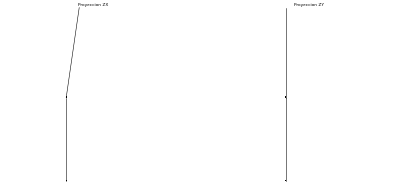


****** EVENTO 5076 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1053            5076         178        1.0        1.0     -220.0        0.0   
1054            5076         178        1.0        1.0     -220.0        0.0   
1055            5076         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1053        0.0               3        1      6.3     6.05   -187.3   
1054        0.0               3        2      6.3     6.05   -134.8   
1055        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1053       1.09364  
1054       2.84361  
1055       4.36883  


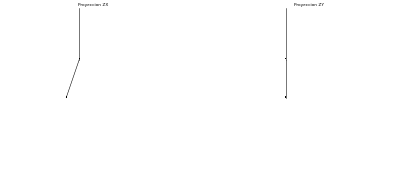


****** EVENTO 5077 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1056            5077         178        1.0        1.0     -220.0        0.0   
1057            5077         178        1.0        1.0     -220.0        0.0   
1058            5077         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1056        0.0               3        1      6.3     6.05   -187.3   
1057        0.0               3        2      6.3     6.05   -134.8   
1058        0.0               3        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1056       1.12748  
1057       2.86060  
1058       7.26612  


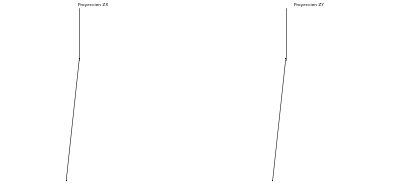


****** EVENTO 5078 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1059            5078         178        1.0        1.0     -220.0        0.0   
1060            5078         178        1.0        1.0     -220.0        0.0   
1061            5078         178        1.0        1.0     -220.0        0.0   
1062            5078         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1059        0.0               4        1      6.3     6.05   -187.3   
1060        0.0               4        2     -6.3    -6.05   -134.8   
1061        0.0               4        3     -6.3    -6.05    -96.9   
1062        0.0               4        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1059       1.17228  
10

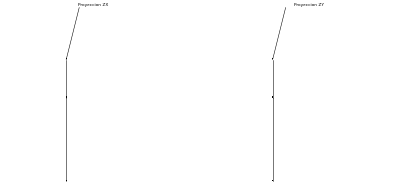


****** EVENTO 5079 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1063            5079         178        1.0        1.0     -220.0        0.0   
1064            5079         178        1.0        1.0     -220.0        0.0   
1065            5079         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1063        0.0               3        1      6.3     6.05   -187.3   
1064        0.0               3        4     -6.3     6.05    -13.2   
1065        0.0               3        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1063       1.03204  
1064       7.12019  
1065       7.61299  


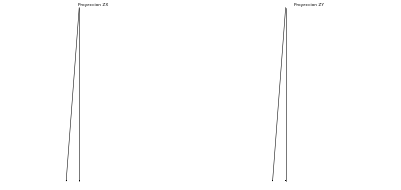


****** EVENTO 5080 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1066            5080         178        1.0        1.0     -220.0        0.0   
1067            5080         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1066        0.0               2        1      6.3     6.05   -187.3   
1067        0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1066       1.14828  
1067       7.20783  


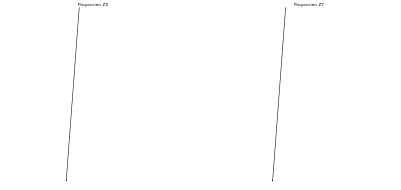


****** EVENTO 5081 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1068            5081         178        1.0        1.0     -220.0        0.0   
1069            5081         178        1.0        1.0     -220.0        0.0   
1070            5081         178        1.0        1.0     -220.0        0.0   
1071            5081         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1068        0.0               4        1      6.3     6.05   -187.3   
1069        0.0               4        2     -6.3     6.05   -134.8   
1070        0.0               4        3     -6.3     6.05    -96.9   
1071        0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1068       1.07801  
10

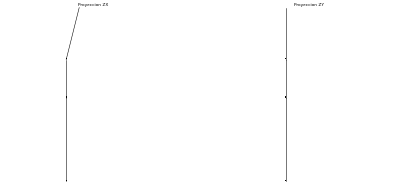


****** EVENTO 5082 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1072            5082         178        1.0        1.0     -220.0        0.0   
1073            5082         178        1.0        1.0     -220.0        0.0   
1074            5082         178        1.0        1.0     -220.0        0.0   
1075            5082         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1072        0.0               4        1      6.3     6.05   -187.3   
1073        0.0               4        2      6.3     6.05   -134.8   
1074        0.0               4        3      6.3     6.05    -96.9   
1075        0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1072       1.06101  
10

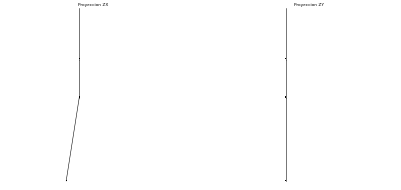


****** EVENTO 5083 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1076            5083         178        1.0        1.0     -220.0        0.0   
1077            5083         178        1.0        1.0     -220.0        0.0   
1078            5083         178        1.0        1.0     -220.0        0.0   
1079            5083         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1076        0.0               4        1      6.3     6.05   -187.3   
1077        0.0               4        2      6.3    -6.05   -134.8   
1078        0.0               4        3      6.3    -6.05    -96.9   
1079        0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1076       1.12769  
10

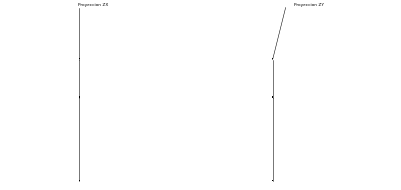


****** EVENTO 5084 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1080            5084         178        1.0        1.0     -220.0        0.0   
1081            5084         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1080        0.0               2        1      6.3     6.05   -187.3   
1081        0.0               2        4     -6.3    30.25    -13.2   

        Time_h[ns]  
Hit_Id              
1080       1.15704  
1081       8.76963  


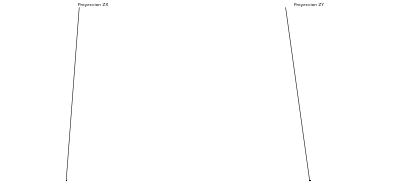


****** EVENTO 5085 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1082            5085         178        1.0        1.0     -220.0        0.0   
1083            5085         178        1.0        1.0     -220.0        0.0   
1084            5085         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1082        0.0               3        1      6.3     6.05   -187.3   
1083        0.0               3        2      6.3     6.05   -134.8   
1084        0.0               3        4     18.9    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1082       1.17853  
1083       2.85289  
1084       7.58655  


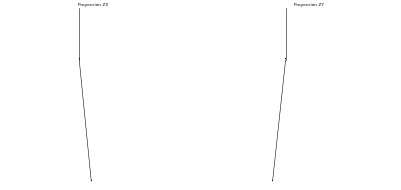


****** EVENTO 5086 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1085            5086         178        1.0        1.0     -220.0        0.0   
1086            5086         178        1.0        1.0     -220.0        0.0   
1087            5086         178        1.0        1.0     -220.0        0.0   
1088            5086         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1085        0.0               4        1      6.3     6.05   -187.3   
1086        0.0               4        2      6.3     6.05   -134.8   
1087        0.0               4        3      6.3     6.05    -96.9   
1088        0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1085       1.12730  
10

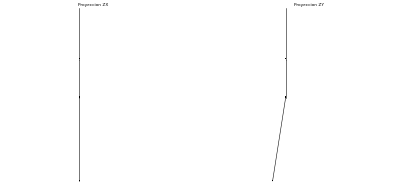


****** EVENTO 5087 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1089            5087         178        1.0        1.0     -220.0        0.0   
1090            5087         178        1.0        1.0     -220.0        0.0   
1091            5087         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1089        0.0               3        1      6.3     6.05   -187.3   
1090        0.0               3        2      6.3    -6.05   -134.8   
1091        0.0               3        3     -6.3    -6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1089       1.09607  
1090       2.82601  
1091       4.21794  


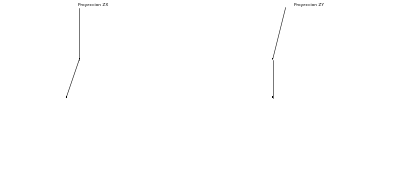


****** EVENTO 5088 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1092            5088         178        1.0        1.0     -220.0        0.0   
1093            5088         178        1.0        1.0     -220.0        0.0   
1094            5088         178        1.0        1.0     -220.0        0.0   
1095            5088         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1092        0.0               4        1      6.3     6.05   -187.3   
1093        0.0               4        2      6.3     6.05   -134.8   
1094        0.0               4        3      6.3    -6.05    -96.9   
1095        0.0               4        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1092       1.08056  
10

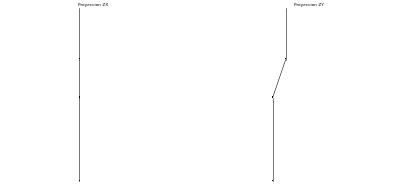


****** EVENTO 5089 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1096            5089         178        1.0        1.0     -220.0        0.0   
1097            5089         178        1.0        1.0     -220.0        0.0   
1098            5089         178        1.0        1.0     -220.0        0.0   
1099            5089         178        1.0        1.0     -220.0        0.0   
1100            5089         178        1.0        1.0     -220.0        0.0   
1101            5089         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1096        0.0               6        1      6.3     6.05   -187.3   
1097        0.0               6        2      6.3    -6.05   -134.8   
1098        0.0               6        3      6.

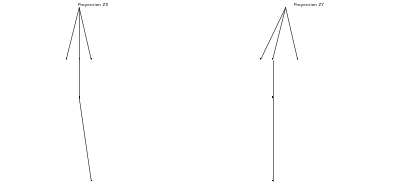


****** EVENTO 5090 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1102            5090         178        1.0        1.0     -220.0        0.0   
1103            5090         178        1.0        1.0     -220.0        0.0   
1104            5090         178        1.0        1.0     -220.0        0.0   
1105            5090         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1102        0.0               4        1      6.3     6.05   -187.3   
1103        0.0               4        2      6.3     6.05   -134.8   
1104        0.0               4        3      6.3     6.05    -96.9   
1105        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1102       1.13682  
11

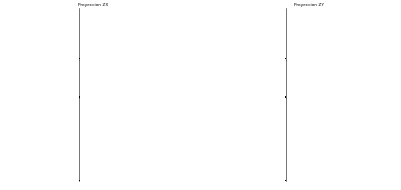


****** EVENTO 5091 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1106            5091         178        1.0        1.0     -220.0        0.0   
1107            5091         178        1.0        1.0     -220.0        0.0   
1108            5091         178        1.0        1.0     -220.0        0.0   
1109            5091         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1106        0.0               4        1      6.3     6.05   -187.3   
1107        0.0               4        2      6.3     6.05   -134.8   
1108        0.0               4        3     -6.3     6.05    -96.9   
1109        0.0               4        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1106       1.13657  
11

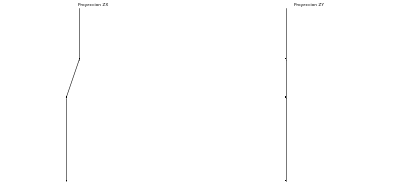


****** EVENTO 5092 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1110            5092         178        1.0        1.0     -220.0        0.0   
1111            5092         178        1.0        1.0     -220.0        0.0   
1112            5092         178        1.0        1.0     -220.0        0.0   
1113            5092         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1110        0.0               4        1      6.3     6.05   -187.3   
1111        0.0               4        2      6.3     6.05   -134.8   
1112        0.0               4        3     -6.3     6.05    -96.9   
1113        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1110       1.11013  
11

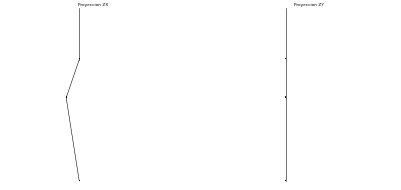


****** EVENTO 5093 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1114            5093         178        1.0        1.0     -220.0        0.0   
1115            5093         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1114        0.0               2        1      6.3     6.05   -187.3   
1115        0.0               2        4      6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1114       1.12996  
1115       7.39164  


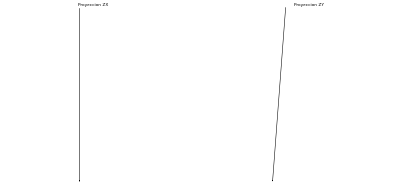


****** EVENTO 5094 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1116            5094         178        1.0        1.0     -220.0        0.0   
1117            5094         178        1.0        1.0     -220.0        0.0   
1118            5094         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1116        0.0               3        1      6.3     6.05   -187.3   
1117        0.0               3        2     -6.3     6.05   -134.8   
1118        0.0               3        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1116       1.10578  
1117       2.91872  
1118       4.25596  


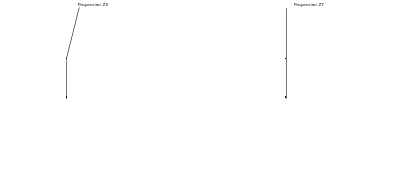


****** EVENTO 5095 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1119            5095         178        1.0        1.0     -220.0        0.0   
1120            5095         178        1.0        1.0     -220.0        0.0   
1121            5095         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1119        0.0               3        1      6.3     6.05   -187.3   
1120        0.0               3        2      6.3     6.05   -134.8   
1121        0.0               3        3      6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1119       1.07872  
1120       2.83260  
1121       4.19564  


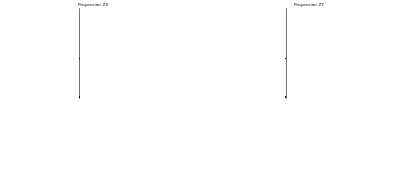


****** EVENTO 5096 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1122            5096         178        1.0        1.0     -220.0        0.0   
1123            5096         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1122        0.0               2        1      6.3     6.05   -187.3   
1123        0.0               2        4     -6.3    -6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1122       1.13289  
1123       7.29527  


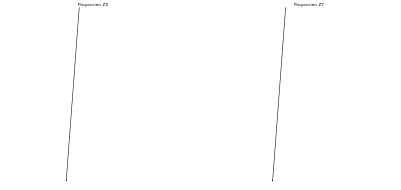


****** EVENTO 5097 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1124            5097         178        1.0        1.0     -220.0        0.0   
1125            5097         178        1.0        1.0     -220.0        0.0   
1126            5097         178        1.0        1.0     -220.0        0.0   
1127            5097         178        1.0        1.0     -220.0        0.0   
1128            5097         178        1.0        1.0     -220.0        0.0   
1129            5097         178        1.0        1.0     -220.0        0.0   
1130            5097         178        1.0        1.0     -220.0        0.0   
1131            5097         178        1.0        1.0     -220.0        0.0   
1132            5097         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id               

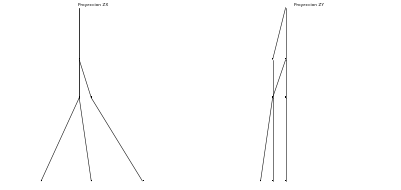


****** EVENTO 5098 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1133            5098         178        1.0        1.0     -220.0        0.0   
1134            5098         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1133        0.0               2        1      6.3     6.05   -187.3   
1134        0.0               2        3     -6.3     6.05    -96.9   

        Time_h[ns]  
Hit_Id              
1133       1.13107  
1134       4.26919  


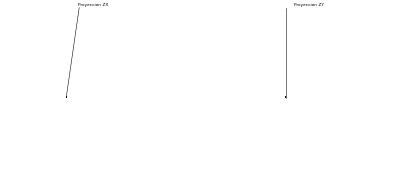


****** EVENTO 5099 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1135            5099         178        1.0        1.0     -220.0        0.0   
1136            5099         178        1.0        1.0     -220.0        0.0   
1137            5099         178        1.0        1.0     -220.0        0.0   
1138            5099         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1135        0.0               4        1      6.3     6.05   -187.3   
1136        0.0               4        2      6.3     6.05   -134.8   
1137        0.0               4        3      6.3     6.05    -96.9   
1138        0.0               4        4      6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1135       1.10650  
11

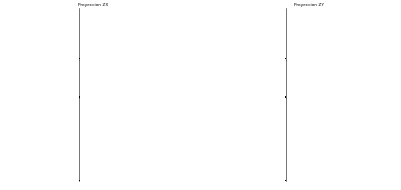


****** EVENTO 5100 ******
        Event_Number  Ini_E[MeV]  Ini_X[cm]  Ini_Y[cm]  Ini_Z[cm]  Ini_Theta  \
Hit_Id                                                                         
1139            5100         178        1.0        1.0     -220.0        0.0   
1140            5100         178        1.0        1.0     -220.0        0.0   
1141            5100         178        1.0        1.0     -220.0        0.0   

        Ini_Phi  Number_of_hits  Plane_h  X_h[cm]  Y_h[cm]  Z_h[cm]  \
Hit_Id                                                                
1139        0.0               3        1      6.3     6.05   -187.3   
1140        0.0               3        3     -6.3     6.05    -96.9   
1141        0.0               3        4     -6.3     6.05    -13.2   

        Time_h[ns]  
Hit_Id              
1139       1.13386  
1140       4.30671  
1141       7.13181  


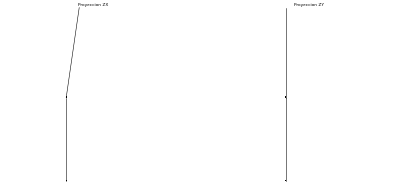

In [9]:
for i in range(len(idDfEventos)): 
    print("\n****** EVENTO "+str(idDfEventos[i])+ " ******")
    evento = dfEventosHits[dfEventosHits.Event_Number == idDfEventos[i]]
    print(evento)
#     fig = mpl.pyplot.figure(figsize=(20, 10), dpi=180)
#     fig = mpl.pyplot.figure(figsize=(20, 10), dpi=60)
    fig = mpl.pyplot.figure(figsize=(20, 10), dpi=25.60)
    grafica_ZX = fig.add_subplot(121)
    grafica_ZY = fig.add_subplot(122)

    # Quitamos los bordes de las gráficas
    grafica_ZX.spines['right'].set_visible(False)
    grafica_ZX.spines['top'].set_visible(False)
    grafica_ZX.spines['left'].set_visible(False)
    grafica_ZX.spines['bottom'].set_visible(False)
    grafica_ZY.spines['right'].set_visible(False)
    grafica_ZY.spines['top'].set_visible(False)
    grafica_ZY.spines['left'].set_visible(False)
    grafica_ZY.spines['bottom'].set_visible(False)

    # Quitamos los ejes de las gráficas
    grafica_ZX.xaxis.set_visible(False)
    grafica_ZX.yaxis.set_visible(False)
    grafica_ZY.xaxis.set_visible(False)
    grafica_ZY.yaxis.set_visible(False)

    # Definimos los tamaños de imagen en pixeles. Cada px es un cm en el trasgos
#     matriz_ZX = np.ones((180, 140))
#     matriz_ZY = np.ones((180, 150))
    matriz_ZX = np.ones((180, 180))
    matriz_ZY = np.ones((180, 180))

    #Definimos offsets de los 3 ejes para recolocar el 0,0,0 en el vértice inferior izquierdo
    offsetX = 70
    offsetY = 60
    offsetZ = 187
    
    if(len(evento)>1):#El evento tiene mas de un hit
        #Recorremos todos los hits del evento. Se recogen de 2 en 2 para trazar el arco entre ellos.
        for j in range(len(evento)-1):
#             print("contador j="+str(j))
            k = 0
            hit1 = evento.iloc[j,:]
            hit2 = evento.iloc[j+1,:]  

            #Calculamos la distancia entre planos. El resultado es un entero que nos sirve para detectar si los planos de los hits son contiguos.
            while (hit2['Plane_h'] <= hit1['Plane_h']):
                nuevoIndice = j-1-k
                if (nuevoIndice<=0):
                    nuevoIndice=0
                hit1 = evento.iloc[int(nuevoIndice),:] #buscamos el hit1 de origen del edge que le corresponde a hit2. Retrocedemos en el array
                k += 1

            #Movemos los puntos según el offset
            hit1_xNew = int(hit1['X_h[cm]'] + offsetX)
            hit1_yNew = int(hit1['Y_h[cm]'] + offsetY)
            hit1_zNew = int(hit1['Z_h[cm]'] + offsetZ)
            hit2_xNew = int(hit2['X_h[cm]'] + offsetX)
            hit2_yNew = int(hit2['Y_h[cm]'] + offsetY)
            hit2_zNew = int(hit2['Z_h[cm]'] + offsetZ)

            #print("\n* * * * \nj="+str(j)+" \nHit1 Pos="+str(hit1_xNew) + " "+str(hit1_yNew)+" "+str(hit1_zNew))
            #print("\nHit2 Pos="+str(hit2_xNew) + " "+str(hit2_yNew)+" "+str(hit2_zNew))

            #pintamos de negro el pixel de hit1 y hit2 en cada una de las dos matrices
            matriz_ZX[hit1_zNew,hit1_xNew]=0.0
            matriz_ZX[hit2_zNew,hit2_xNew]=0.0
            matriz_ZY[hit1_zNew,hit1_yNew]=0.0
            matriz_ZY[hit2_zNew,hit2_yNew]=0.0

            #Se pinta la linea de hit2 a hit1 en los dos gráficos (ax y grafica_ZY)
            grafica_ZX.plot([hit2_xNew,hit1_xNew],[hit2_zNew,hit1_zNew],color = 'black')
            grafica_ZY.plot([hit2_yNew,hit1_yNew],[hit2_zNew,hit1_zNew],color = 'black')
            
    else:#El evento solo tiene un hit
        hit1 = evento.iloc[0,:] #Cogemos el unico hit del evento
        
        #Movemos el puntos según el offset
        hit1_xNew = int(hit1['X_h[cm]'] + offsetX)
        hit1_yNew = int(hit1['Y_h[cm]'] + offsetY)
        hit1_zNew = int(hit1['Z_h[cm]'] + offsetZ)
        
        #pintamos de negro el pixel de hit1 en cada una de las dos matrices
        matriz_ZX[hit1_zNew,hit1_xNew]=0.0
        matriz_ZY[hit1_zNew,hit1_yNew]=0.0

    grafica_ZX.imshow(matriz_ZX, cmap=plt.cm.gray, interpolation='nearest')
    grafica_ZX.set_title('Proyeccion ZX')
    grafica_ZY.imshow(matriz_ZY, cmap=plt.cm.gray, interpolation='nearest')
    grafica_ZY.set_title('Proyeccion ZY')

    plt.show()
    
    # Save just the portion _inside_ the second axis's boundaries
    extent = grafica_ZX.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('output/test1/images/'+str(evento.iloc[0,0])+'_'+str(evento.iloc[0,1])+'mEv_'+str(int(evento.iloc[0,5]))+'Theta_'+str(int(evento.iloc[0,5]))+'Phi_planoZX.png', bbox_inches=extent)
#     fig.savefig('imagenesRayos/test2/'+str(evento.iloc[0,0])+'_'+str(evento.iloc[0,1])+'mEv_'+str(int(evento.iloc[0,5]))+'Theta_'+str(int(evento.iloc[0,5]))+'Phi_planoZX.png', bbox_inches=extent)
    extent = grafica_ZY.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('output/test1/images/'+str(evento.iloc[0,0])+'_'+str(evento.iloc[0,1])+'mEv_'+str(int(evento.iloc[0,5]))+'Theta_'+str(int(evento.iloc[0,5]))+'Phi_planoZY.png', bbox_inches=extent)
#     fig.savefig('imagenesRayos/test2/'+str(evento.iloc[0,0])+'_'+str(evento.iloc[0,1])+'mEv_'+str(int(evento.iloc[0,5]))+'Theta_'+str(int(evento.iloc[0,5]))+'Phi_planoZY.png', bbox_inches=extent)

In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 200  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)
winsound.Beep(frequency, duration)
winsound.Beep(frequency, duration)